In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import solve_ivp
import matplotlib.animation as animation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.animation as animation
from matplotlib import ticker
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from matplotlib.animation import FuncAnimation,PillowWriter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import f_oneway
# from scipy.stats import friedman, kruskalwallis
from scipy.stats import friedmanchisquare
from scipy.stats.mstats import kruskal
# from lmfit import Model
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [2]:
columns = [str(year) for year in range(2011, 2023)]
rows = ['Population (Million)','Population Change(%)','Divorce (Couples)', 'Married (Couples)', 'Divorce (%)','Married (%)','Birth (population)','Birth Rate (%)','Death (population)', 'Death Rate (%)', 'GDP (Billion Dollars)','GDP Change (%)','GDP Per Capita (Dollars)', 'GDP Per Capita Rate (%)', 'GDP Per Capita Change (%)' ,'Migration Rate']
df = pd.DataFrame(index=rows, columns=columns)

# pop_data = [68.712,69.157,69.579,69.961,70.294,70.607,70.898,71.128,71.308,71.476,71.601,71.697]
pop_data = [68.712846,69.157023,69.578602,69.960943,70.294397,70.607037,70.898202,71.127802,71.307763,71.475664,71.601103,71.697030]
pop_change_rate = [0.65,0.65, 0.61,0.55,0.48,0.44,0.41,0.32,0.25,0.24,0.18,0.13]
div_data = [109312, 111377,107031, 111810, 117880, 118539, 121617, 127265, 128514, 121011, 110942, 146159]
marriage_data = [308048, 314338,295519,296258,304392, 307746,297501,307936,328875,271344,240979,305487]
birth_data = [828827,818901,782129,776370,736352,704058,702755,666109,618193,587368,544570,502107]
birth_rate = [11.682,11.461,11.240,11.084,10.929,10.773,10.618,10.462,10.276,10.090,9.904,9.718]
death_data = [415685,423213,438648,448601,456391,480434,468911,473541,506211,501438,563650,595965]
death_rate = [6.39,6.46,6.55,6.63,6.72,6.81,6.9,7.03,7.14,7.26,7.92,8.31]
GDP_data = [370.82,397.56,420.33,407.34,401.30,413.37,456.3,506.75,543.98,500.46,505.57,495.34]
# GDP_rate = [0.8,7.2,2.7,1,3.1,3.4,4.2,4.2,2.1,-6.1,1.5,2.6]
GDP_change =[0.08712,0.07211,0.05727,-0.03090,-0.01482,0.03007,0.10399,0.11041,0.07346,-0.08000,0.01021,-0.02023]
GDP_per_capita = [5396.6,5748.6,6041.1,5822.4,5708.8,5854.5,6436.8,7124.6,7628.6,7001.8,7060.9,6908.8]
GDP_per_capita_rate = [8.01,6.52,5.09,-3.62,-1.95,2.55,9.95,10.68,7.07,-8.22,0.84,-2.15]
GDP_per_capita_change = [0.08009,0.06521,0.05088,-0.03620,-0.01951,0.02552,0.09946,0.10685,0.07074,-0.08216,0.008844,-0.02153]
migration_rate = [0.366,0.429,0.492,0.450,0.408,0.365,0.323,0.281,0.280,0.279,0.277,0.276]
div_rate = []
mar_rate = []

for i in range(len(df.iloc[0])):
    df.iloc[0,i] = pop_data[i]
    df.iloc[1,i] = pop_change_rate[i]
    df.iloc[2,i] = div_data[i]
    df.iloc[3,i] = marriage_data[i]
    div_rate.append((div_data[i] / marriage_data[i]) * 100)
    df.iloc[4,i] = div_rate[i]
    mar_rate.append((marriage_data[i] / (pop_data[i]*100000)) * 100)
    df.iloc[5,i] = mar_rate[i]
    df.iloc[6,i] = birth_data[i]
    df.iloc[7,i] = birth_rate[i]
    df.iloc[8,i] = death_data[i]
    df.iloc[9,i] = death_rate[i]
    df.iloc[10,i] = GDP_data[i]
    # df.iloc[10,i] = GDP_rate[i]
    df.iloc[11,i] = GDP_change[i]
    df.iloc[12,i] = GDP_per_capita[i]
    df.iloc[13,i] = GDP_per_capita_rate[i] 
    df.iloc[14,i] = GDP_per_capita_change[i]
    df.iloc[15,i] = migration_rate[i]

years = df.columns
df

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Population (Million),68.712846,69.157023,69.578602,69.960943,70.294397,70.607037,70.898202,71.127802,71.307763,71.475664,71.601103,71.69703
Population Change(%),0.65,0.65,0.61,0.55,0.48,0.44,0.41,0.32,0.25,0.24,0.18,0.13
Divorce (Couples),109312,111377,107031,111810,117880,118539,121617,127265,128514,121011,110942,146159
Married (Couples),308048,314338,295519,296258,304392,307746,297501,307936,328875,271344,240979,305487
Divorce (%),35.485379,35.432242,36.217976,37.740753,38.726379,38.518454,40.879526,41.328393,39.076853,44.596895,46.038037,47.844589
Married (%),4.483121,4.54528,4.247268,4.23462,4.330246,4.358574,4.196171,4.329334,4.61205,3.796313,3.365577,4.260804
Birth (population),828827,818901,782129,776370,736352,704058,702755,666109,618193,587368,544570,502107
Birth Rate (%),11.682,11.461,11.24,11.084,10.929,10.773,10.618,10.462,10.276,10.09,9.904,9.718
Death (population),415685,423213,438648,448601,456391,480434,468911,473541,506211,501438,563650,595965
Death Rate (%),6.39,6.46,6.55,6.63,6.72,6.81,6.9,7.03,7.14,7.26,7.92,8.31


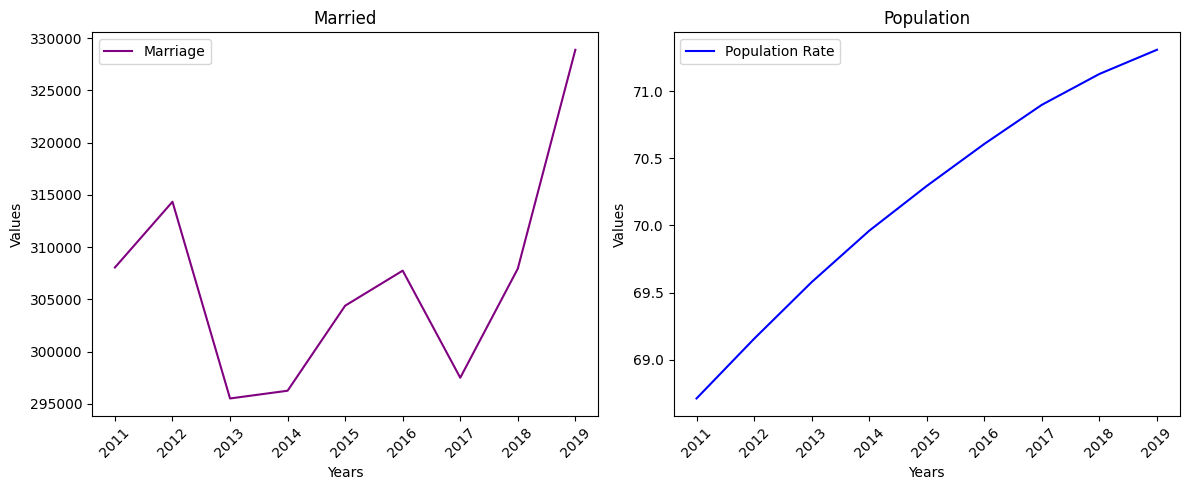

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Plot 1 on the first subplot (ax1)
ax1.set_title('Married')
ax1.plot(years[:-3], marriage_data[:-3], color='purple', label='Marriage')
ax1.set_xlabel('Years')
ax1.set_ylabel('Values')
ax1.set_xticks(years[:-3])
ax1.set_xticklabels(years[:-3], rotation=45)
ax1.legend()

# Plot 2 on the second subplot (ax2)
ax2.set_title('Population')
ax2.plot(years[:-3], pop_data[:-3], color='blue', label='Population Rate')
ax2.set_xlabel('Years')
ax2.set_ylabel('Values')
ax2.set_xticks(years[:-3])
ax2.set_xticklabels(years[:-3], rotation=45)
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined figure with subplots
plt.show()

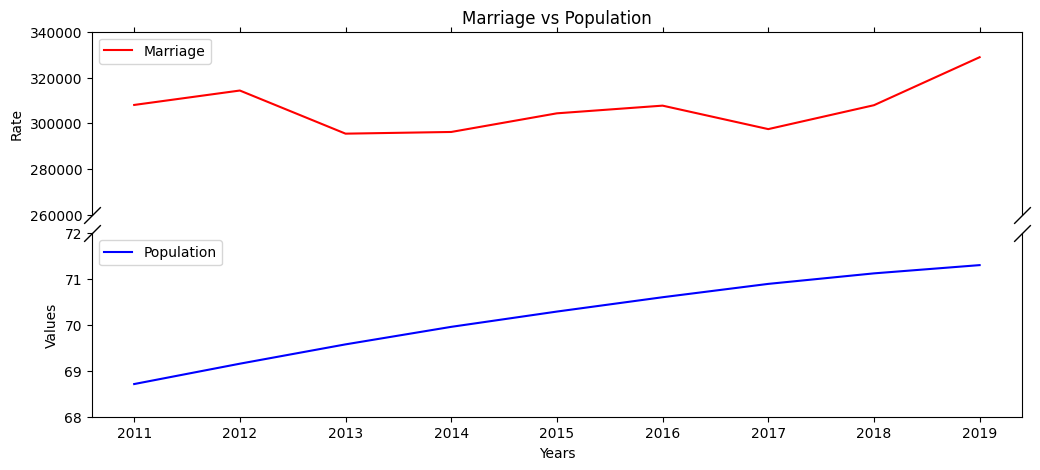

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,5))
fig.subplots_adjust(hspace=0.1) 

plt.xlabel('Years')
plt.ylabel('Values')

ax1.plot(years[:-3],marriage_data[:-3], color='red', label='Marriage')
ax2.plot(years[:-3],pop_data[:-3], color='blue',label='Population')

ax1.set_ylim(260000, 340000)
ax2.set_ylim(68, 72)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
# ax1.tick_params(labeltop=True)
ax2.xaxis.tick_bottom()
ax1.set_ylabel('Rate')
ax1.set_title('Marriage vs Population')

d = 1
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.legend()
ax2.legend()

plt.show()

Null Hypothesis ($H_0$): Marriage rate are not affected by population change.


Alternative Hypothesis ($H_1$ or $H_a$ ): Marriage rates are affected by population change.

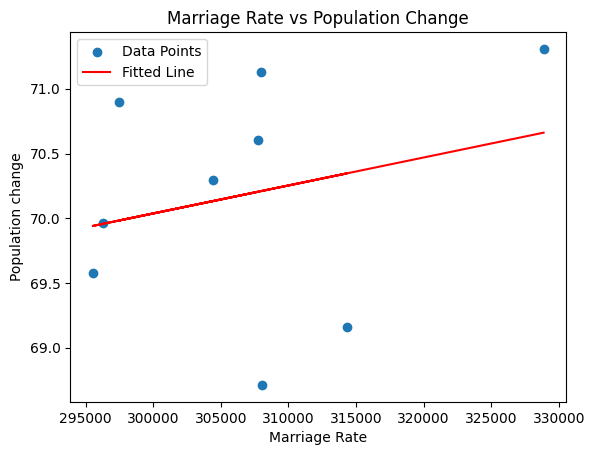

Intercept: 63.55741518495396
Coefficient for Marriage: 2.1599506463026263e-05
R-squared: 0.06315079879845287 this suggests that the divorce rate alone can account for about 6.32% of the differences we observe in the Population change.
correlation = 0.2512982268112009 as they are postively correlated it implies that as marriage rate increases, population change would be increasing.
Mean Absolute Error: 0.6777932299568934 this indicates that, on average, the model's predictions deviate by approximately 67.78% points from the actual values which is relatively small.
Mean Squared Error: 0.6755786562444748 this suggests that, on average, the model's predictions are relatively close to the actual values.
Root Mean Squared Error: 0.8219359197920935 this suggests that, on average, the model's predictions deviate by approximately 82.19% percentage points from the actual values which is generally considered low and indicates that the model's predictions are relatively accurate


In [5]:
# X = df.loc['Married (%)'][:-3].values.reshape(-1, 1)  # Independent variable
# y = df.loc['Population Change(%)'][:-3].values  # Dependent variable

X = df.loc['Married (Couples)'][:-3].values.reshape(-1, 1)  # Independent variable
y = df.loc['Population (Million)'][:-3].values  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X, y)
# model.fit(X_train, y_train) # or can use this as well the value will drift off a bit but is still similar, so they make no much different

# Extract the coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Scatter plot
plt.scatter(X, y, label='Data Points')

# Fitted line
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red', label='Fitted Line')

plt.xlabel('Marriage Rate')
plt.ylabel('Population change')
plt.title('Marriage Rate vs Population Change')

plt.legend()
plt.show()

# Make predictions on the data
y_pred = model.predict(X)

# Evaluate the model
print(f"Intercept: {intercept}")
print(f"Coefficient for Marriage: {slope}")
print(f"R-squared: {r2_score(y, y_pred)} this suggests that the divorce rate alone can account for about {round(r2_score(y, y_pred)*100,2)}% of the differences we observe in the Population change.")
correlation = (pd.to_numeric(df.loc['Married (Couples)'][:-3], errors='coerce')).corr(pd.to_numeric(df.loc['Population (Million)'][:-3], errors='coerce'))
print(f"correlation = {correlation} as they are postively correlated it implies that as marriage rate increases, population change would be increasing.")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y, y_pred)} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(y, y_pred)*100,2)}% points from the actual values which is relatively small.")
print(f"Mean Squared Error: {metrics.mean_squared_error(y, y_pred)} this suggests that, on average, the model\'s predictions are relatively close to the actual values.")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y, y_pred))} this suggests that, on average, the model\'s predictions deviate by approximately {round(np.sqrt(metrics.mean_squared_error(y, y_pred))*100,2)}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate")

In [6]:
# X = df.loc['Married (%)'].values  # Independent variable
# y = df.loc['Population Change(%)'].values  # Dependent variable

X = df.loc['Married (Couples)'][:-3].values  # Independent variable
y = df.loc['Population (Million)'][:-3].values  # Dependent variable

# Convert to numeric type
X_numeric = pd.to_numeric(X, errors='coerce').reshape(-1, 1)

# Add a constant term to the independent variable matrix for the intercept
X_with_intercept = sm.add_constant(X_numeric)

# Create a linear regression model using statsmodels
model_stats = sm.OLS(y, X_with_intercept, missing='drop').fit()

print(f"T-values: {model_stats.tvalues}")

T-values: [6.586243960188836 0.6869159469527356]


In [7]:
# Calculate standard error of the coefficient for divorce
var_married = np.var(X_train)  # Variance of the independent variable
standard_error_married = np.sqrt(metrics.mean_squared_error(y, y_pred) / len(X_test) / var_married)

# Assuming you have a linear regression model named 'model'
t_value_married = model.coef_[0] / standard_error_married  # Compute the T-value (standardized coefficient)
p_value_married = 2 * (1 - stats.t.cdf(np.abs(t_value_married), df=len(df)-2))  # Two-tailed test

print(f"Standard Error of Coefficient for Divorce: {standard_error_married}")
print("T-value for Divorce:", t_value_married,'A t-value close to zero suggests that the coefficient for divorce is not significantly different from zero.')
print("P-value for Divorce:", p_value_married)

Standard Error of Coefficient for Divorce: 5.409044204188613e-05
T-value for Divorce: 0.3993220548336471 A t-value close to zero suggests that the coefficient for divorce is not significantly different from zero.
P-value for Divorce: 0.6956810279501169


Null Hypothesis ($H_0$): Marriage rate are not affected by population change.


Alternative Hypothesis ($H_1$ or $H_a$ ): Marriage rates are affected by population change.


**Since the p-value (0.6961) is greater than 0.05, we fail to reject the null hypothesis.**

Null Hypothesis ($H_0$): Divorce rate are not affected by marriage rate.


Alternative Hypothesis ($H_1$ or $H_a$ ): Divorce rates are affected by marriage rate.

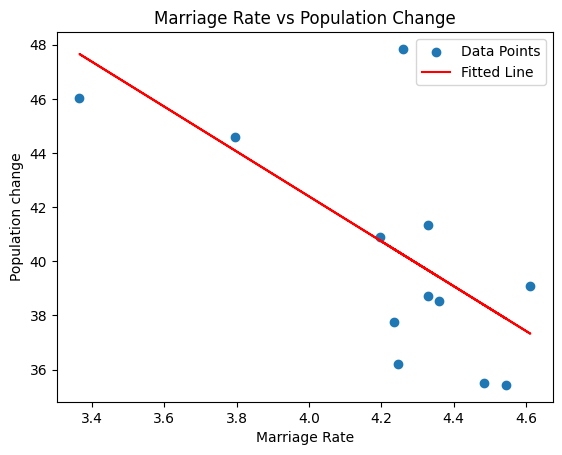

Intercept: 75.55465839734856
Coefficient for Marriage: -8.289202933375877
R-squared: 0.42601700406126086 this suggests that the divorce rate alone can account for about 42.6% of the differences we observe in the Population change.
correlation = -0.6588087178104592 as they are negatively correlated it implies that as marriage rate increases, divorce rate would be decreasing.
Mean Absolute Error: 2.27463540582634 this indicates that, on average, the model's predictions deviate by approximately 227.46% points from the actual values which is relatively small.
Mean Squared Error: 8.92984894700588 this suggests that, on average, the model's predictions are relatively close to the actual values.
Root Mean Squared Error: 2.988285285411331 this suggests that, on average, the model's predictions deviate by approximately 298.83% percentage points from the actual values which is generally considered low and indicates that the model's predictions are relatively accurate


In [8]:
X1 = df.loc['Married (%)'].values.reshape(-1, 1)  # Independent variable
y1 = df.loc['Divorce (%)'].values  # Dependent variable

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

model1 = LinearRegression()
# model1.fit(X1, y1)
model1.fit(X_train1, y_train1) # or can use this as well the value will drift off a bit but is still similar, so they make no much different

# Extract the coefficients
slope1 = model1.coef_[0]
intercept1 = model1.intercept_

# Scatter plot
plt.scatter(X1, y1, label='Data Points')

# Fitted line
y_pred1 = model1.predict(X1)
plt.plot(X1, y_pred1, color='red', label='Fitted Line')

plt.xlabel('Marriage Rate')
plt.ylabel('Population change')
plt.title('Marriage Rate vs Population Change')

plt.legend()
plt.show()

# Make predictions on the data
y_pred1 = model1.predict(X1)

# Evaluate the model
print(f"Intercept: {intercept1}")
print(f"Coefficient for Marriage: {slope1}")
print(f"R-squared: {r2_score(y1, y_pred1)} this suggests that the divorce rate alone can account for about {round(r2_score(y1, y_pred1)*100,2)}% of the differences we observe in the Population change.")
correlation1 = (pd.to_numeric(df.loc['Married (%)'], errors='coerce')).corr(pd.to_numeric(df.loc['Divorce (%)'], errors='coerce'))
print(f"correlation = {correlation1} as they are negatively correlated it implies that as marriage rate increases, divorce rate would be decreasing.")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y1, y_pred1)} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(y1, y_pred1)*100,2)}% points from the actual values which is relatively small.")
print(f"Mean Squared Error: {metrics.mean_squared_error(y1, y_pred1)} this suggests that, on average, the model\'s predictions are relatively close to the actual values.")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y1, y_pred1))} this suggests that, on average, the model\'s predictions deviate by approximately {round(np.sqrt(metrics.mean_squared_error(y1, y_pred1))*100,2)}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate")

In [9]:
X1 = df.loc['Married (%)'].values  # Independent variable
y1 = df.loc['Divorce (%)'].values  # Dependent variable

# Convert to numeric type
X_numeric1 = pd.to_numeric(X1, errors='coerce').reshape(-1, 1)

# Add a constant term to the independent variable matrix for the intercept
X_with_intercept1 = sm.add_constant(X_numeric1)

# Create a linear regression model using statsmodels
model_stats1 = sm.OLS(y1, X_with_intercept1, missing='drop').fit()

print(f"T-values: {model_stats1.tvalues}")

T-values: [6.060060774152083 -2.769250353941053]


In [10]:
# Calculate standard error of the coefficient for divorce
var_married1 = np.var(X_train1)  # Variance of the independent variable
standard_error_married1 = np.sqrt(metrics.mean_squared_error(y1, y_pred1) / len(X_test1) / var_married1)

# Assuming you have a linear regression model named 'model'
t_value_married1 = model1.coef_[0] / standard_error_married1  # Compute the T-value (standardized coefficient)
p_value_married1 = 2 * (1 - stats.t.cdf(np.abs(t_value_married1), df=len(df)-2))  # Two-tailed test

print(f"Standard Error of Coefficient for Divorce: {standard_error_married}")
print("T-value for Divorce:", t_value_married1,'A t-value close to zero suggests that the coefficient for divorce is not significantly different from zero.')
print("P-value for Divorce:", p_value_married1)

Standard Error of Coefficient for Divorce: 5.409044204188613e-05
T-value for Divorce: -0.6466610649060853 A t-value close to zero suggests that the coefficient for divorce is not significantly different from zero.
P-value for Divorce: 0.5283112754800352


Null Hypothesis ($H_0$): Divorce rate are not affected by marriage rate.


Alternative Hypothesis ($H_1$ or $H_a$ ): Divorce rates are affected by marriage rate.


**Since the p-value (0.5291) is greater than 0.05, we fail to reject the null hypothesis.**

In [11]:
# #parameters estimation
# Divorce_data = df.loc["Divorce (%)"][:-3].to_numpy()
# time_data = years[:-3].to_numpy()

# model = LinearRegression()
# model.fit(time_data.reshape(-1, 1), Divorce_data)
# estimated_mu = model.coef_[0]
# print(f"Estimated mu using least squares: {estimated_mu}")

# Birth_data = df.loc["Birth Rate (%)"][:-3].to_numpy()

# model1 = LinearRegression()
# model1.fit(Birth_data.reshape(-1, 1), Divorce_data)
# estimated_alpha = model1.coef_[0]
# print(f"Estimated alpha using least squares: {estimated_alpha}")

# Death_data = df.loc["Death Rate (%)"][:-3].to_numpy()

# model2 = LinearRegression()
# model2.fit(Death_data.reshape(-1, 1), Divorce_data)
# estimated_beta = model2.coef_[0]
# print(f"Estimated beta using least squares: {estimated_beta}")

# # gdp_data = df.loc["Death Rate (%)"][:-3].to_numpy()
# # Pop_data = df.loc["Death Rate (%)"][:-3].to_numpy()

# # model3 = LinearRegression()
# # model3.fit(death_data.reshape(-1, 1), divorce_data)
# # estimated_delta = model3.coef_[0]
# # print(f"Estimated delta using least squares: {estimated_delta}")

In [12]:
# import numpy as np
# from scipy.integrate import odeint
# def system_of_equations(y, t, alpha, beta, mu):
#     Di, B, D ,P = y
#     dDi_dt = mu * t
#     dB_dt = alpha * Di
#     dD_dt = beta * Di
#     dP_dt = np.exp((B - D)*t)*P_0
#     return [dDi_dt, dB_dt, dD_dt, dP_dt]

# # Estimated parameters (replace with your actual values)
# alpha = estimated_alpha  # Estimated value
# beta = estimated_beta  # Estimated value
# mu = estimated_mu  # Estimated value

# # alpha = -0.51332231  # Estimated value
# # beta = 0.0325031  # Estimated value
# # mu = 0.70224455  # Estimated value

# # Initial conditions (replace with your actual values)
# Di_0 = div_data[0]  # Initial Di value
# B_0 = birth_data[0]  # Initial B value
# D_0 = death_data[0]  # Initial D value
# P_0 = pop_data[0]  # Initial P value

# # div_data[0],birth_data[0],death_data[0],pop_data[0]
# # Time points for simulation
# t_start = 0
# t_end = 20
# t = np.linspace(t_start, t_end, 20)  # 20 points for simulation
# y0 = [Di_0, B_0, D_0, P_0]  # Initial conditions vector
# print(y0)
# solution = odeint(system_of_equations, y0, t, args=(alpha, beta, mu))
# # Extract individual variables from the solution
# Di, B, D, P = solution.T

# # Print or visualize the results as needed
# print("Divorce at 2030:", Di[-1])
# print("Birth at 2030:", B[-1])
# print("Death at 2030:", D[-1])
# print("Population at 2030:", P[-1])

# # Plot the results (optional)
# import matplotlib.pyplot as plt
# plt.plot(t, Di, label="Divorce")
# plt.plot(t, B, label="Birth")
# plt.plot(t, D, label="Death")
# plt.plot(t, P, label="Population")
# plt.xlabel("Time (years)")
# plt.ylabel("Value")
# plt.legend()
# plt.show()


In [13]:
# def population_dynamics(y, t, mu, alpha, beta):
#     Di, B, D, P = y
#     dDi_dt = mu * t
#     dB_dt = alpha * Di
#     dD_dt = beta * Di
#     dP_dt = (B-D)*t
#     return [dDi_dt, dB_dt, dD_dt, dP_dt]


# initial_conditions = y0  # Initial values for Di, B, D, P
# t_span = np.linspace(0, 30, 100)  # Time range for simulation
# solution = odeint(population_dynamics, initial_conditions, t_span, args=(mu, alpha, beta))
# Di, B, D, P = solution.T  # Separate variables from solution array

# # Plot results
# plt.plot(t_span, Di, label='Divorce Rate (Di)')
# plt.plot(t_span, B, label='Birth Rate (B)')
# plt.plot(t_span, D, label='Death Rate (D)')
# plt.plot(t_span, P, label='Population (P)')
# plt.xlabel("Time (t)")
# plt.ylabel("Rates/Population")
# plt.title("Population Dynamics Simulation")
# plt.legend()
# plt.show()


In [14]:
# def likelihood(mu, divorce_data, marriage_data):
#   # Calculate predicted divorce rates using the model and given mu
#   predicted_divorce = mu * marriage_data

#   # Calculate the log-likelihood for each data point
#   log_likelihood = -(divorce_data - predicted_divorce)**2

#   # Sum the log-likelihoods for all data points
#   return -log_likelihood.sum()

# # Replace these with the actual names of your dataframes
# divorce_data = pd.read_csv("divorce_data.csv")
# marriage_data = pd.read_csv("marriage_data.csv")


In [15]:
# print(type((years[:-3]).tolist()),type(birth_data[:-3]),type(death_data[:-3]),type(div_data[:-3]),type(pop_data[:-3]))
# independent_variable = (years[:-3]).tolist()
# # independent_variable = [0,1,2,3,4,5,6,7,8]
# # independent_variable=np.asarray(independent_variable, dtype=float)
# dependent_variable = np.vstack((div_data[:-3],birth_data[:-3],death_data[:-3],pop_data[:-3]))

# print(type(independent_variable[0]),type(birth_data[:-3][0]),type(death_data[:-3][0]),type(div_data[:-3][0]),type(pop_data[:-3][0]))

# # initial guesses for parameters
# alpha, beta, mu = estimated_alpha, estimated_beta, estimated_mu
# parameter_guesses = np.array([alpha, beta, mu])

In [16]:
# number_of_dependent_variables = 4

# def system_of_ODEs_model(v, t, parameters):
#     B = v[0]
#     D = v[1]
#     Di = v[2]
#     P = v[3]

#     alpha = parameters[0]
#     beta = parameters[1]
#     mu = parameters[2]

#     dDi_dt = mu*t
#     dB_dt = alpha*dDi_dt
#     dD_dt = beta*dDi_dt
#     dP_dt = B-D
#    # dGDP_dt = delta*dP_dt
#     return [dDi_dt,dB_dt, dD_dt,dP_dt]

# v_0 = np.array([div_data[0],birth_data[0],death_data[0],pop_data[0]])

In [17]:
# #syste of ODE solver

# def system_of_ODEs_model_from_parmeters(independent_variable, *params):
#     dependent_variable_calculated = np.zeros((len(independent_variable), number_of_dependent_variables))
#     """
#     [[0,0],
#     ...,
#     [0,0]]
#     """
#     #Solve the ODEs at independent variable points and return calculated dependent calculated using current values of the parameters.
#     for i in range(0, len(independent_variable)):
#         if independent_variable[i] == independent_variable[0]: # should include a decimal.      
#             dependent_variable_calculated[i,:] = v_0
#         else:
#             independent_variable_span = np.linspace(0.0,independent_variable[i], 101)
#             ySoln = scipy.integrate.odeint(system_of_ODEs_model, v_0,independent_variable_span, args = (params,)) # soln for entire independent_variable_span
#             # edit for > 1 dependent variables:            
#             dependent_variable_calculated[i,:] = ySoln[-1,:] # calculated y at the end of the independent_variable_span
#             # at this point dependent_variable_calculated is now 2D matrix with the number of columns set as : to include all yvariables
#             # curve_fit needs a 1D vector that has the rows in a certain order, which result from the next two commands
#     yaxisOutput = np.transpose(dependent_variable_calculated)
#     yaxisOutput = np.ravel(yaxisOutput)
#     return yaxisOutput


# # Estimate the parameters
# # np.ravel(yaxisData) transforms yaxisData from a 2D vector into the 1D vector that curve_fit expects.
# parameter_soln, pcov = scipy.optimize.curve_fit(system_of_ODEs_model_from_parmeters, independent_variable, np.ravel(dependent_variable), p0 = parameter_guesses)
# print(parameter_soln)
# print(pcov)

# #xaxisForPlotting = np.linspace(0, independent_variable[-1], 101)
# dependent_variable_from_guesses = scipy.integrate.odeint(system_of_ODEs_model, v_0, independent_variable, args = (parameter_soln,))
# dependent_variable_calculated = scipy.integrate.odeint(system_of_ODEs_model, v_0, independent_variable, args = (parameter_guesses,))

In [18]:
# fig, ax1 = plt.subplots()
# ax1.grid()
# ax1.axvline(x = 0, color = 'black')
# ax1.axhline(y = 0, color = 'black')

# #ax1.plot(independent_variable, dependent_variable[0,:], '.', label = 'Total Susceptable', color = "blue");
# ax1.plot(independent_variable, dependent_variable[1,:], '.', label = 'Divorce', color = "red")
# ax1.plot(independent_variable, dependent_variable[2,:], '.', label = 'Birth', color = "green")
# ax1.plot(independent_variable, dependent_variable[3,:], '.', label = 'Death', color = "purple")
# # ax1.plot(independent_variable, dependent_variable[4,:], '.', label = 'Population', color = "blue")

# # ax1.plot(independent_variable, dependent_variable_calculated[:,0], label = 'Suscep', color = "green") #before fitting
# # ax1.plot(independent_variable, dependent_variable_calculated[:,1], label = 'Infected', color = "blue") #before fitting
# # ax1.plot(independent_variable, dependent_variable_calculated[:,2],  label = 'Deaths', color = "red") #before fitting

# #ax1.plot(independent_variable, dependent_variable_from_guesses[:,0], label = 'Total Susceptable Fitted', color = "blue"); #after fitting
# ax1.plot(independent_variable, dependent_variable_from_guesses[:,1], label = 'Divorce Fitted', color = "red") #after fitting
# ax1.plot(independent_variable, dependent_variable_from_guesses[:,2],  label = 'Birth Fitted', color = "green") #after fitting
# ax1.plot(independent_variable, dependent_variable_from_guesses[:,3],  label = 'Death Fitted', color = "purple") #after fitting
# # ax1.plot(independent_variable, dependent_variable_from_guesses[:,4],  label = 'Population Fitted', color = "blue") #after fitting

# ax1.legend()
# ax1.set_xlabel("Time (Years)")
# ax1.set_ylabel("Numbers")

In [19]:
# # Define model parameters (Set 1)
# pi = 0.4  # recruitment rate of singles
# rho = 0.08  # marriage rate for singles
# beta = 0.2  # divorce rate for married
# mu = 0.015  # mortality rate for all states
# epsilon = 0.1  # remarriage rate for divorced
# alpha = 0.4  # separation rate for married
# delta = 0.05  # reconciliation rate for broken
# sigma = 0.3  # mortality rate for broken


# # # Define model parameters (Set 2) 
# # pi = 0.4  # recruitment rate of singles
# # rho = 0.0303  # marriage rate for singles
# # beta = 0.04  # divorce rate for married
# # mu = 0.015  # mortality rate for all states
# # epsilon = 0.09  # remarriage rate for divorced
# # alpha = 0.03  # separation rate for married
# # delta = 0.01  # reconciliation rate for broken
# # sigma = 0.04  # mortality rate for broken

# # Define initial conditions
# S_init = 10000  # initial number of singles
# M_init = 20  # initial number of married
# B_init = 100  # initial number of broken
# D_init = 0  # initial number of divorced

# # Time parameters
# t_max = 100  # simulation time
# dt = 1  # time step

# # Define functions for each state variable derivative
# def dS_dt(S, M, B, D):
#     return pi - rho * S * M + epsilon * D * M + delta * B - mu * S

# def dM_dt(S, M, B, D):
#     return rho * S * M - beta * M - alpha * M + delta * B - mu * M

# def dB_dt(S, M, B, D):
#     return alpha * M - delta * B - sigma * B

# def dD_dt(S, M, B, D):
#     return beta * M - epsilon * D * M + (1 - alpha) * B - mu * D

# # Initialize state variables
# S = np.zeros(int(t_max / dt) + 1)
# S[0] = S_init
# M = np.zeros(int(t_max / dt) + 1)
# M[0] = M_init
# B = np.zeros(int(t_max / dt) + 1)
# B[0] = B_init
# D = np.zeros(int(t_max / dt) + 1)
# D[0] = D_init

# # Run simulation loop
# for i in range(1, int(t_max / dt) + 1):
#     # Calculate derivatives using RK4 method
#     k1_S = dS_dt(S[i-1], M[i-1], B[i-1], D[i-1])
#     k1_M = dM_dt(S[i-1], M[i-1], B[i-1], D[i-1])
#     k1_B = dB_dt(S[i-1], M[i-1], B[i-1], D[i-1])
#     k1_D = dD_dt(S[i-1], M[i-1], B[i-1], D[i-1])

#     k2_S = dS_dt(S[i-1] + dt/2 * k1_S, M[i-1] + dt/2 * k1_M, B[i-1] + dt/2 * k1_B, D[i-1] + dt/2 * k1_D)
#     k2_M = dM_dt(S[i-1] + dt/2 * k1_S, M[i-1] + dt/2 * k1_M, B[i-1] + dt/2 * k1_B, D[i-1] + dt/2 * k1_D)
#     k2_B = dB_dt(S[i-1] + dt/2 * k1_S, M[i-1] + dt/2 * k1_M, B[i-1] + dt/2 * k1_B, D[i-1] + dt/2 * k1_D)
#     k2_D = dD_dt(S[i-1] + dt/2 * k1_S, M[i-1] + dt/2 * k1_M, B[i-1] + dt/2 * k1_B, D[i-1] + dt/2 * k1_D)

#     k3_S = dS_dt(S[i-1] + dt * k2_S, M[i-1] + dt * k2_M, B[i-1] + dt * k2_B, D[i-1] + dt * k2_D)
#     k3_M = dM_dt(S[i-1] + dt * k2_S, M[i-1] + dt * k2_M, B[i-1] + dt * k2_B, D[i-1] + dt * k2_D)
#     k3_B = dB_dt(S[i-1] + dt * k2_S, M[i-1] + dt * k2_M, B[i-1] + dt * k2_B, D[i-1] + dt * k2_D)
#     k3_D = dD_dt(S[i-1] + dt * k2_S, M[i-1] + dt * k2_M, B[i-1] + dt * k2_B, D[i-1] + dt * k2_D)

#     k4_S = dS_dt(S[i-1] + dt * k3_S, M[i-1] + dt * k3_M, B[i-1] + dt * k3_B, D[i-1] + dt * k3_D)
#     k4_M = dM_dt(S[i-1] + dt * k3_S, M[i-1] + dt * k3_M, B[i-1] + dt * k3_B, D[i-1] + dt * k3_D)
#     k4_B = dB_dt(S[i-1] + dt * k3_S, M[i-1] + dt * k3_M, B[i-1] + dt * k3_B, D[i-1] + dt * k3_D)
#     k4_D = dD_dt(S[i-1] + dt * k3_S, M[i-1] + dt * k3_M, B[i-1] + dt * k3_B, D[i-1] + dt * k3_D)

#     S[i] = S[i-1] + dt * (k1_S + 2 * k2_S + 2 * k3_S + k4_S) / 6
#     M[i] = M[i-1] + dt * (k1_M + 2 * k2_M + 2 * k3_M + k4_M) / 6
#     B[i] = B[i-1] + dt * (k1_B + 2 * k2_B + 2 * k3_B + k4_B) / 6
#     D[i] = D[i-1] + dt * (k1_D + 2 * k2_D + 2 * k3_D + k4_D) / 6

# # Define animation function
# def update_plot(frame_num):
#     ax.clear()

#     # plot state variables
#     ax.plot(t[:frame_num + 1], S[:frame_num + 1], label="Single", alpha=0.8)
#     ax.plot(t[:frame_num + 1], M[:frame_num + 1], label="Married", alpha=0.8)
#     ax.plot(t[:frame_num + 1], B[:frame_num + 1], label="Broken", alpha=0.8)
#     ax.plot(t[:frame_num + 1], D[:frame_num + 1], label="Divorced", alpha=0.8)

#     # set labels and title
#     ax.set_xlabel("Time (Years)")
#     ax.set_ylabel("Population")
#     ax.set_title("Marriage-Divorce Model Simulation")
#     ax.legend()

#     return fig, ax


# # Create animation and show plot
# fig, ax = plt.subplots()
# animation = FuncAnimation(fig, update_plot, frames=len(t), interval=10)
# # Save the animation as a GIF file
# animation.save('DE_sim.gif', writer=PillowWriter(fps=2))
# plt.show()



In [20]:
# def update_plot(frame_num):
#     # Get current values of state variables for the given frame
#     current_s = S[frame_num]
#     current_m = M[frame_num]
#     current_b = B[frame_num]
#     current_d = D[frame_num]

#     # Update the plot lines with new data
#     line_s.set_ydata(current_s)
#     line_m.set_ydata(current_m)
#     line_b.set_ydata(current_b)
#     line_d.set_ydata(current_d)

#     # Update any other plot elements like labels, titles, etc.

#     return fig, ax


In [21]:
# fig, ax = plt.subplots()

# # Create plot lines for each state variable
# line_s, = ax.plot([], label="Single")
# line_m, = ax.plot([], label="Married")
# line_b, = ax.plot([], label="Broken")
# line_d, = ax.plot([], label="Divorced")

# # Set plot labels, title, and other desired properties

# animation = FuncAnimation(fig, update_plot, frames=len(S), interval=10)

# plt.legend()
# plt.show()


In [22]:
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation

# # Define model parameters (Set 1)
# pi = 0.4  # recruitment rate of singles
# rho = 0.08  # marriage rate for singles
# beta = 0.2  # divorce rate for married
# mu = 0.015  # mortality rate for all states
# epsilon = 0.1  # remarriage rate for divorced
# alpha = 0.4  # separation rate for married
# delta = 0.05  # reconciliation rate for broken
# sigma = 0.3  # mortality rate for broken

# # Define initial conditions
# S_init = 10000  # initial number of singles
# M_init = 20  # initial number of married
# B_init = 100  # initial number of broken
# D_init = 0  # initial number of divorced

# # # Define model parameters (Set 2) 
# # pi = 0.4  # recruitment rate of singles
# # rho = 0.0303  # marriage rate for singles
# # beta = 0.04  # divorce rate for married
# # mu = 0.015  # mortality rate for all states
# # epsilon = 0.09  # remarriage rate for divorced
# # alpha = 0.03  # separation rate for married
# # delta = 0.01  # reconciliation rate for broken
# # sigma = 0.04  # mortality rate for broken

# # Time parameters
# t_max = 100  # simulation time
# dt = 1  # time step

# # Define functions for each state variable derivative
# def dS_dt(S, M, B, D):
#     return pi - rho * S * M + epsilon * D * M + delta * B - mu * S

# def dM_dt(S, M, B, D):
#     return rho * S * M - beta * M - alpha * M + delta * B - mu * M

# def dB_dt(S, M, B, D):
#     return alpha * M - delta * B - sigma * B

# def dD_dt(S, M, B, D):
#     return beta * M - epsilon * D * M + (1 - alpha) * B - mu * D


# # Pre-compute state variables for all time steps
# t = np.linspace(0, t_max, int(t_max / dt) + 1)
# S = np.zeros_like(t)
# M = np.zeros_like(t)
# B = np.zeros_like(t)
# D = np.zeros_like(t)

# S[0] = S_init
# M[0] = M_init
# B[0] = B_init
# D[0] = D_init

# for i in range(1, len(t)):
#     S[i] = S[i-1] + dt * dS_dt(S[i-1], M[i-1], B[i-1], D[i-1])
#     M[i] = M[i-1] + dt * dM_dt(S[i-1], M[i-1], B[i-1], D[i-1])
#     B[i] = B[i-1] + dt * dB_dt(S[i-1], M[i-1], B[i-1], D[i-1])
#     D[i] = D[i-1] + dt * dD_dt(S[i-1], M[i-1], B[i-1], D[i-1])


# # Define animation function
# def update_plot(frame_num):
#     ax.clear()

#     # plot state variables
#     ax.plot(t[:frame_num + 1], S[:frame_num + 1], label="Single", alpha=0.8)
#     ax.plot(t[:frame_num + 1], M[:frame_num + 1], label="Married", alpha=0.8)
#     ax.plot(t[:frame_num + 1], B[:frame_num + 1], label="Broken", alpha=0.8)
#     ax.plot(t[:frame_num + 1], D[:frame_num + 1], label="Divorced", alpha=0.8)

#     # set labels and title
#     ax.set_xlabel("Time (Years)")
#     ax.set_ylabel("Population")
#     ax.set_title("Marriage-Divorce Model Simulation")
#     ax.legend()

#     return fig, ax


# # Create animation and show plot
# fig, ax = plt.subplots()
# animation = FuncAnimation(fig, update_plot, frames=len(t), interval=10)
# # Save the animation as a GIF file
# animation.save('DE2_sim.gif', writer=PillowWriter(fps=2))
# plt.show()



In [23]:
# divorce = df.loc['Divorce (%)'][:-3]
# print(divorce)
# model = LinearRegression()
# model.fit(divorce.values.reshape(-1, 1), divorce)
# simulation_years = 11
# future_years = np.arange(2020, 2020 + simulation_years)
# predicted_rates = model.predict(future_years.reshape(-1, 1))
# plt.plot(years[:-3], divorce, marker="o", label="Actual Rates")
# plt.plot(future_years, predicted_rates, marker="x", label="Predicted Rates")
# plt.xlabel("Year")
# plt.ylabel("Divorce Rate")
# plt.legend()
# plt.show()


In [24]:
# X = np.array(df.columns[:-4]).astype(int).reshape(-1, 1)  # Time (years)
# y = df.loc['Divorce (%)'][:-4].values  # Thailand Population change
# X=X.reshape(-1, 1)

# # Reshape the y array to two dimensions
# y = y.reshape(-1, 1)

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit the linear regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Make predictions on the testing set
# predictions = model.predict(X_test)

# # Make predictions for 2019-2030
# future_time = range(2011, 2031)
# future_data = np.array(future_time).reshape(-1, 1)  # Reshape for prediction
# future_predictions1 = model.predict(future_data)

# # Plot the results
# plt.figure(figsize=(10, 6))

# # Plot the prediction line along with original data
# plt.scatter(future_time, future_predictions1, marker='o',color='green', label='Prediction')
# plt.scatter(X_train, y_train, marker='x',color='red',label='Training Data')
# plt.scatter(X_test, y_test,marker='x',color='blue', label='Testing Data')
# plt.scatter(np.array(df.columns[-4:]).astype(int).reshape(-1, 1), df.loc['Divorce (%)'][-4:].values,marker='x',color='purple', label='Actual Data')

# plt.xlabel('Time (Years)')
# plt.ylabel('Divorce (%)')
# plt.title('Predicted Divorce Rate in Thailand (2019-2030) - Linear Regression')
# plt.legend()
# plt.show()


In [25]:
# # Extract the coefficients
# r_squared = model.score(X_test, y_test)
# # adjusted_r_squared = 1 - (1 - r_squared) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
# slope = model.coef_[0]
# intercept = model.intercept_
# # Evaluate the model
# print(f"Intercept: {intercept}")
# print(f"Coefficient for Divorce: {slope}")
# print('R-squared (Linear):', r_squared)
# # print('Adjusted R-squared (Linear):', adjusted_r_squared)
# # correlation = (pd.to_numeric(df.loc['Divorce (%)'][:-4], errors='coerce')).corr(pd.to_numeric((df.columns[:-4]).astype(int), errors='coerce'))
# # print(f"Correlation = {correlation} as they are negatively correlated it implies that as divorce rate increases, GDP rate would be decreasing.")
# print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions)} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(y_test, predictions)*100,2)}% points from the actual values which is relatively small.")
# print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, predictions)} this suggests that, on average, the model\'s predictions are relatively close to the actual values")
# print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions))} this suggests that, on average, the model\'s predictions deviate by approximately {round(np.sqrt(metrics.mean_squared_error(y_test, predictions))*100,2)}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate.")

In [26]:
# sim_years=[sy for sy in range(2011,2031)]
# sim_div_linreg = future_predictions1
# linreg_sim_columns=['Years','Time(t)','Actual','Simulation']
# linreg_sim_rows=[i for i in range(20)]
# div_lin_sim_df = pd.DataFrame(index=linreg_sim_rows,columns=linreg_sim_columns)

# for linregsim in range(20):
#     div_lin_sim_df.iloc[linregsim,0]=sim_years[linregsim]
#     div_lin_sim_df.iloc[linregsim,1]=linregsim
#     if linregsim < len(div_rate):
#         div_lin_sim_df.iloc[linregsim,2]=div_rate[linregsim]
#     div_lin_sim_df.iloc[linregsim,3]=sim_div_linreg[linregsim]

# div_lin_sim_df

**REAL SIMULATION BEGINS HERE**

**DIVORCE SIMULATION**

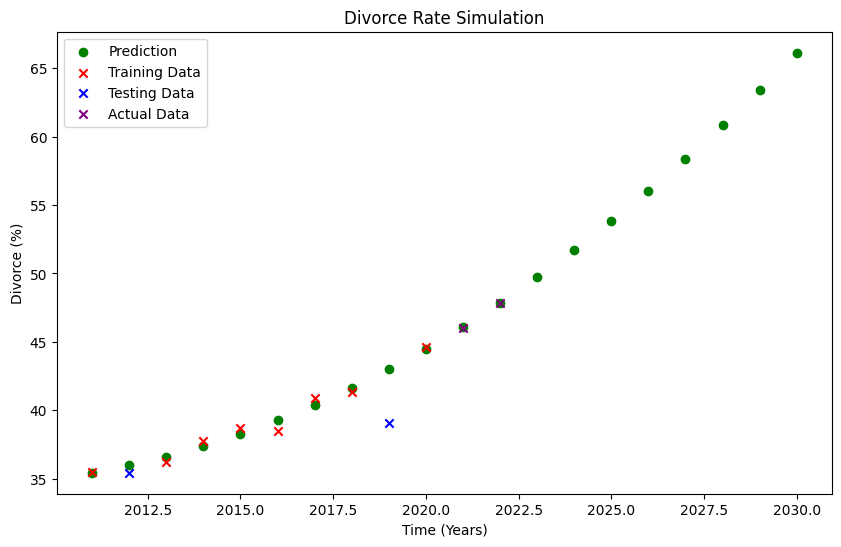

Intercept: [245306.93446266]
Coefficient for Divorce: [ 0.00000000e+00 -2.44388566e+02  6.08769917e-02]
R-squared (polynomial): 0.977254844032873
Adjusted R-squared (polynomial): 0.9601959770575277
Mean Absolute Error: 0.36268416699638806 this indicates that, on average, the model's predictions deviate by approximately 36.27% points from the actual values which is relatively small.
Mean Squared Error: 0.17623241741439746 this suggests that, on average, the model's predictions are relatively close to the actual values
Root Mean Squared Error: 0.4198004495166691 this suggests that, on average, the model's predictions deviate by approximately 41.98% percentage points from the actual values which is generally considered low and indicates that the model's predictions are relatively accurate.
   Years Time(t)     Actual Simulation
0   2011       0  35.485379      35.45
1   2012       1  35.432242      35.97
2   2013       2  36.217976      36.61
3   2014       3  37.740753      37.37
4   201

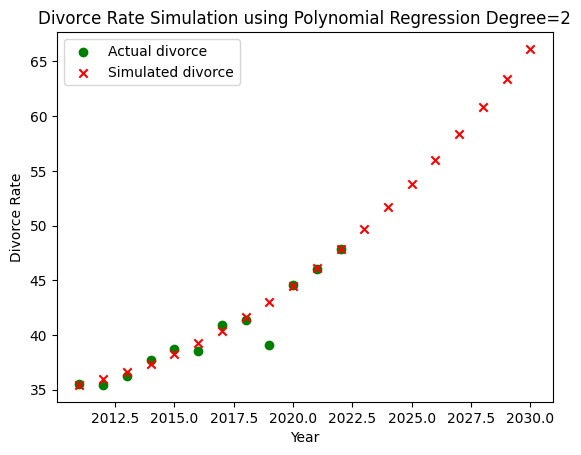

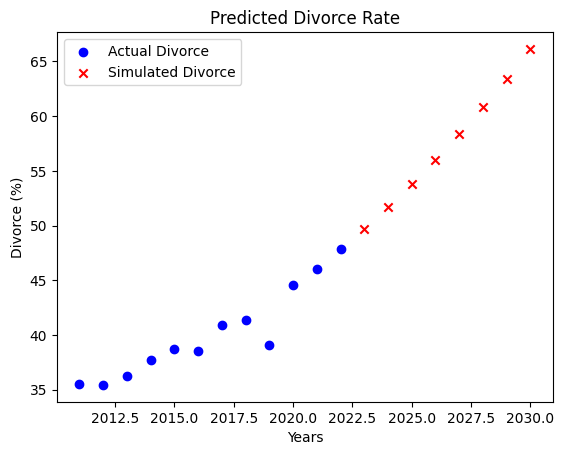

[35.49, 35.43, 36.22, 37.74, 38.73, 38.52, 40.88, 41.33, 39.08, 44.6, 46.04, 47.84, 49.72, 51.7, 53.8, 56.03, 58.37, 60.84, 63.43, 66.14]
UQ = 1.19555%


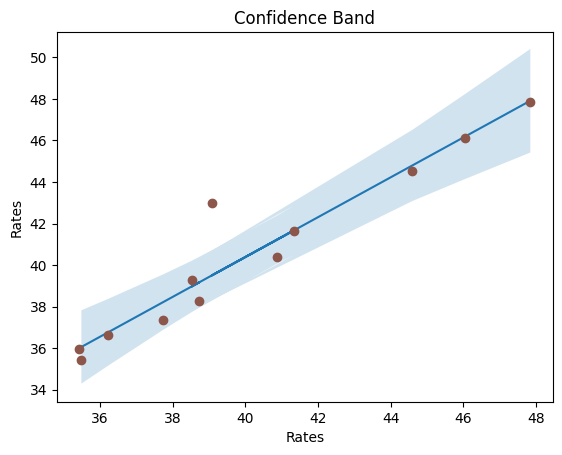

In [27]:
X = np.array(df.columns[:-2]).astype(int).reshape(-1, 1)  # Time (years)
y = df.loc['Divorce (%)'][:-2].values  # Thailand Population change
X=X.reshape(-1, 1)

# Reshape the y array to two dimensions
y = y.reshape(-1, 1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (experiment with different degrees)
poly = PolynomialFeatures(degree=2)  # Example: quadratic model
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the testing set
predictions = model.predict(X_train_poly)


# Make predictions for 2019-2030
future_time = range(2011, 2031)
future_data = poly.transform([[x] for x in future_time])
future_predictions = model.predict(future_data)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the prediction curve along with original data
plt.scatter(future_time, future_predictions, marker='o',color='green', label='Prediction')
plt.scatter(X_train, y_train, marker='x',color='red',label='Training Data')
plt.scatter(X_test, y_test,marker='x',color='blue', label='Testing Data')
plt.scatter(np.array(df.columns[-2:]).astype(int).reshape(-1, 1), df.loc['Divorce (%)'][-2:].values,marker='x',color='purple', label='Actual Data')
plt.xlabel('Time (Years)')
plt.ylabel('Divorce (%)')
# plt.ylim(0,100)
plt.title('Divorce Rate Simulation')
plt.legend()
plt.show()

# Extract the coefficients
r_squared = model.score(X_train_poly, y_train)
adjusted_r_squared = 1 - (1 - r_squared) * (len(y_train) - 1) / (len(y_train) - X_train_poly.shape[1] - 1)
slope = model.coef_[0]
intercept = model.intercept_
# Evaluate the model
print(f"Intercept: {intercept}")
print(f"Coefficient for Divorce: {slope}")
print('R-squared (polynomial):', r_squared)
print('Adjusted R-squared (polynomial):', adjusted_r_squared)
# correlation = (pd.to_numeric(df.loc['Divorce (%)'][:-4], errors='coerce')).corr(pd.to_numeric((df.columns[:-4]).astype(int), errors='coerce'))
# print(f"Correlation = {correlation} as they are negatively correlated it implies that as divorce rate increases, GDP rate would be decreasing.")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_train, predictions)} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(y_train, predictions)*100,2)}% points from the actual values which is relatively small.")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_train, predictions)} this suggests that, on average, the model\'s predictions are relatively close to the actual values")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_train, predictions))} this suggests that, on average, the model\'s predictions deviate by approximately {round(np.sqrt(metrics.mean_squared_error(y_train, predictions))*100,2)}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate.")

sim_years=[sy for sy in range(2011,2031)]
sim_div_polyreg = np.round(future_predictions,2)
polyreg_sim_columns=['Years','Time(t)','Actual','Simulation']
polyreg_sim_rows=[i for i in range(20)]
div_poly_sim_df = pd.DataFrame(index=polyreg_sim_rows,columns=polyreg_sim_columns)


for polyregsim in range(20):
    div_poly_sim_df.iloc[polyregsim,0]=sim_years[polyregsim]
    div_poly_sim_df.iloc[polyregsim,1]=polyregsim
    if polyregsim < len(pop_data):
        div_poly_sim_df.iloc[polyregsim,2]=div_rate[polyregsim]
    div_poly_sim_df.iloc[polyregsim,3]=sim_div_polyreg[polyregsim]

print(div_poly_sim_df)

#Uncertainties Quantification for Linear Regression Model
summation=0
U_each1=[]
sim_div_polyreg_compare1=sim_div_polyreg[:len(pop_data)-2]
for diffsq in range(10):
    U_each1.append(np.sqrt((sim_div_polyreg_compare1[diffsq]-(div_rate[diffsq]))**2))
    summation=summation+(sim_div_polyreg_compare1[diffsq]-np.mean(div_rate[:-2]))**2
# print(abs(np.mean(sim_pop_polyreg_compare)-np.mean(pop_data))/np.mean(pop_data)*100)
# U3=np.sqrt(summation/(12*11))
U1=(abs(np.mean(sim_div_polyreg_compare1)-np.mean(div_rate[:-2]))/np.mean(div_rate[:-2])*100)
print(f'Uncertainties Quantification shows a {"{:.4f}".format(U1)}% lower and upper solution of uncertainties for the polynomial regression model.')

# time = [i for i in range(2011,2021)]
# # Plot the actual and simulated data
# plt.scatter(time, div_rate[:-2], label='Actual Divorce', color='blue')
# plt.plot(time, sim_div_polyreg_compare1, label='Simulated Divorce', color='red')

# sim_div1_1d = sim_div_polyreg_compare1.flatten()
# U_each1_1d = np.array(U_each1).flatten()

# # Add shaded regions for uncertainties
# plt.fill_between(time, sim_div1_1d- U_each1_1d, sim_div1_1d + U_each1_1d, color='grey', alpha=0.2, label='Uncertainties')

# plt.xlabel('Year')
# plt.ylabel('Divorce')
# plt.ylim(30, 45)
# plt.title('Uncertainty quantification for Polynomial Regression model')
# plt.legend()
# plt.show()

act_years=[i for i in range(2011,2023)]

# Initialize the plot
fig, ax = plt.subplots()

# Initialize the plot with the first frame
scatter = ax.scatter(act_years, div_rate, color='green', marker='o', label='Actual divorce')
scatter2 = ax.scatter(sim_years, sim_div_polyreg, color='red',marker='x', label='Simulated divorce')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Divorce Rate')
ax.set_title('Divorce Rate Simulation using Polynomial Regression Degree=2')
ax.legend()

def update(frame):
    # Combine x and y coordinates into a single 2D array for each scatter plot
    scatter_offsets = np.c_[act_years[:frame+1], div_rate[:frame+1]]  # Concatenate x and y values
    scatter2_offsets = np.c_[sim_years[:frame+1], sim_div_polyreg[:frame+1]]

    # Update the offsets using the combined arrays
    scatter.set_offsets(scatter_offsets)
    scatter2.set_offsets(scatter2_offsets)

    return scatter, scatter2

# Create the animation
animation = FuncAnimation(fig, update, frames=len(sim_years), interval=200, blit=True)

# Save the animation as a GIF file
animation.save('Poly_div_sim.gif', writer=PillowWriter(fps=5))

# Display the plot
plt.show()

time = [i for i in range(2011,2031)]
# Plot the actual and simulated data
plt.scatter(time[:12], div_rate, label='Actual Divorce', color='blue', marker='o')
plt.scatter(time[12:], sim_div_polyreg[12:], label='Simulated Divorce', color='red',marker='x')
plt.xlabel('Years')
plt.ylabel('Divorce (%)')
# plt.ylim(30, 45)
plt.title('Predicted Divorce Rate')
plt.legend()
plt.show()

fin_div_rate = [i for i in (np.round(div_rate,2))]
for i in range(12,len(sim_div_polyreg)):
    fin_div_rate.append(sim_div_polyreg[i][0])

print(fin_div_rate)

# N = 12
x = np.array(div_rate)
y = sim_div_polyreg[:len(div_rate)]

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +(x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.set_ylabel('Rates')
ax.set_xlabel('Rates')
# ax.set_xticklabels([i for i in range(2011,2023)])
ax.set_title("Confidence Band")
ax.plot(x, y, 'o', color='tab:brown')

U__ = np.sqrt(sum((sim_div_polyreg[:len(div_rate)]-np.mean(div_rate))**2)/(len(div_rate)*(len(div_rate)-1)))
print(f"UQ = {round(U__[0],5)}%")

In [28]:
# ##Very important code

# N = 21
# x = np.linspace(0, 10, 11)
# print(type(x))
# y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# # fit a linear curve and estimate its y-values and their error.
# a, b = np.polyfit(x, y, deg=1)
# y_est = a * x + b
# y_err = x.std() * np.sqrt(1/len(x) +
#                           (x - x.mean())**2 / np.sum((x - x.mean())**2))

# fig, ax = plt.subplots()
# ax.plot(x, y_est, '-')
# ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
# ax.plot(x, y, 'o', color='tab:brown')

In [29]:
# U_sum = 0

# for i in range(len(div_rate)):
#     U_sum = U_sum + (sim_div_polyreg[i][0]-np.array(div_rate).mean())**2

# U_val = np.sqrt((U_sum)/(len(div_rate)*(len(div_rate)-1)))
# print(U_val)

In [30]:
# # N = 12
# x = np.array(div_rate)
# y = sim_div_polyreg[:len(div_rate)]

# # fit a linear curve and estimate its y-values and their error.
# a, b = np.polyfit(x, y, deg=1)
# y_est = a * x + b
# y_err = x.std() * np.sqrt(1/len(x) +(x - x.mean())**2 / np.sum((x - x.mean())**2))

# time = list(range(2011, 2023))
# fig, ax = plt.subplots()
# ax.scatter(time, x)
# ax.plot(time, y, '-')
# ax.fill_between(range(2011,2023), y_est - y_err, y_est + y_err, alpha=0.2)
# ax.set_ylabel('Divorce Rate')
# ax.set_xlabel('Year')
# # ax.set_xticklabels([i for i in range(2011,2023)])
# ax.set_title("Uncertainty Quantification")

# U__ = np.sqrt(sum((sim_div_polyreg[:len(div_rate)]-np.mean(div_rate))**2)/(len(div_rate)*(len(div_rate)-1)))
# print(f"UQ = {round(U__[0],5)}%")

In [31]:

# U__[0]
# emp_list1 = []
# emp_list2 = []
# for a in range(len(div_rate)):
#     if div_rate[a] > sim_div_polyreg[a]:
#         emp_list1.append(div_rate[a]+(U__[0]*div_rate[a]/100))
#         emp_list2.append(sim_div_polyreg[a][0]-(U__[0]*sim_div_polyreg[a][0]/100))
#     else:
#         emp_list1.append(sim_div_polyreg[a][0]+(U__[0]*sim_div_polyreg[a][0]/100))
#         emp_list2.append(div_rate[a]-(U__[0]*div_rate[a]/100))
# print(emp_list1)
# print(emp_list2)

# emp_listt = [div_rate[0]]
# emp_listtt = [div_rate[0]]
# for abc in range(len(div_rate)-1):
#     if (emp_listt[abc]+(emp_listt[abc]*U__[0]/100) or emp_listtt[abc]+(emp_listtt[abc]*U__[0]/100)) > div_rate[abc]:
#         if emp_listt[abc]+(emp_listt[abc]*U__[0]/100) > div_rate:  
#             emp_listt.append(emp_listt[abc]+(emp_listt[abc]*U__[0]/100))
#         emp_listtt.append(emp_listtt[abc]+(emp_listtt[abc]*U__[0]/100))
#     else:
#         emp_listt.append(div_rate[abc]+(emp_listt[abc]*U__[0]/100))
#         emp_listtt.append(div_rate[abc]-(emp_listtt[abc]*U__[0]/100))

# print(emp_listt)
# print(emp_listtt)

In [32]:
# # Define uncertainty (e.g., standard deviation)
# uncertainty = U__[0]  # Example uncertainty value

# # Calculate upper and lower bounds for uncertainty
# upper_bound = np.array(simmm) + uncertainty
# lower_bound = np.array(simmm) - uncertainty

# # Plotting
# plt.figure(figsize=(10, 6))

# # Plot actual values
# plt.plot(years, div_rate, marker='o', linestyle='-', color='b', label='Actual')

# # Plot predicted values
# plt.plot(simmm, marker='o', linestyle='-', color='r', label='Predicted')

# # Plot uncertainty (shaded region)
# plt.fill_between(years, lower_bound, upper_bound, color='gray', alpha=0.4, label='Uncertainty')

# # Customize plot
# plt.title('Uncertainty Quantification')
# plt.xlabel('Data Points')
# plt.ylabel('Values')
# plt.legend()
# plt.grid(True)

# # Show plot
# plt.show()

In [33]:
# from matplotlib.patches import PathPatch
# from matplotlib.path import Path

# def draw_error_band(ax, x, y, err, **kwargs):
#     # Calculate normals via centered finite differences (except the first point
#     # which uses a forward difference and the last point which uses a backward
#     # difference).
#     dx = np.concatenate([[x[1] - x[0]], x[2:] - x[:-2], [x[-1] - x[-2]]])
#     dy = np.concatenate([[y[1] - y[0]], y[2:] - y[:-2], [y[-1] - y[-2]]])
#     l = np.hypot(dx, dy)
#     nx = dy / l
#     ny = -dx / l

#     # end points of errors
#     xp = x + nx * err
#     yp = y + ny * err
#     xn = x - nx * err
#     yn = y - ny * err

#     vertices = np.block([[xp, xn[::-1]],
#                          [yp, yn[::-1]]]).T
#     codes = np.full(len(vertices), Path.LINETO)
#     codes[0] = codes[len(xp)] = Path.MOVETO
#     path = Path(vertices, codes)
#     ax.add_patch(PathPatch(path, **kwargs))


# _, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True)
# errs = [
#     (axs[0], "constant error", 1.0755021451558406),
#     (axs[1], "variable error", 1.0755021451558406),
# ]
# for i, (ax, title, err) in enumerate(errs):
#     ax.set(title=title, aspect=1, xticks=[], yticks=[])
#     ax.plot(div_rate, sim_div_polyreg[:len(div_rate)], "k")
#     draw_error_band(ax, div_rate, sim_div_polyreg[:len(div_rate)], err=err,
#                     facecolor=f"C{i}", edgecolor="none", alpha=.3)

# plt.show()

In [34]:
# time = [i for i in range(2011,2023)]
# # Plot the actual and simulated data
# plt.scatter(time, div_rate, label='Actual Divorce', color='blue')
# plt.plot(time, sim_div_polyreg[:len(div_rate)], label='Simulated Divorce', color='red')

# # sim_div1_1d = emp_list1.flatten()
# # U_each1_1d = emp_list2.flatten()

# # Add shaded regions for uncertainties
# plt.fill_between(time, emp_listt, emp_listtt, color='grey', alpha=0.2, label='Uncertainties')

# plt.xlabel('Year')
# plt.ylabel('Divorce')
# plt.ylim(20, 50)
# plt.title('Uncertainty quantification for Polynomial Regression model')
# plt.legend()
# plt.show()

In [35]:
# import matplotlib.pyplot as plt
# from scipy import stats

# def calculate_uncertainty_and_plot(actual_population, predicted_population):
#   """
#   Calculates uncertainty (confidence interval) and plots it with actual and predicted population.

#   Args:
#       actual_population (list): List of actual population values.
#       predicted_population (list): List of predicted population values.
#   """

#   if len(actual_population) != len(predicted_population):
#     raise ValueError("Lists of actual and predicted population must have the same length.")

#   # Calculate errors (differences)
#   errors = np.subtract(actual_population, predicted_population)

#   # Calculate mean error and standard deviation of errors
#   mean_error = np.mean(errors)
#   std_error = np.std(errors)

#   # Calculate confidence interval (95% by default)
#   confidence_interval = stats.norm.interval(alpha=0.95, loc=mean_error, scale=std_error)

#   # Plot actual population, predicted population, and confidence interval
#   plt.figure(figsize=(10, 6))  # Adjust figure size as needed

#   plt.plot(actual_population, label="Actual Population")
#   plt.plot(predicted_population, label="Predicted Population")
#   plt.fill_between(
#       np.arange(len(actual_population)),
#       confidence_interval[0],
#       confidence_interval[1],
#       alpha=0.2,  # Adjust alpha for transparency of shaded area
#       label="95% Confidence Interval"
#   )

#   plt.xlabel("Time")
#   plt.ylabel("Population")
#   plt.title("Population Growth with Uncertainty")
#   plt.legend()
#   plt.grid(True)
#   plt.show()

# # Example usage (assuming you have your actual and predicted population lists)
# actual_population = div_rate
# predicted_population = sim_div_polyreg[:len(div_rate)]

# print(calculate_uncertainty_and_plot(actual_population, predicted_population))



In [36]:
# # Example data (replace with your actual and predicted values)
# actual_values = div_rate
# predicted_values = sim_div1_1d = sim_div_polyreg[:len(pop_data)].flatten()

# # Calculate uncertainty (standard deviation in this case)
# residuals = np.array(actual_values) - np.array(predicted_values)
# uncertainty = np.std(residuals)

# # Calculate upper and lower bounds for uncertainty
# upper_bound = np.array(actual_values) + uncertainty
# lower_bound = np.array(actual_values) - uncertainty

# # Plotting
# plt.figure(figsize=(10, 6))

# # Plot actual values
# plt.plot(actual_values, marker='o', linestyle='-', color='b', label='Actual')

# # Plot predicted values
# plt.plot(predicted_values, marker='o', linestyle='-', color='r', label='Predicted')

# # Plot uncertainty (shaded region)
# plt.fill_between(range(len(predicted_values)), lower_bound, upper_bound, color='gray', alpha=0.4, label='Uncertainty')

# # Customize plot
# plt.title('Uncertainty Quantification')
# plt.xlabel('Data Points')
# plt.ylabel('Values')
# plt.legend()
# plt.grid(True)

# # Show plot
# plt.show()

# # Print uncertainty value
# print("Uncertainty:", uncertainty)

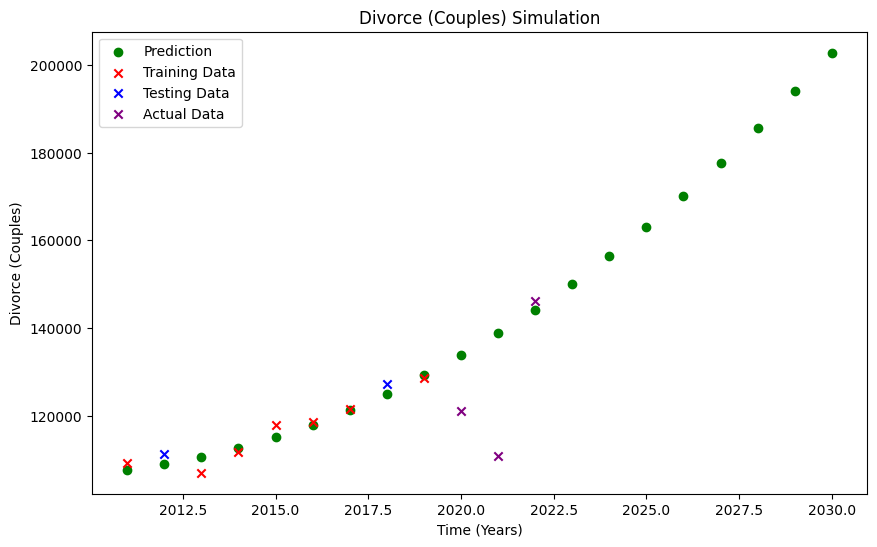

Intercept: [8.50103271e+08]
Coefficient for Divorce: [ 0.00000000e+00 -8.46344241e+05  2.10676871e+02]
R-squared (polynomial): 0.9284690827695098
Adjusted R-squared (polynomial): 0.8569381655390196
Mean Absolute Error: 1462.5733721596855 this indicates that, on average, the model's predictions deviate by approximately 146257.34% points from the actual values which is relatively small.
Mean Squared Error: 3472483.3663308406 this suggests that, on average, the model's predictions are relatively close to the actual values
Root Mean Squared Error: 1863.4600522498035 this suggests that, on average, the model's predictions deviate by approximately 186346.01% percentage points from the actual values which is generally considered low and indicates that the model's predictions are relatively accurate.
   Years Time(t)  Actual Simulation
0   2011       0  109312  107758.72
1   2012       1  111377  108967.53
2   2013       2  107031  110597.69
3   2014       3  111810  112649.21
4   2015       4

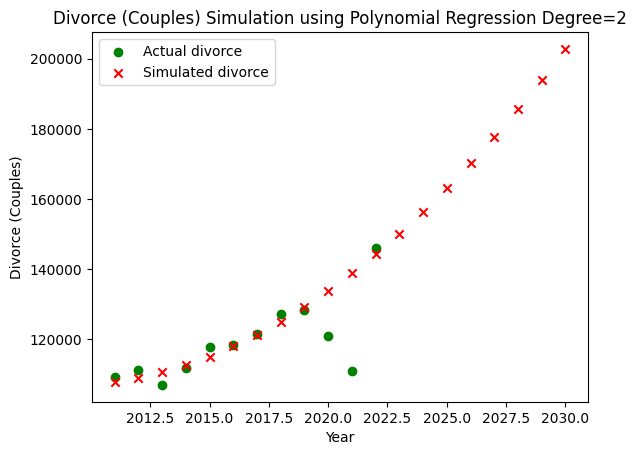

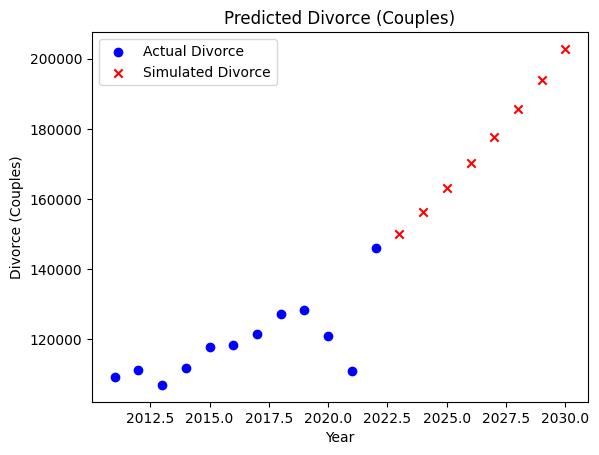

[109312, 111377, 107031, 111810, 117880, 118539, 121617, 127265, 128514, 121011, 110942, 146159, 150073.78, 156338.84, 163025.24, 170133.01, 177662.12, 185612.59, 193984.41, 202777.59]
UQ = 3.61845%


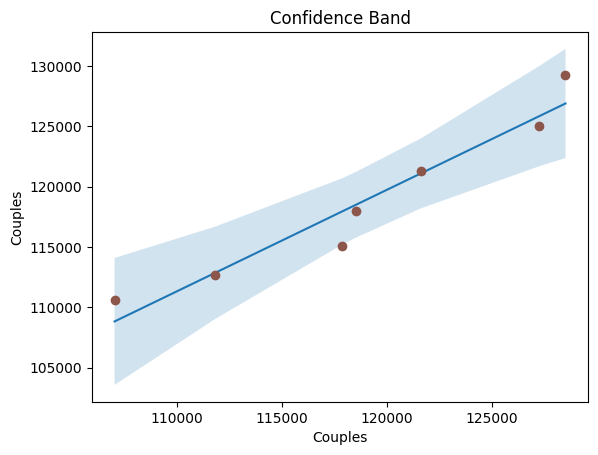

In [37]:
X = np.array(df.columns[:-3]).astype(int).reshape(-1, 1)  # Time (years)
y = df.loc['Divorce (Couples)'][:-3].values  # Thailand Population change
X=X.reshape(-1, 1)

# Reshape the y array to two dimensions
y = y.reshape(-1, 1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (experiment with different degrees)
poly = PolynomialFeatures(degree=2)  # Example: quadratic model
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the testing set
predictions = model.predict(X_train_poly)

# Make predictions for 2019-2030
future_time = range(2011, 2031)
future_data = poly.transform([[x] for x in future_time])
future_predictions = model.predict(future_data)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the prediction curve along with original data
plt.scatter(future_time, future_predictions, marker='o',color='green', label='Prediction')
plt.scatter(X_train, y_train, marker='x',color='red',label='Training Data')
plt.scatter(X_test, y_test,marker='x',color='blue', label='Testing Data')
plt.scatter(np.array(df.columns[-3:]).astype(int).reshape(-1, 1), df.loc['Divorce (Couples)'][-3:].values,marker='x',color='purple', label='Actual Data')
plt.xlabel('Time (Years)')
plt.ylabel('Divorce (Couples)')
# plt.ylim(0,100)
plt.title('Divorce (Couples) Simulation')
plt.legend()
plt.show()

# Extract the coefficients
r_squared = model.score(X_train_poly, y_train)
adjusted_r_squared = 1 - (1 - r_squared) * (len(y_train) - 1) / (len(y_train) - X_train_poly.shape[1] - 1)
slope = model.coef_[0]
intercept = model.intercept_
# Evaluate the model
print(f"Intercept: {intercept}")
print(f"Coefficient for Divorce: {slope}")
print('R-squared (polynomial):', r_squared)
print('Adjusted R-squared (polynomial):', adjusted_r_squared)
# correlation = (pd.to_numeric(df.loc['Divorce (%)'][:-4], errors='coerce')).corr(pd.to_numeric((df.columns[:-4]).astype(int), errors='coerce'))
# print(f"Correlation = {correlation} as they are negatively correlated it implies that as divorce rate increases, GDP rate would be decreasing.")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_train, predictions)} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(y_train, predictions)*100,2)}% points from the actual values which is relatively small.")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_train, predictions)} this suggests that, on average, the model\'s predictions are relatively close to the actual values")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_train, predictions))} this suggests that, on average, the model\'s predictions deviate by approximately {round(np.sqrt(metrics.mean_squared_error(y_train, predictions))*100,2)}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate.")

sim_years=[sy for sy in range(2011,2031)]
sim_div_polyreg = np.round(future_predictions,2)
polyreg_sim_columns=['Years','Time(t)','Actual','Simulation']
polyreg_sim_rows=[i for i in range(20)]
div_poly_sim_df = pd.DataFrame(index=polyreg_sim_rows,columns=polyreg_sim_columns)

for polyregsim in range(20):
    div_poly_sim_df.iloc[polyregsim,0]=sim_years[polyregsim]
    div_poly_sim_df.iloc[polyregsim,1]=polyregsim
    if polyregsim < len(pop_data):
        div_poly_sim_df.iloc[polyregsim,2]=div_data[polyregsim]
    div_poly_sim_df.iloc[polyregsim,3]=sim_div_polyreg[polyregsim]

print(div_poly_sim_df)

#Uncertainties Quantification for Linear Regression Model
summation=0
U_each1=[]
sim_div_polyreg_compare1=sim_div_polyreg[:len(div_data)-3]
for diffsq in range(9):
    U_each1.append(np.sqrt((sim_div_polyreg_compare1[diffsq]-(div_data[diffsq]))**2))
    summation=summation+(sim_div_polyreg_compare1[diffsq]-np.mean(div_data[:-3]))**2
# print(abs(np.mean(sim_pop_polyreg_compare)-np.mean(pop_data))/np.mean(pop_data)*100)
# U3=np.sqrt(summation/(12*11))
U1=(abs(np.mean(sim_div_polyreg_compare1)-np.mean(div_data[:-3]))/np.mean(div_data[:-3])*100)
print(f'Uncertainties Quantification shows a {"{:.4f}".format(U1)}% lower and upper solution of uncertainties for the polynomial regression model.')

# time = [i for i in range(2011,2021)]
# # Plot the actual and simulated data
# plt.scatter(time, div_data[:-3], label='Actual Divorce', color='blue')
# plt.plot(time, sim_div_polyreg_compare1, label='Simulated Divorce', color='red')

# sim_div1_1d = sim_div_polyreg_compare1.flatten()
# U_each1_1d = np.array(U_each1).flatten()

# # Add shaded regions for uncertainties
# plt.fill_between(time, sim_div1_1d- U_each1_1d, sim_div1_1d + U_each1_1d, color='grey', alpha=0.2, label='Uncertainties')

# plt.xlabel('Year')
# plt.ylabel('Divorce (Couples)')
# plt.ylim(30, 45)
# plt.title('Uncertainty quantification for Polynomial Regression model')
# plt.legend()
# plt.show()

act_years=[i for i in range(2011,2023)]

# Initialize the plot
fig, ax = plt.subplots()

# Initialize the plot with the first frame
scatter = ax.scatter(act_years, div_data, color='green', marker='o', label='Actual divorce')
scatter2 = ax.scatter(sim_years, sim_div_polyreg, color='red',marker='x', label='Simulated divorce')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Divorce (Couples)')
ax.set_title('Divorce (Couples) Simulation using Polynomial Regression Degree=2')
ax.legend()

def update(frame):
    # Combine x and y coordinates into a single 2D array for each scatter plot
    scatter_offsets = np.c_[act_years[:frame+1], div_data[:frame+1]]  # Concatenate x and y values
    scatter2_offsets = np.c_[sim_years[:frame+1], sim_div_polyreg[:frame+1]]

    # Update the offsets using the combined arrays
    scatter.set_offsets(scatter_offsets)
    scatter2.set_offsets(scatter2_offsets)

    return scatter, scatter2

# Create the animation
animation = FuncAnimation(fig, update, frames=len(sim_years), interval=200, blit=True)

# Save the animation as a GIF file
animation.save('Poly_div_data_sim.gif', writer=PillowWriter(fps=5))

# Display the plot
plt.show()

time = [i for i in range(2011,2031)]
# Plot the actual and simulated data
plt.scatter(time[:12], div_data, label='Actual Divorce', color='blue', marker='o')
plt.scatter(time[12:], sim_div_polyreg[12:], label='Simulated Divorce', color='red',marker='x')
plt.xlabel('Year')
plt.ylabel('Divorce (Couples)')
# plt.ylim(30, 45)
plt.title('Predicted Divorce (Couples)')
plt.legend()
plt.show()

fin_div_data = [i for i in (np.round(div_data,2))]
for i in range(12,len(sim_div_polyreg)):
    fin_div_data.append(sim_div_polyreg[i][0])

print(fin_div_data)

# N = 12
x = np.array(div_data[2:-3])
y = sim_div_polyreg[2:len(div_data)-3]

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +(x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.set_ylabel('Couples')
ax.set_xlabel('Couples')
# ax.set_xticklabels([i for i in range(2011,2023)])
ax.set_title("Confidence Band")
ax.plot(x, y, 'o', color='tab:brown')

U__ = np.sqrt(sum((sim_div_polyreg[:len(div_data)]-np.mean(div_data))**2)/(len(div_data)*(len(div_data)-1)))
print(f"UQ = {round(U__[0]/100000*100,5)}%")

In [38]:
# X = np.array(df.columns[:-4]).astype(int).reshape(-1, 1)  # Time (years)
# y = df.loc['Divorce (Couples)'][:-4].values  # Thailand Population change
# X=X.reshape(-1, 1)
# y = y.reshape(-1, 1)

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create polynomial features (experiment with different degrees)
# poly = PolynomialFeatures(degree=2)  # Example: quadratic model
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)

# # Fit the polynomial regression model
# model = LinearRegression()
# model.fit(X_train_poly, y_train)

# # Make predictions on the testing set
# predictions = model.predict(X_test_poly)


# # Make predictions for 2019-2030
# future_time = range(2011, 2031)
# future_data = poly.transform([[x] for x in future_time])
# future_predictions = model.predict(future_data)

# # Plot the results
# plt.figure(figsize=(10, 6))

# # Plot the prediction curve along with original data
# plt.scatter(future_time, future_predictions, marker='o',color='green', label='Prediction')
# plt.scatter(X_train, y_train, marker='x',color='red',label='Training Data')
# plt.scatter(X_test, y_test,marker='x',color='blue', label='Testing Data')
# plt.scatter(np.array(df.columns[-4:]).astype(int).reshape(-1, 1), df.loc['Divorce (Couples)'][-4:].values,marker='x',color='purple', label='Actual Data')

# plt.xlabel('Time (Years)')
# plt.ylabel('Divorce')
# plt.title('Divorce Data SImulation')
# plt.legend()
# plt.show()

In [39]:
# # Extract the coefficients
# r_squared = model.score(X_test_poly, y_test)
# adjusted_r_squared = 1 - (1 - r_squared) * (len(y_test) - 1) / (len(y_test) - X_test_poly.shape[1] - 1)
# slope = model.coef_[0]
# intercept = model.intercept_
# # Evaluate the model
# print(f"Intercept: {intercept}")
# print(f"Coefficient for Divorce: {slope}")
# print('R-squared (polynomial):', r_squared)
# print('Adjusted R-squared (polynomial):', adjusted_r_squared)
# # correlation = (pd.to_numeric(df.loc['Divorce (%)'][:-4], errors='coerce')).corr(pd.to_numeric((df.columns[:-4]).astype(int), errors='coerce'))
# # print(f"Correlation = {correlation} as they are negatively correlated it implies that as divorce rate increases, GDP rate would be decreasing.")

# MSE = metrics.mean_squared_error(y_test, predictions)

# rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
# target_range = np.max(y_test) - np.min(y_test)
# percentage_accuracy = round((1.0 - (rmse / target_range)),2)

# print(f"R^2 value: {r_squared:.4f}")
# print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions)} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(y_test, predictions)/np.mean(y_test)*100,2)}% points from the actual values which is relatively small.")
# print(f"Mean Squared Error: {(np.square((MSE)/np.mean(y_test)))/1000}% this suggests that, on average, the model\'s predictions are relatively close to the actual values")
# print(f"Root Mean Squared Error: {rmse} this suggests that, on average, the model\'s predictions deviate by approximately {percentage_accuracy}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate.")

# # print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions)} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(y_test, predictions)*100,2)}% points from the actual values which is relatively small.")
# # print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, predictions)} this suggests that, on average, the model\'s predictions are relatively close to the actual values")
# # print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions))} this suggests that, on average, the model\'s predictions deviate by approximately {round(np.sqrt(metrics.mean_squared_error(y_test, predictions))*100,2)}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate.")

In [40]:
# sim_div_data_polyreg = np.round(future_predictions).astype(int)
# polyreg_sim_columns=['Years','Time(t)','Actual','Simulation']
# polyreg_sim_rows=[i for i in range(20)]
# div_data_poly_sim_df = pd.DataFrame(index=polyreg_sim_rows,columns=polyreg_sim_columns)

# for polyregsim2 in range(20):
#     div_data_poly_sim_df.iloc[polyregsim2,0]=sim_years[polyregsim2]
#     div_data_poly_sim_df.iloc[polyregsim2,1]=polyregsim2
#     if polyregsim2 < len(pop_data):
#         div_data_poly_sim_df.iloc[polyregsim2,2]=div_data[polyregsim2]
#     div_data_poly_sim_df.iloc[polyregsim2,3]= np.round(sim_div_data_polyreg[polyregsim2]).astype(int)

# div_data_poly_sim_df

In [41]:
# abc = [i for i in np.round(sim_div_data_polyreg).astype(int).tolist()[11:-1]]
# new = []
# for j in range(len(abc)):
#     new.append(abc[j][0])
# fin_div_sim = div_data +  new
# print(fin_div_sim)

In [42]:
# act_years=[i for i in range(2011,2023)]

# # Initialize the plot
# fig, ax = plt.subplots()

# # Initialize the plot with the first frame
# scatter = ax.scatter(act_years, div_data, color='red', marker='o', label='Actual divorce')
# scatter2 = ax.scatter(sim_years, sim_div_data_polyreg, color='purple',marker='x', label='Simulated divorce')

# # Set labels and title
# ax.set_xlabel('Year')
# ax.set_ylabel('Divorce Data')
# ax.set_title('Actual Divorce Simulation using Polynomial Regression Degree=2')
# ax.legend()

# def update(frame):
#     # Combine x and y coordinates into a single 2D array for each scatter plot
#     scatter_offsets = np.c_[act_years[:frame+1], div_data[:frame+1]]  # Concatenate x and y values
#     scatter2_offsets = np.c_[sim_years[:frame+1], sim_div_data_polyreg[:frame+1]]

#     # Update the offsets using the combined arrays
#     scatter.set_offsets(scatter_offsets)
#     scatter2.set_offsets(scatter2_offsets)

#     return scatter, scatter2

# # Create the animation
# animation = FuncAnimation(fig, update, frames=len(sim_years), interval=200, blit=True)

# # Save the animation as a GIF file
# animation.save('Poly_div_sim_act.gif', writer=PillowWriter(fps=5))

# # Display the plot
# plt.show()

In [43]:
# #Uncertainties Quantification for Linear Regression Model
# summation=0
# U_each=[]
# sim_div_polyreg_compare=sim_div_data_polyreg[:len(pop_data)-4]
# for diffsq in range(8):
#     U_each.append(np.sqrt((sim_div_polyreg_compare[diffsq]-(div_data[diffsq]))**2))
#     summation=summation+(sim_div_polyreg_compare[diffsq]-np.mean(div_data[:-4]))**2
# # print(abs(np.mean(sim_pop_polyreg_compare)-np.mean(pop_data))/np.mean(pop_data)*100)
# # U3=np.sqrt(summation/(12*11))
# U=(abs(np.mean(sim_div_polyreg_compare)-np.mean(div_data[:-4]))/np.mean(div_data[:-4])*100)
# print(f'Uncertainties Quantification shows a {"{:.4f}".format(U)}% lower and upper solution of uncertainties for the polynomial regression model.')

In [44]:
# time = [i for i in range(2011,2019)]
# # Plot the actual and simulated data
# plt.scatter(time, div_data[:-4], label='Actual Divorce', color='blue')
# plt.plot(time, sim_div_polyreg_compare, label='Simulated Divorce', color='red')

# sim_div_1d = sim_div_polyreg_compare.flatten()
# U_each_1d = np.array(U_each).flatten()

# # Add shaded regions for uncertainties
# plt.fill_between(time, sim_div_1d- U_each_1d, sim_div_1d + U_each_1d, color='grey', alpha=0.2, label='Uncertainties')

# plt.xlabel('Year')
# plt.ylabel('Divorce')
# plt.ylim(90000, 140000)
# plt.title('Uncertainty quantification for Polynomial Regression model')
# plt.legend()
# plt.show()

In [45]:
# # N = 12
# x = np.array(div_data[2:9])
# y = sim_div_data_polyreg[2:9]

# # fit a linear curve and estimate its y-values and their error.
# a, b = np.polyfit(x, y, deg=1)
# y_est = a * x + b
# y_err = x.std() * np.sqrt(1/len(x) +(x - x.mean())**2 / np.sum((x - x.mean())**2))

# fig, ax = plt.subplots()
# ax.plot(x, y_est, '-')
# ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
# ax.set_ylabel('Rates')
# ax.set_xlabel('Rates')
# # ax.set_xticklabels([i for i in range(2011,2023)])
# ax.set_title("Uncertainty Quantification")
# ax.plot(x, y, 'o', color='tab:brown')

# print(len(x),len(y),len(y_est),len(y_err))

# U__ = np.sqrt(sum((sim_div_data_polyreg[:len(div_data)-4]-np.mean(div_data[:-4]))**2)/(len(div_data[:-4])*(len(div_data[:-4])-1)))
# print(f"UQ = {round(U__[0],5)/100000*100}%")

**BIRTH SIMULATION**

In [46]:
# # Load all birth rate data into a pandas Series
# birth_rates = pd.Series(birth_rate[:-4], index=range(2011, 2019))

# # Define the ARIMA model (adjust order parameters as needed)
# model = ARIMA(birth_rates, order=(1, 1, 1))  # Example order (p, d, q)

# # Fit the model to the data
# model_fit = model.fit()

# # Generate predictions for all years (2011-2030)
# forecast = model_fit.fittedvalues  # Predictions for 2011-2018 (known data)
# forecast = pd.concat([forecast, model_fit.forecast(steps=12)])  # Combine with predictions for 2019-2030

# # Plot the actual data and predictions
# plt.plot(birth_rates.index, birth_rates, marker='o', c='blue', label='Actual Birth Rates')
# plt.scatter(sim_years[-12:], forecast[-12:], marker='x', c='red', label='Predicted Birth Rates')

# # Add title and legend
# plt.title('Birth rate prediction (2011-2030)')
# plt.legend()
# plt.show()


In [47]:
# # print(forecast)
# br_pred = forecast.tolist()
# # Calculate the mean of both lists
# mean_birth_rate = np.mean(birth_rate[2:9])
# mean_br_pred = np.mean(br_pred[2:9])

# # Calculate the squared deviations from the mean for both lists
# squared_deviations_birth_rate = [(x - mean_birth_rate)**2 for x in birth_rate[2:9]]
# squared_deviations_br_pred = [(y - mean_br_pred)**2 for y in br_pred[2:9]]

# # Calculate the total squared deviations for both lists
# total_squared_deviations_birth_rate = np.sum(squared_deviations_birth_rate)
# total_squared_deviations_br_pred = np.sum(squared_deviations_br_pred)

# # Calculate the explained variance
# explained_variance = np.sum([(birth_rate[i] - mean_birth_rate) * (br_pred[i] - mean_br_pred) for i in range(2,9)])

# # Calculate the r^2 value
# r_squared = explained_variance / total_squared_deviations_birth_rate

# print(f"R^2 value: {r_squared:.4f}")
# print(f"Mean Absolute Error: {metrics.mean_absolute_error(birth_rate[2:9], br_pred[2:9])} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(birth_rate[2:9], br_pred[2:9])*100,2)}% points from the actual values which is relatively small.")
# print(f"Mean Squared Error: {metrics.mean_squared_error(birth_rate[2:9], br_pred[2:9])} this suggests that, on average, the model\'s predictions are relatively close to the actual values")
# print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(birth_rate[2:9], br_pred[2:9]))} this suggests that, on average, the model\'s predictions deviate by approximately {round(np.sqrt(metrics.mean_squared_error(birth_rate[2:9], br_pred[2:9]))*100,2)}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate.")

In [48]:
# time = [i for i in range(2011,2023)]

# plt.scatter(time[1:], birth_rate[1:], marker='o', c='blue', label='Actual Birth Rates')
# plt.scatter(sim_years[1:], br_pred[1:], marker='x', c='red', label='Predicted Birth Rates')

# plt.title('Birth rate prediction (2011-2030)')
# plt.legend()
# plt.show()

In [49]:
# sim_birth_rate = br_pred
# TS_sim_columns=['Years','Time(t)','Actual','Simulation']
# TS_sim_rows=[i for i in range(20)]
# TS_birth_rate_sim_df = pd.DataFrame(index=TS_sim_rows,columns=TS_sim_columns)

# for TS in range(20):
#     TS_birth_rate_sim_df.iloc[TS,0]=sim_years[TS]
#     TS_birth_rate_sim_df.iloc[TS,1]=TS
#     if TS < len(pop_data):
#         TS_birth_rate_sim_df.iloc[TS,2]=birth_rate[TS]
#     TS_birth_rate_sim_df.iloc[TS,3]= np.round(br_pred[TS],3)

# TS_birth_rate_sim_df

In [50]:
# #Uncertainties Quantification for Linear Regression Model
# summation=0
# U_each_br=[]
# sim_br_compare=sim_birth_rate
# for diffsq in range(2,9):
#     U_each_br.append(np.sqrt((sim_br_compare[diffsq]-(birth_rate[diffsq]))**2))
#     summation=summation+(sim_br_compare[diffsq]-np.mean(birth_rate[2:9]))**2
# # print(abs(np.mean(sim_pop_polyreg_compare)-np.mean(pop_data))/np.mean(pop_data)*100)
# # U3=np.sqrt(summation/(12*11))
# U_br=(abs(np.mean(sim_br_compare[2:9])-np.mean(birth_rate[2:9]))/np.mean(birth_rate[2:9])*100)
# print(f'Uncertainties Quantification shows a {"{:.4f}".format(U_br)}% lower and upper solution of uncertainties for the Time Series Analysis model.')

In [51]:
# time = [i for i in range(2011,2019)]
# # Plot the actual and simulated data
# plt.scatter(time[1:], birth_rate[2:9], label='Actual Birth Rate', color='blue')
# plt.plot(time[1:], sim_br_compare[2:9], label='Simulated Birth Rate', color='red')

# sim_1d = sim_br_compare[2:9]
# U_each_1d = np.array(U_each_br)


# # Add shaded regions for uncertainties
# plt.fill_between(time[1:], sim_1d- U_each_1d, sim_1d + U_each_1d, color='orange', alpha=0.5, label='Uncertainties')

# plt.xlabel('Year')
# plt.ylabel('Birth')
# # plt.ylim(9000, 140000)
# plt.title('Uncertainty quantification for Polynomial Regression model')
# plt.legend()
# plt.show()

c:\Users\Lossarin Sathitsethi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


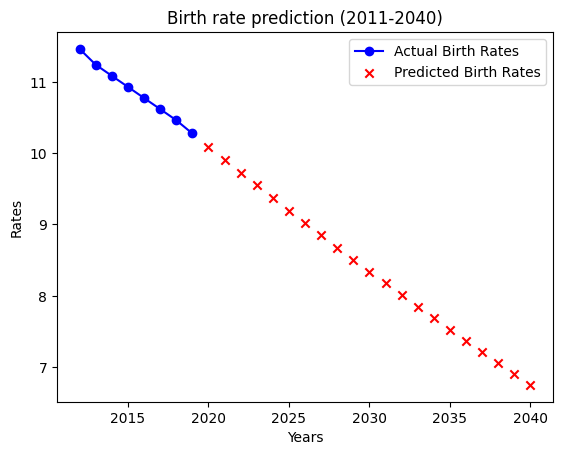

R^2 value: 0.9507
Mean Absolute Error: 0.01482840208720074 this indicates that, on average, the model's predictions deviate by approximately 1.48% points from the actual values which is relatively small.
Mean Squared Error: 0.0007093556529386075 this suggests that, on average, the model's predictions are relatively close to the actual values
Root Mean Squared Error: 0.026633731487319 this suggests that, on average, the model's predictions deviate by approximately 2.66% percentage points from the actual values which is generally considered low and indicates that the model's predictions are relatively accurate.


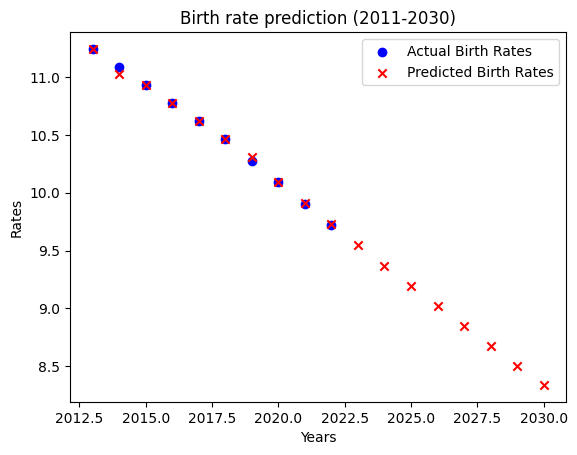

   Years Time(t)  Actual Simulation
0   2011       0  11.682        0.0
1   2012       1  11.461     11.682
2   2013       2   11.24     11.242
3   2014       3  11.084     11.021
4   2015       4  10.929     10.931
5   2016       5  10.773     10.775
6   2017       6  10.618     10.618
7   2018       7  10.462     10.465
8   2019       8  10.276     10.307
9   2020       9   10.09     10.091
10  2021      10   9.904      9.908
11  2022      11   9.718      9.727
12  2023      12     NaN      9.547
13  2024      13     NaN      9.369
14  2025      14     NaN      9.193
15  2026      15     NaN      9.019
16  2027      16     NaN      8.847
17  2028      17     NaN      8.676
18  2029      18     NaN      8.506
19  2030      19     NaN      8.339
20  2031      20     NaN      8.173
21  2032      21     NaN      8.009
22  2033      22     NaN      7.846
23  2034      23     NaN      7.685
24  2035      24     NaN      7.525
25  2036      25     NaN      7.367
26  2037      26     NaN    

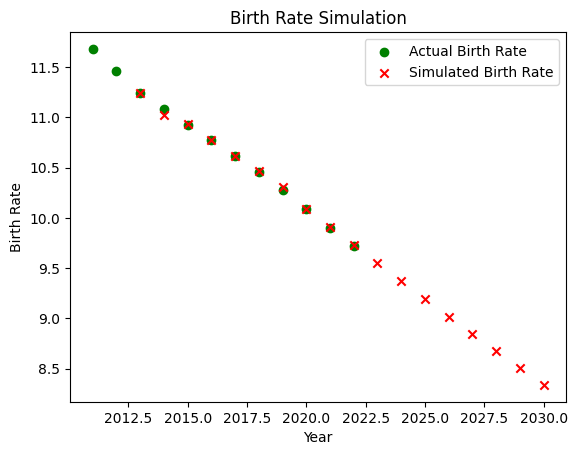

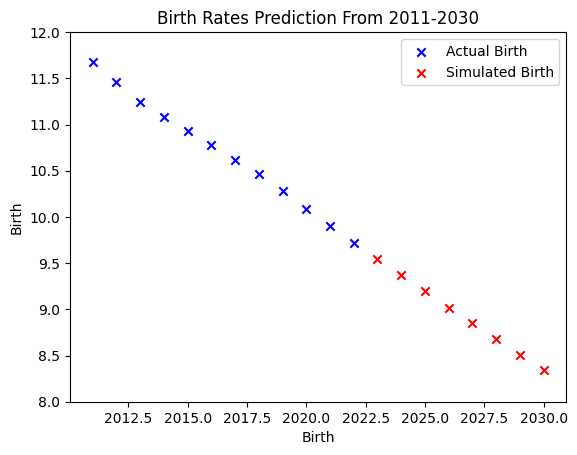

[11.682, 11.461, 11.24, 11.084, 10.929, 10.773, 10.618, 10.462, 10.276, 10.09, 9.904, 9.718, 9.547, 9.369, 9.193, 9.019, 8.847, 8.676, 8.506, 8.339]
UQ = 0.15815%


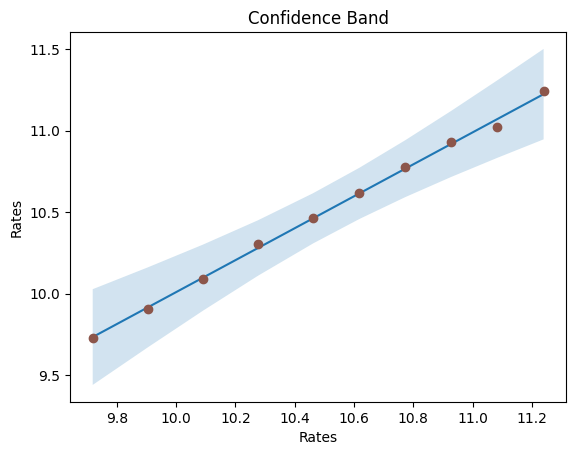

In [52]:
# Load all birth rate data into a pandas Series
birth_rates = pd.Series(birth_rate[:-3], index=range(2011, 2020))

# Define the ARIMA model (adjust order parameters as needed)
model = ARIMA(birth_rates, order=(1,1,1))  # Example order (p, d, q)

# Fit the model to the data
model_fit = model.fit()

# Generate predictions for all years (2011-2040)
forecast = model_fit.fittedvalues  # Predictions for 2011-2019 (known data)
forecast = pd.concat([forecast, model_fit.forecast(steps=21)])  # Combine with predictions for 2019-2040

simm_years = [i for i in range(2011,2041)]
# Plot the actual data and predictions
plt.plot(birth_rates.index[1:], birth_rates[1:], marker='o', c='blue', label='Actual Birth Rates')
plt.scatter(simm_years[-21:], forecast[-21:], marker='x', c='red', label='Predicted Birth Rates')

# Add title and legend
plt.title('Birth rate prediction (2011-2040)')
plt.xlabel('Years')
plt.ylabel('Rates')
plt.legend()
plt.show()

# print(forecast)
br_pred = forecast.tolist()
# Calculate the mean of both lists
mean_birth_rate = np.mean(birth_rate[2:9])
mean_br_pred = np.mean(br_pred[2:9])

# Calculate the squared deviations from the mean for both lists
squared_deviations_birth_rate = [(x - mean_birth_rate)**2 for x in birth_rate[2:9]]
squared_deviations_br_pred = [(y - mean_br_pred)**2 for y in br_pred[2:9]]

# Calculate the total squared deviations for both lists
total_squared_deviations_birth_rate = np.sum(squared_deviations_birth_rate)
total_squared_deviations_br_pred = np.sum(squared_deviations_br_pred)

# Calculate the explained variance
explained_variance = np.sum([(birth_rate[i] - mean_birth_rate) * (br_pred[i] - mean_br_pred) for i in range(2,9)])

# Calculate the r^2 value
r_squared = explained_variance / total_squared_deviations_birth_rate

print(f"R^2 value: {r_squared:.4f}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(birth_rate[2:9], br_pred[2:9])} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(birth_rate[2:9], br_pred[2:9])*100,2)}% points from the actual values which is relatively small.")
print(f"Mean Squared Error: {metrics.mean_squared_error(birth_rate[2:9], br_pred[2:9])} this suggests that, on average, the model\'s predictions are relatively close to the actual values")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(birth_rate[2:9], br_pred[2:9]))} this suggests that, on average, the model\'s predictions deviate by approximately {round(np.sqrt(metrics.mean_squared_error(birth_rate[2:9], br_pred[2:9]))*100,2)}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate.")

time = [i for i in range(2011,2023)]

plt.scatter(time[2:], birth_rate[2:], marker='o', c='blue', label='Actual Birth Rates')
plt.scatter(simm_years[2:-10], br_pred[2:-10], marker='x', c='red', label='Predicted Birth Rates')

plt.title('Birth rate prediction (2011-2030)')
plt.xlabel("Years")
plt.ylabel("Rates")
plt.legend()
plt.show()

sim_birth_rate = br_pred
TS_sim_columns=['Years','Time(t)','Actual','Simulation']
TS_sim_rows=[i for i in range(30)]
TS_birth_rate_sim_df = pd.DataFrame(index=TS_sim_rows,columns=TS_sim_columns)

for TS in range(30):
    TS_birth_rate_sim_df.iloc[TS,0]=simm_years[TS]
    TS_birth_rate_sim_df.iloc[TS,1]=TS
    if TS < len(pop_data):
        TS_birth_rate_sim_df.iloc[TS,2]=birth_rate[TS]
    TS_birth_rate_sim_df.iloc[TS,3]= np.round(br_pred[TS],3)

print(TS_birth_rate_sim_df)

#Uncertainties Quantification for Linear Regression Model
summation=0
U_each_br=[]
sim_br_compare=sim_birth_rate
for diffsq in range(2,9):
    U_each_br.append(np.sqrt((sim_br_compare[diffsq]-(birth_rate[diffsq]))**2))
    summation=summation+(sim_br_compare[diffsq]-np.mean(birth_rate[2:9]))**2
# print(abs(np.mean(sim_pop_polyreg_compare)-np.mean(pop_data))/np.mean(pop_data)*100)
# U3=np.sqrt(summation/(12*11))
U_br=(abs(np.mean(sim_br_compare[2:9])-np.mean(birth_rate[2:9]))/np.mean(birth_rate[2:9])*100)
print(f'Uncertainties Quantification shows a {"{:.4f}".format(U_br)}% lower and upper solution of uncertainties for the Time Series Analysis model.')
time = [i for i in range(2011,2020)]

# # Plot the actual and simulated data
# plt.scatter(time[2:], birth_rate[2:9], label='Actual Birth Rate', color='blue')
# plt.plot(time[2:], sim_br_compare[2:9], label='Simulated Birth Rate', color='red')

# sim_1d = sim_br_compare[2:9]
# U_each_1d = np.array(U_each_br)


# # Add shaded regions for uncertainties
# plt.fill_between(time[2:], sim_1d- U_each_1d, sim_1d + U_each_1d, color='orange', alpha=0.5, label='Uncertainties')

# plt.xlabel('Year')
# plt.ylabel('Birth Rate')
# plt.ylim(9, 13)
# plt.title('Uncertainty quantification for Polynomial Regression model')
# plt.legend()
# plt.show()

sim_years=[sy for sy in range(2011,2031)]
act_years=[i for i in range(2011,2023)]

# Initialize the plot
fig, ax = plt.subplots()

# Initialize the plot with the first frame
scatter = ax.scatter(act_years, birth_rate, color='green', marker='o', label='Actual Birth Rate')
scatter2 = ax.scatter(sim_years[2:], sim_birth_rate[2:-10], color='red',marker='x', label='Simulated Birth Rate')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Birth Rate')
ax.set_title('Birth Rate Simulation')
ax.legend()

def update(frame):
    # Combine x and y coordinates into a single 2D array for each scatter plot
    scatter_offsets = np.c_[act_years[:frame+1], birth_rate[:frame+1]]  # Concatenate x and y values
    scatter2_offsets = np.c_[sim_years[2:frame+1], sim_birth_rate[2:frame+1]]

    # Update the offsets using the combined arrays
    scatter.set_offsets(scatter_offsets)
    scatter2.set_offsets(scatter2_offsets)

    return scatter, scatter2

# Create the animation
animation = FuncAnimation(fig, update, frames=len(sim_years), interval=200, blit=True)

# Save the animation as a GIF file
animation.save('TS_birth_sim.gif', writer=PillowWriter(fps=5))

# Display the plot
plt.show()


birth_rate_time=[i for i in range(2011,2031)]
plt.scatter(birth_rate_time[:12], birth_rate, marker='x', label='Actual Birth', color='blue')
plt.scatter(birth_rate_time[12:], br_pred[12:-10],marker='x', label='Simulated Birth', color='red')
plt.xlabel('Birth')
plt.ylabel('Birth')
plt.ylim(8,12)
plt.title('Birth Rates Prediction From 2011-2030')
plt.legend()
plt.show()

brfs = birth_rate + [round(num,3) for num in br_pred[12:-10]]
print(brfs)

# N = 12
x = np.array(birth_rate[2:])
y = sim_br_compare[2:len(birth_rate)]

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +(x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.set_ylabel('Rates')
ax.set_xlabel('Rates')
# ax.set_xticklabels([i for i in range(2011,2023)])
ax.set_title("Confidence Band")
ax.plot(x, y, 'o', color='tab:brown')

U__ = np.sqrt(sum((sim_br_compare[2:len(birth_rate)]-np.mean(birth_rate[2:]))**2)/(len(birth_rate[2:])*(len(birth_rate[2:])-1)))
print(f"UQ = {round(U__,5)}%")

c:\Users\Lossarin Sathitsethi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Lossarin Sathitsethi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


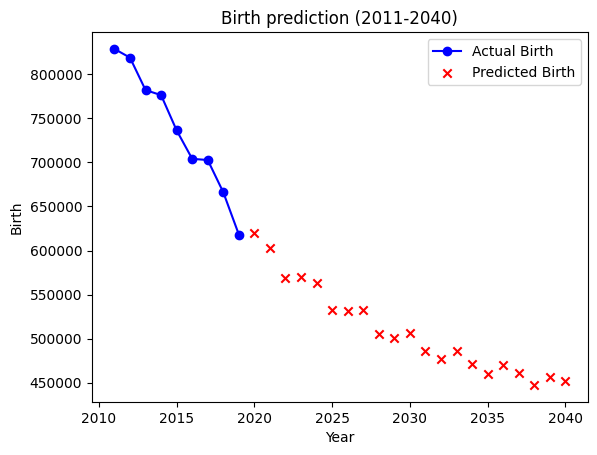

MSE: 26520050.875 birth mean: 725608.375 MSE/Death mean: 1335.808283613699
R^2 value: 0.9559
Mean Absolute Error: 3801.625 this indicates that, on average, the model's predictions deviate by approximately 0.52% points from the actual values which is relatively small.
Mean Squared Error: 0.06% this suggests that, on average, the model's predictions are relatively close to the actual values
Root Mean Squared Error: 5149.762215384319 this suggests that, on average, the model's predictions deviate by approximately 0.97% percentage points from the actual values which is generally considered low and indicates that the model's predictions are relatively accurate.


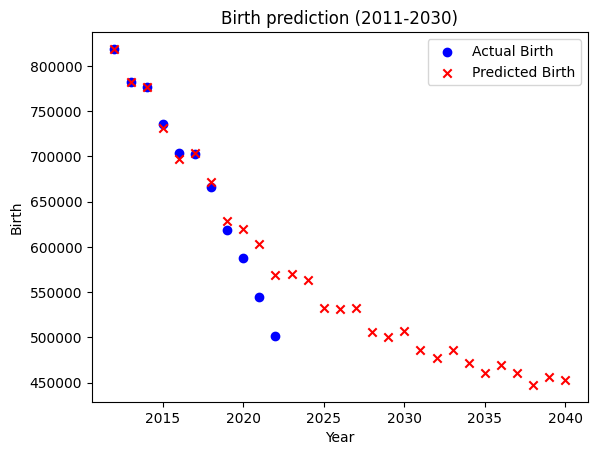

   Years Time(t)  Actual Simulation
0   2011       0  828827        0.0
1   2012       1  818901   818905.0
2   2013       2  782129   782873.0
3   2014       3  776370   776893.0
4   2015       4  736352   731412.0
5   2016       5  704058   697669.0
6   2017       6  702755   704066.0
7   2018       7  666109   672331.0
8   2019       8  618193   628473.0
9   2020       9  587368   620189.0
10  2021      10  544570   603280.0
11  2022      11  502107   568548.0
12  2023      12     NaN   570030.0
13  2024      13     NaN   563483.0
14  2025      14     NaN   532268.0
15  2026      15     NaN   530863.0
16  2027      16     NaN   532057.0
17  2028      17     NaN   505561.0
18  2029      18     NaN   500546.0
19  2030      19     NaN   506884.0
20  2031      20     NaN   485965.0
21  2032      21     NaN   477414.0
22  2033      22     NaN   486467.0
23  2034      23     NaN   471527.0
24  2035      24     NaN   460105.0
25  2036      25     NaN   469773.0
26  2037      26     NaN   4

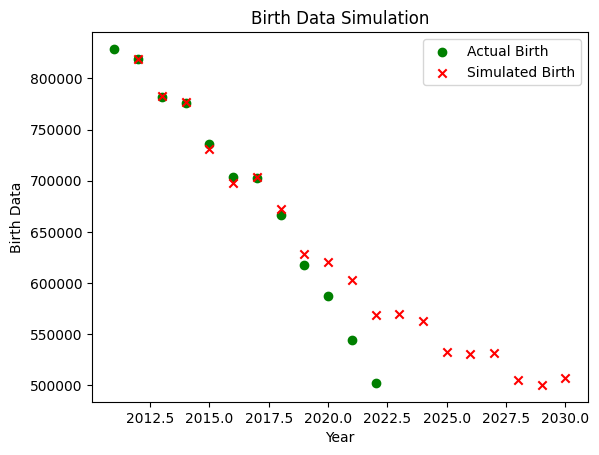

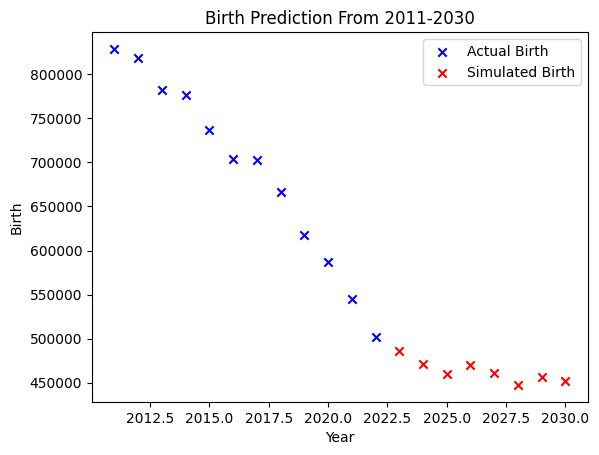

[828827, 818901, 782129, 776370, 736352, 704058, 702755, 666109, 618193, 587368, 544570, 502107, 486467.0, 471527.0, 460105.0, 469773.0, 460728.0, 447474.0, 456100.0, 452423.0]
UQ = 23.09464209%


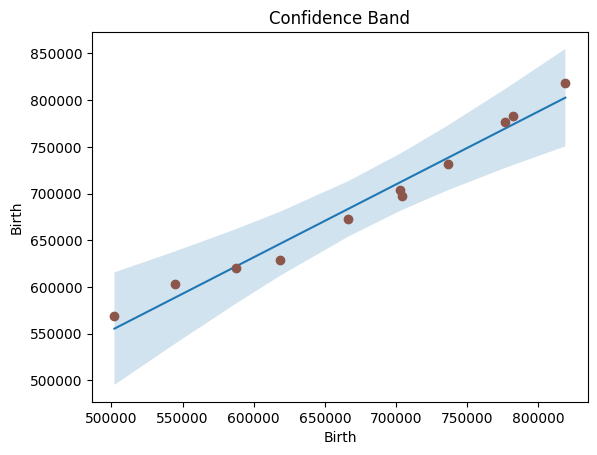

In [53]:
birth_data_ = pd.Series(birth_data[:-3], index=range(2011, 2020))
# Define the ARIMA model (adjust order parameters as needed)
model = ARIMA(birth_data_, order=(4, 1, 3))  # Example order (p, d, q)

# Fit the model to the data
model_fit = model.fit()

# Generate predictions for all years (2011-2040)
forecast = model_fit.fittedvalues  # Predictions for 2011-2019 (known data)
forecast = pd.concat([forecast, model_fit.forecast(steps=21)])  # Combine with predictions for 2020-2040

simm_years = [i for i in range(2011,2041)]
# Plot the actual data and predictions
plt.plot(birth_data_.index, birth_data_, marker='o', c='blue', label='Actual Birth')
plt.scatter(simm_years[-21:], forecast[-21:], marker='x', c='red', label='Predicted Birth')

# Add title and legend
plt.title('Birth prediction (2011-2040)')
plt.xlabel('Year')
plt.ylabel('Birth')
plt.legend()
plt.show()

# print(forecast)
br_pred = np.round(forecast.tolist())
# Calculate the mean of both lists
mean_birth = np.mean(birth_data[1:9])
mean_br_pred = np.mean(br_pred[1:9])

# Calculate the squared deviations from the mean for both lists
squared_deviations_birth = [(x - mean_birth)**2 for x in birth_data[1:9]]
squared_deviations_br_pred = [(y - mean_br_pred)**2 for y in br_pred[1:9]]

# Calculate the total squared deviations for both lists
total_squared_deviations_birth = np.sum(squared_deviations_birth)
total_squared_deviations_br_pred = np.sum(squared_deviations_br_pred)

# Calculate the explained variance
explained_variance = np.sum([(birth_data[i] - mean_birth) * (br_pred[i] - mean_br_pred) for i in range(1,9)])

# Calculate the r^2 value
r_squared = explained_variance / total_squared_deviations_birth

MSE = metrics.mean_squared_error(birth_data[1:9], br_pred[1:9])

rmse = np.sqrt(metrics.mean_squared_error(birth_data[1:9], br_pred[1:9]))
target_range = np.max(birth_data[1:9]) - np.min(birth_data[1:9])
percentage_accuracy = round((1.0 - (rmse / target_range)),2)

print('MSE:',MSE, 'birth mean:',np.mean(birth_data[1:9]), 'MSE/Death mean:',(np.square((MSE)/np.mean(birth_data[1:9]))))
print(f"R^2 value: {r_squared:.4f}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(birth_data[1:9], br_pred[1:9])} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(birth_data[1:9], br_pred[1:9])/np.mean(birth_data[1:9])*100,2)}% points from the actual values which is relatively small.")
print(f"Mean Squared Error: {round((np.sqrt(((MSE)/np.mean(birth_data[1:9])))/100),2)}% this suggests that, on average, the model\'s predictions are relatively close to the actual values")
print(f"Root Mean Squared Error: {rmse} this suggests that, on average, the model\'s predictions deviate by approximately {percentage_accuracy}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate.")

time = [i for i in range(2011,2023)]

plt.scatter(time[1:], birth_data[1:], marker='o', c='blue', label='Actual Birth')
plt.scatter(simm_years[1:], br_pred[1:], marker='x', c='red', label='Predicted Birth')

plt.title('Birth prediction (2011-2030)')
plt.xlabel('Year')
plt.ylabel('Birth')
plt.legend()
plt.show()

sim_birth_data = br_pred
TS_sim_columns=['Years','Time(t)','Actual','Simulation']
TS_sim_rows=[i for i in range(30)]
TS_birth_data_sim_df = pd.DataFrame(index=TS_sim_rows,columns=TS_sim_columns)

for TS in range(30):
    TS_birth_data_sim_df.iloc[TS,0]=simm_years[TS]
    TS_birth_data_sim_df.iloc[TS,1]=TS
    if TS < len(pop_data):
        TS_birth_data_sim_df.iloc[TS,2]=birth_data[TS]
    TS_birth_data_sim_df.iloc[TS,3]= np.round(br_pred[TS],3)

print(TS_birth_data_sim_df)

#Uncertainties Quantification for Linear Regression Model
summation=0
U_each_br=[]
sim_br_compare=sim_birth_data
for diffsq in range(1,9):
    U_each_br.append(np.sqrt((sim_br_compare[diffsq]-(birth_data[diffsq]))**2))
    summation=summation+(sim_br_compare[diffsq]-np.mean(birth_data[1:9]))**2
# print(abs(np.mean(sim_pop_polyreg_compare)-np.mean(pop_data))/np.mean(pop_data)*100)
# U3=np.sqrt(summation/(12*11))
U_br=(abs(np.mean(sim_br_compare[1:9])-np.mean(birth_data[1:9]))/np.mean(birth_data[1:9])*100)
print(f'Uncertainties Quantification shows a {"{:.4f}".format(U_br)}% lower and upper solution of uncertainties for the Time Series Analysis model.')
time = [i for i in range(2011,2020)]

# # Plot the actual and simulated data
# plt.scatter(time[1:], birth_data[1:9], label='Actual Birth', color='blue')
# plt.plot(time[1:], sim_br_compare[1:9], label='Simulated Birth', color='red')

# sim_1d = sim_br_compare[1:9]
# U_each_1d = np.array(U_each_br)


# # Add shaded regions for uncertainties
# plt.fill_between(time[1:], sim_1d- U_each_1d, sim_1d + U_each_1d, color='orange', alpha=0.5, label='Uncertainties')

# plt.xlabel('Year')
# plt.ylabel('Birth')
# plt.ylim(400000, 990000)
# plt.title('Uncertainty quantification for Birth TS model')
# plt.legend()
# plt.show()

sim_years=[sy for sy in range(2011,2031)]
act_years=[i for i in range(2011,2023)]

# Initialize the plot
fig, ax = plt.subplots()

# Initialize the plot with the first frame
scatter = ax.scatter(act_years, birth_data, color='green', marker='o', label='Actual Birth')
scatter2 = ax.scatter(sim_years[1:], sim_birth_data[1:20], color='red',marker='x', label='Simulated Birth')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Birth Data')
ax.set_title('Birth Data Simulation')
ax.legend()

def update(frame):
    # Combine x and y coordinates into a single 2D array for each scatter plot
    scatter_offsets = np.c_[act_years[:frame+1], birth_data[:frame+1]]  # Concatenate x and y values
    scatter2_offsets = np.c_[sim_years[1:frame+1], sim_birth_data[1:frame+1]]

    # Update the offsets using the combined arrays
    scatter.set_offsets(scatter_offsets)
    scatter2.set_offsets(scatter2_offsets)

    return scatter, scatter2

# Create the animation
animation = FuncAnimation(fig, update, frames=len(sim_years), interval=200, blit=True)

# Save the animation as a GIF file
animation.save('TS_birth_data_sim.gif', writer=PillowWriter(fps=5))

# Display the plot
plt.show()

birth_data_time=[i for i in range(2011,2031)]
plt.scatter(birth_data_time[:12], birth_data,marker='x', label='Actual Birth', color='blue')
plt.scatter(birth_data_time[12:], br_pred[22:],marker='x', label='Simulated Birth', color='red')
plt.xlabel('Year')
plt.ylabel('Birth')
# plt.ylim(100000, 990000)
plt.title('Birth Prediction From 2011-2030')
plt.legend()
plt.show()

bfs = birth_data + (br_pred[22:]).tolist()
print(bfs)

# N = 12
x = np.array(birth_data[1:])
y = sim_br_compare[1:len(birth_data)]

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +(x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.set_ylabel('Birth')
ax.set_xlabel('Birth')
# ax.set_xticklabels([i for i in range(2011,2023)])
ax.set_title("Confidence Band")
ax.plot(x, y, 'o', color='tab:brown')

U__ = np.sqrt(sum((sim_br_compare[1:len(birth_data)-2]-np.mean(birth_data[1:-2]))**2)/(len(birth_data[1:-2])*(len(birth_data[1:-2])-1)))
print(f"UQ = {round(U__,5)/100000*100}%")

**DEATH SIMULATION**

c:\Users\Lossarin Sathitsethi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Lossarin Sathitsethi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


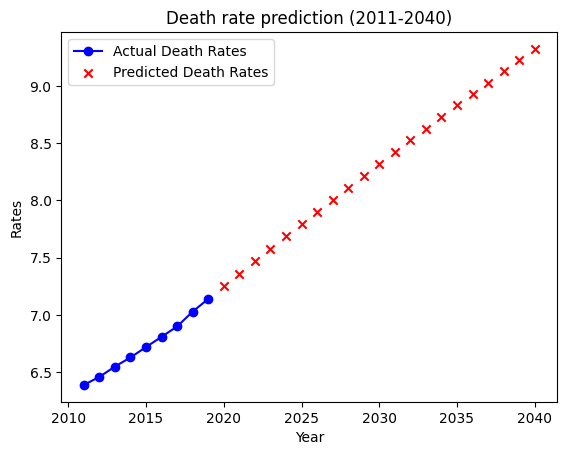

R^2 value: 0.9963
Mean Absolute Error: 0.01207690845673058 this indicates that, on average, the model's predictions deviate by approximately 1.21% points from the actual values which is relatively small.
Mean Squared Error: 0.0003285132254672371 this suggests that, on average, the model's predictions are relatively close to the actual values
Root Mean Squared Error: 0.018124933805871875 this suggests that, on average, the model's predictions deviate by approximately 1.81% percentage points from the actual values which is generally considered low and indicates that the model's predictions are relatively accurate.


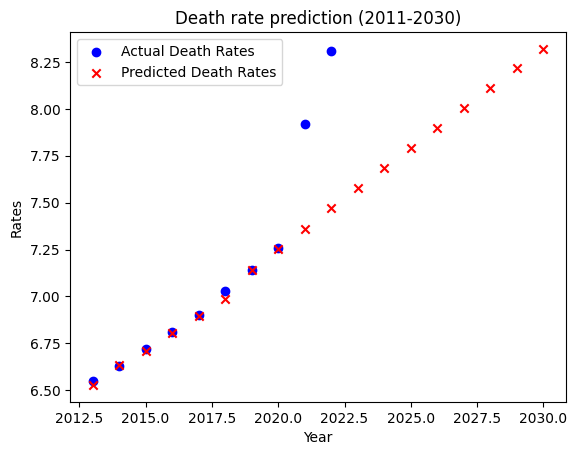

   Years Time(t) Actual Simulation
0   2011       0   6.39        0.0
1   2012       1   6.46       6.39
2   2013       2   6.55      6.529
3   2014       3   6.63      6.632
4   2015       4   6.72       6.71
5   2016       5   6.81      6.806
6   2017       6    6.9      6.898
7   2018       7   7.03      6.989
8   2019       8   7.14      7.143
9   2020       9   7.26      7.251
10  2021      10   7.92      7.361
11  2022      11   8.31       7.47
12  2023      12    NaN      7.578
13  2024      13    NaN      7.686
14  2025      14    NaN      7.793
15  2026      15    NaN        7.9
16  2027      16    NaN      8.006
17  2028      17    NaN      8.111
18  2029      18    NaN      8.215
19  2030      19    NaN      8.319
20  2031      20    NaN      8.422
21  2032      21    NaN      8.525
22  2033      22    NaN      8.627
23  2034      23    NaN      8.728
24  2035      24    NaN      8.829
25  2036      25    NaN      8.928
26  2037      26    NaN      9.028
27  2038      27    

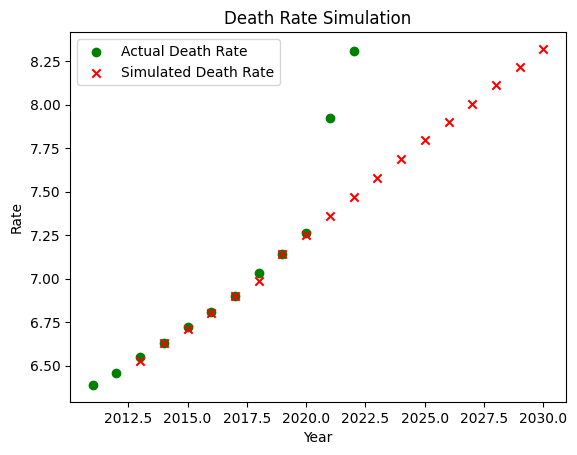

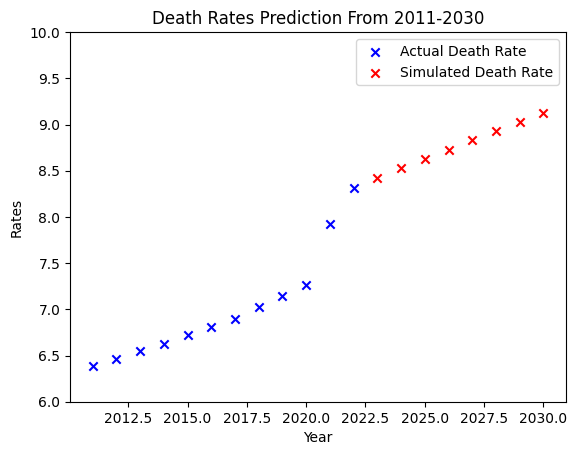

[6.39, 6.46, 6.55, 6.63, 6.72, 6.81, 6.9, 7.03, 7.14, 7.26, 7.92, 8.31, 8.42, 8.52, 8.63, 8.73, 8.83, 8.93, 9.03, 9.13]
UQ = 0.08165%


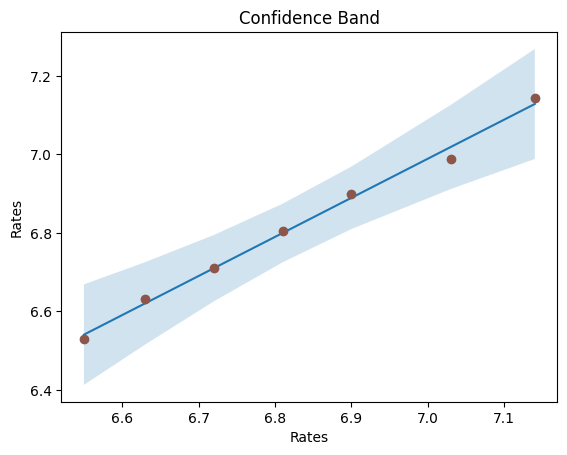

In [54]:
death_rates = pd.Series(death_rate[:-3], index=range(2011, 2020))

# Define the ARIMA model (adjust order parameters as needed)
model = ARIMA(death_rates, order=(1, 1, 1))  # Example order (p, d, q)

# Fit the model to the data
model_fit = model.fit()

# Generate predictions for all years (2011-2040)
forecast = model_fit.fittedvalues  # Predictions for 2011-2018 (known data)
forecast = pd.concat([forecast, model_fit.forecast(steps=21)])  # Combine with predictions for 2020-2040

simm_years = [i for i in range(2011,2041)]
# Plot the actual data and predictions
plt.plot(death_rates.index, death_rates, marker='o', c='blue', label='Actual Death Rates')
plt.scatter(simm_years[-21:], forecast[-21:], marker='x', c='red', label='Predicted Death Rates')

# Add title and legend
plt.title('Death rate prediction (2011-2040)')
plt.xlabel('Year')
plt.ylabel('Rates')
plt.legend()
plt.show()

# print(forecast)
dr_pred = forecast.tolist()
# Calculate the mean of both lists
mean_death_rate = np.mean(death_rate[2:9])
mean_dr_pred = np.mean(dr_pred[2:9])

# Calculate the squared deviations from the mean for both lists
squared_deviations_death_rate = [(x - mean_death_rate)**2 for x in death_rate[2:9]]
squared_deviations_br_pred = [(y - mean_dr_pred)**2 for y in dr_pred[2:9]]

# Calculate the total squared deviations for both lists
total_squared_deviations_death_rate = np.sum(squared_deviations_death_rate)
total_squared_deviations_br_pred = np.sum(squared_deviations_br_pred)

# Calculate the explained variance
explained_variance = np.sum([(death_rate[i] - mean_death_rate) * (dr_pred[i] - mean_dr_pred) for i in range(2,9)])

# Calculate the r^2 value
r_squared = explained_variance / total_squared_deviations_death_rate

print(f"R^2 value: {r_squared:.4f}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(death_rate[2:9], dr_pred[2:9])} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(death_rate[2:9], dr_pred[2:9])*100,2)}% points from the actual values which is relatively small.")
print(f"Mean Squared Error: {metrics.mean_squared_error(death_rate[2:9], dr_pred[2:9])} this suggests that, on average, the model\'s predictions are relatively close to the actual values")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(death_rate[2:9], dr_pred[2:9]))} this suggests that, on average, the model\'s predictions deviate by approximately {round(np.sqrt(metrics.mean_squared_error(death_rate[2:9], dr_pred[2:9]))*100,2)}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate.")

time = [i for i in range(2011,2023)]

plt.scatter(time[2:], death_rate[2:], marker='o', c='blue', label='Actual Death Rates')
plt.scatter(simm_years[2:-10], dr_pred[2:-10], marker='x', c='red', label='Predicted Death Rates')

plt.title('Death rate prediction (2011-2030)')
plt.xlabel('Year')
plt.ylabel('Rates')
plt.legend()
plt.show()

sim_death_rate = dr_pred
TS_sim_columns=['Years','Time(t)','Actual','Simulation']
TS_sim_rows=[i for i in range(30)]
TS_death_rate_sim_df = pd.DataFrame(index=TS_sim_rows,columns=TS_sim_columns)

for TS in range(30):
    TS_death_rate_sim_df.iloc[TS,0]=simm_years[TS]
    TS_death_rate_sim_df.iloc[TS,1]=TS
    if TS < len(pop_data):
        TS_death_rate_sim_df.iloc[TS,2]=death_rate[TS]
    TS_death_rate_sim_df.iloc[TS,3]= np.round(dr_pred[TS],3)

print(TS_death_rate_sim_df)

#Uncertainties Quantification for Linear Regression Model
summation=0
U_each_dr=[]
sim_dr_compare=sim_death_rate
for diffsq in range(2,9):
    U_each_dr.append(np.sqrt((sim_dr_compare[diffsq]-(death_rate[diffsq]))**2))
    summation=summation+(sim_dr_compare[diffsq]-np.mean(death_rate[2:9]))**2
# print(abs(np.mean(sim_pop_polyreg_compare)-np.mean(pop_data))/np.mean(pop_data)*100)
# U3=np.sqrt(summation/(12*11))
U_dr=(abs(np.mean(sim_dr_compare[2:9])-np.mean(death_rate[2:9]))/np.mean(death_rate[2:9])*100)
print(f'Uncertainties Quantification shows a {"{:.4f}".format(U_dr)}% lower and upper solution of uncertainties for the Time Series Analysis model.')

# time = [i for i in range(2011,2020)]
# # Plot the actual and simulated data
# plt.scatter(time[2:], death_rate[2:9], label='Actual Death Rate', color='blue')
# plt.plot(time[2:], sim_dr_compare[2:9], label='Simulated Death Rate', color='red')

# sim_1d = sim_dr_compare[2:9]
# U_each_1d = np.array(U_each_dr)

# # Add shaded regions for uncertainties
# plt.fill_between(time[2:], sim_1d- U_each_1d, sim_1d + U_each_1d, color='orange', alpha=0.5, label='Uncertainties')

# plt.xlabel('Year')
# plt.ylabel('Death Rate')
# plt.ylim(6, 8)
# plt.title('Uncertainty quantification for Death Rates TS model')
# plt.legend()
# plt.show()

sim_years=[sy for sy in range(2011,2031)]
act_years=[i for i in range(2011,2023)]

# Initialize the plot
fig, ax = plt.subplots()

# Initialize the plot with the first frame
scatter = ax.scatter(act_years, death_rate, color='green', marker='o', label='Actual Death Rate')
scatter2 = ax.scatter(sim_years[2:], sim_death_rate[2:-10], color='red',marker='x', label='Simulated Death Rate')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Rate')
ax.set_title('Death Rate Simulation')
ax.legend()

def update(frame):
    # Combine x and y coordinates into a single 2D array for each scatter plot
    scatter_offsets = np.c_[act_years[:frame+1], death_rate[:frame+1]]  # Concatenate x and y values
    scatter2_offsets = np.c_[sim_years[2:frame+1], sim_death_rate[2:frame+1]]

    # Update the offsets using the combined arrays
    scatter.set_offsets(scatter_offsets)
    scatter2.set_offsets(scatter2_offsets)

    return scatter, scatter2

# Create the animation
animation = FuncAnimation(fig, update, frames=len(sim_years), interval=200, blit=True)

# Save the animation as a GIF file
animation.save('TS_death_sim.gif', writer=PillowWriter(fps=5))

# Display the plot
plt.show()

death_rate_time=[i for i in range(2011,2031)]
plt.scatter(death_rate_time[:12], death_rate, marker='x', label='Actual Death Rate', color='blue')
plt.scatter(death_rate_time[12:], dr_pred[20:-2],marker='x', label='Simulated Death Rate', color='red')
plt.xlabel('Year')
plt.ylabel('Rates')
plt.ylim(6,10)
plt.title('Death Rates Prediction From 2011-2030')
plt.legend()
plt.show()

drfs = death_rate + [round(num,2) for num in dr_pred[20:-2]]
print(drfs)

# N = 12
x = np.array(death_rate[2:-3])
y = sim_dr_compare[2:len(death_data)-3]

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +(x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.set_ylabel('Rates')
ax.set_xlabel('Rates')
# ax.set_xticklabels([i for i in range(2011,2023)])
ax.set_title("Confidence Band")
ax.plot(x, y, 'o', color='tab:brown')

U__ = np.sqrt(sum((sim_dr_compare[2:len(death_rate)-3]-np.mean(death_rate[1:-3]))**2)/(len(death_rate[2:-3])*(len(death_rate[2:-3])-1)))
print(f"UQ = {round(U__,5)}%")

In [55]:
# def calculate_MAE(actual, predicted):
#     """Calculates the Mean Absolute Error (MAE) between two lists."""

#     n = len(actual)  # Ensure lists have equal length
#     assert n == len(predicted), "Lists must have equal lengths."

#     errors = np.abs(np.array(actual) - np.array(predicted))  # Calculate absolute errors
#     MAE = np.mean(errors)  # Compute mean of absolute errors

#     return MAE
# print('MAE:',calculate_MAE(death_data[1:9], dr_pred[1:9]))

c:\Users\Lossarin Sathitsethi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Lossarin Sathitsethi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


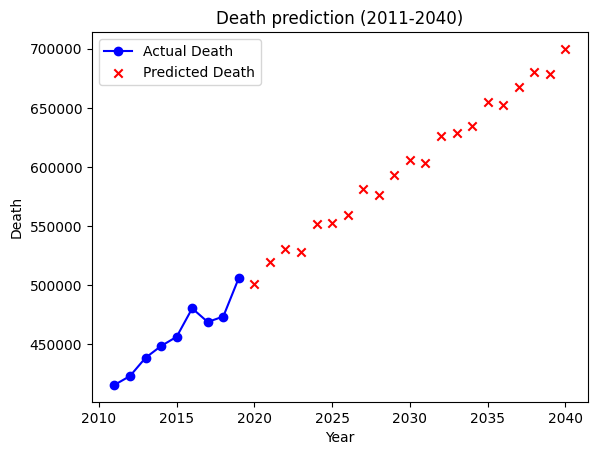

R^2 value: 0.9037
Mean Absolute Error: 5542.25 this indicates that, on average, the model's predictions deviate by approximately 1.2% points from the actual values which is relatively small.
Mean Squared Error: 0.11% this suggests that, on average, the model's predictions are relatively close to the actual values
Root Mean Squared Error: 7316.242837003157 this suggests that, on average, the model's predictions deviate by approximately 0.91% percentage points from the actual values which is generally considered low and indicates that the model's predictions are relatively accurate.


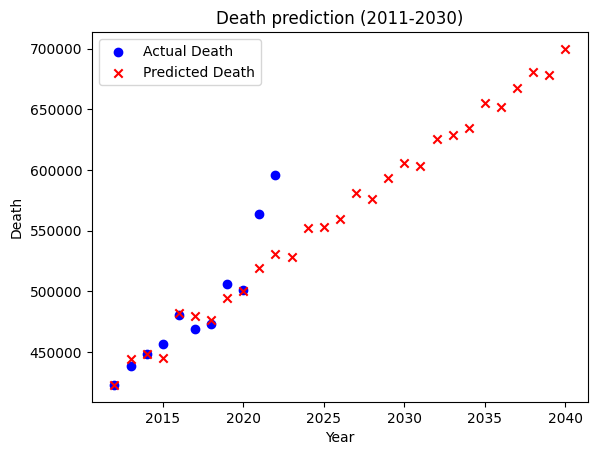

   Years Time(t)  Actual Simulation
0   2011       0  415685        0.0
1   2012       1  423213   422933.0
2   2013       2  438648   444453.0
3   2014       3  448601   448657.0
4   2015       4  456391   445513.0
5   2016       5  480434   481816.0
6   2017       6  468911   480024.0
7   2018       7  473541   476435.0
8   2019       8  506211   494281.0
9   2020       9  501438   500638.0
10  2021      10  563650   519470.0
11  2022      11  595965   530766.0
12  2023      12     NaN   528171.0
13  2024      13     NaN   552142.0
14  2025      14     NaN   552973.0
15  2026      15     NaN   559796.0
16  2027      16     NaN   580981.0
17  2028      17     NaN   576440.0
18  2029      18     NaN   593412.0
19  2030      19     NaN   605815.0
20  2031      20     NaN   603477.0
21  2032      21     NaN   625992.0
22  2033      22     NaN   628568.0
23  2034      23     NaN   634387.0
24  2035      24     NaN   655235.0
25  2036      25     NaN   652125.0
26  2037      26     NaN   6

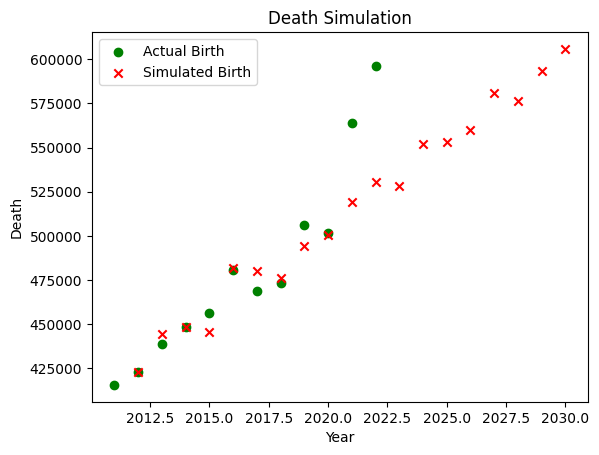

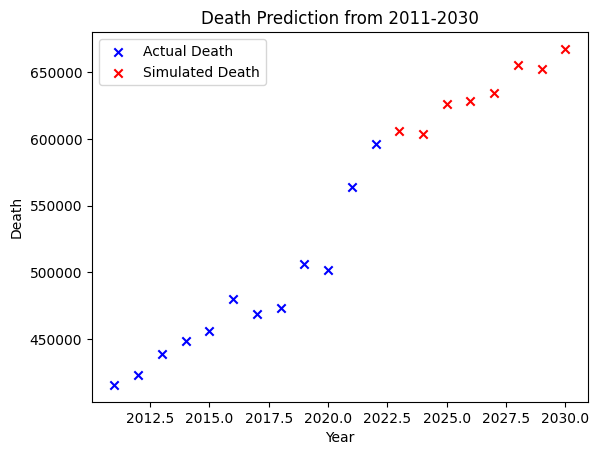

[415685, 423213, 438648, 448601, 456391, 480434, 468911, 473541, 506211, 501438, 563650, 595965, 605815.0, 603477.0, 625992.0, 628568.0, 634387.0, 655235.0, 652125.0, 667432.0]
UQ = 8.81567489%


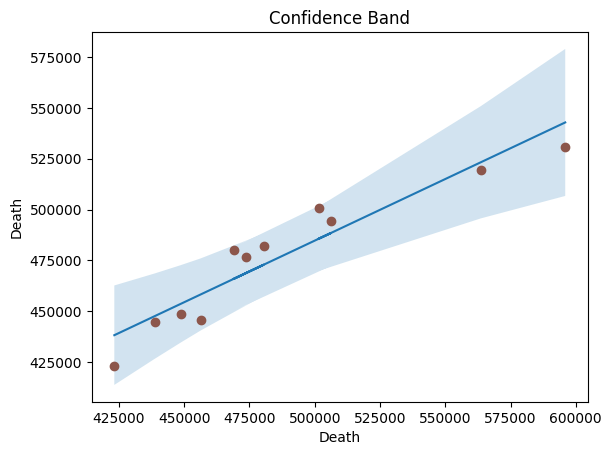

In [56]:
death_data_ = pd.Series(death_data[:-3], index=range(2011, 2020))
# Define the ARIMA model (adjust order parameters as needed)
model = ARIMA(death_data_, order=(4, 1, 3))  # Example order (p, d, q)

# Fit the model to the data
model_fit = model.fit()

# Generate predictions for all years (2011-2040)
forecast = model_fit.fittedvalues  # Predictions for 2011-2019 (known data)
forecast = pd.concat([forecast, model_fit.forecast(steps=21)])  # Combine with predictions for 2020-2040

simm_years = [i for i in range(2011,2041)]
# Plot the actual data and predictions
plt.plot(death_data_.index, death_data_, marker='o', c='blue', label='Actual Death')
plt.scatter(simm_years[-21:], forecast[-21:], marker='x', c='red', label='Predicted Death')

# Add title and legend
plt.title('Death prediction (2011-2040)')
plt.xlabel('Year')
plt.ylabel('Death')
plt.legend()
# plt.ylim(300000, 700000)
plt.show()

# print(forecast)
dr_pred = np.round(forecast.tolist())
# Calculate the mean of both lists
mean_death = np.mean(death_data[1:9])
mean_dr_pred = np.mean(dr_pred[1:9])


# Calculate the squared deviations from the mean for both lists
squared_deviations_death = [(x - mean_death)**2 for x in death_data[1:9]]
squared_deviations_dr_pred = [(y - mean_dr_pred)**2 for y in dr_pred[1:9]]

# Calculate the total squared deviations for both lists
total_squared_deviations_death = np.sum(squared_deviations_death)
total_squared_deviations_dr_pred = np.sum(squared_deviations_dr_pred)

# Calculate the explained variance
explained_variance = np.sum([(death_data[i] - mean_death) * (dr_pred[i] - mean_dr_pred) for i in range(1,9)])

# Calculate the r^2 value
r_squared = explained_variance / total_squared_deviations_death

MSE = metrics.mean_squared_error(death_data[1:9], dr_pred[1:9])

rmse = np.sqrt(metrics.mean_squared_error(death_data[1:9], dr_pred[1:9]))
target_range = np.max(death_data[1:9]) - np.min(death_data[1:9])
percentage_accuracy = round((1.0 - (rmse / target_range)),2)

print(f"R^2 value: {r_squared:.4f}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(death_data[1:9], dr_pred[1:9])} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(death_data[1:9], dr_pred[1:9])/np.mean(death_data[1:9])*100,2)}% points from the actual values which is relatively small.")
print(f"Mean Squared Error: {round((np.sqrt(((MSE)/np.mean(death_data[1:9])))/100),2)}% this suggests that, on average, the model\'s predictions are relatively close to the actual values")
print(f"Root Mean Squared Error: {rmse} this suggests that, on average, the model\'s predictions deviate by approximately {percentage_accuracy}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate.")

time = [i for i in range(2011,2023)]

plt.scatter(time[1:], death_data[1:], marker='o', c='blue', label='Actual Death')
plt.scatter(simm_years[1:], dr_pred[1:], marker='x', c='red', label='Predicted Death')

plt.title('Death prediction (2011-2030)')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Death')
# plt.ylim(300000, 700000)
plt.show()

sim_death_data = dr_pred
TS_sim_columns=['Years','Time(t)','Actual','Simulation']
TS_sim_rows=[i for i in range(30)]
TS_death_data_sim_df = pd.DataFrame(index=TS_sim_rows,columns=TS_sim_columns)

for TS in range(30):
    TS_death_data_sim_df.iloc[TS,0]=simm_years[TS]
    TS_death_data_sim_df.iloc[TS,1]=TS
    if TS < len(pop_data):
        TS_death_data_sim_df.iloc[TS,2]=death_data[TS]
    TS_death_data_sim_df.iloc[TS,3]= np.round(dr_pred[TS],3)

print(TS_death_data_sim_df)

#Uncertainties Quantification for Linear Regression Model
summation=0
U_each_dr=[]
sim_dr_compare=sim_death_data
for diffsq in range(1,9):
    U_each_dr.append(np.sqrt((sim_dr_compare[diffsq]-(death_data[diffsq]))**2))
    summation=summation+(sim_dr_compare[diffsq]-np.mean(death_data[1:9]))**2
# print(abs(np.mean(sim_pop_polyreg_compare)-np.mean(pop_data))/np.mean(pop_data)*100)
# U3=np.sqrt(summation/(12*11))
U_dr=(abs(np.mean(sim_dr_compare[1:9])-np.mean(death_data[1:9]))/np.mean(death_data[1:9])*100)
print(f'Uncertainties Quantification shows a {"{:.4f}".format(U_dr)}% lower and upper solution of uncertainties for the Time Series Analysis model.')

# time = [i for i in range(2011,2020)]
# # Plot the actual and simulated data
# plt.scatter(time[1:], death_data[1:9], label='Actual Death', color='blue')
# plt.plot(time[1:], sim_dr_compare[1:9], label='Simulated Death', color='red')

# sim_1d = sim_dr_compare[1:9]
# U_each_1d = np.array(U_each_dr)


# # Add shaded regions for uncertainties
# plt.fill_between(time[1:], sim_1d- U_each_1d, sim_1d + U_each_1d, color='grey', alpha=0.2, label='Uncertainties')

# plt.xlabel('Year')
# plt.ylabel('Death')
# plt.ylim(200000, 800000)
# plt.title('Uncertainty quantification for Death TS model')
# plt.legend()
# plt.show()

sim_years=[sy for sy in range(2011,2031)]
act_years=[i for i in range(2011,2023)]

# Initialize the plot
fig, ax = plt.subplots()

# Initialize the plot with the first frame
scatter = ax.scatter(act_years, death_data, color='green', marker='o', label='Actual Birth')
scatter2 = ax.scatter(sim_years[1:], sim_death_data[1:20], color='red',marker='x', label='Simulated Birth')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Death')
ax.set_title('Death Simulation')
ax.legend()

def update(frame):
    # Combine x and y coordinates into a single 2D array for each scatter plot
    scatter_offsets = np.c_[act_years[:frame+1], death_data[:frame+1]]  # Concatenate x and y values
    scatter2_offsets = np.c_[sim_years[1:frame+1], sim_death_data[1:frame+1]]

    # Update the offsets using the combined arrays
    scatter.set_offsets(scatter_offsets)
    scatter2.set_offsets(scatter2_offsets)

    return scatter, scatter2

# Create the animation
animation = FuncAnimation(fig, update, frames=len(sim_years), interval=200, blit=True)

# Save the animation as a GIF file
animation.save('TS_death_data_sim.gif', writer=PillowWriter(fps=5))

# Display the plot
plt.show()

death_data_time=[i for i in range(2011,2031)]
plt.scatter(death_data_time[:12], death_data, marker='x', label='Actual Death', color='blue')
plt.scatter(death_data_time[12:], dr_pred[19:-3], marker='x', label='Simulated Death', color='red')
plt.xlabel('Year')
plt.ylabel('Death')
# plt.ylim(300000, 900000)
plt.title('Death Prediction from 2011-2030')
plt.legend()
plt.show()

dfs = death_data + (dr_pred[19:-3]).tolist()
print(dfs)

# N = 12
x = np.array(death_data[1:])
y = sim_death_data[1:len(death_data)]

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +(x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.set_ylabel('Death')
ax.set_xlabel('Death')
# ax.set_xticklabels([i for i in range(2011,2023)])
ax.set_title("Confidence Band")
ax.plot(x, y, 'o', color='tab:brown')

U__ = np.sqrt(sum((sim_dr_compare[1:len(death_data)-2]-np.mean(death_data[1:-2]))**2)/(len(death_data[1:-2])*(len(death_rate[1:-2])-1)))
print(f"UQ = {round(U__,5)/100000*100}%")

**MIGRATION DATA ANALYSIS**

[-1.94055543 -1.46128151 -1.11474556 -1.33394145 -1.60305455 -1.94963227
 -2.38692587 -2.96939056 -2.98560337 -3.00194358 -3.03501205 -3.05174331] -1.1915031165962977


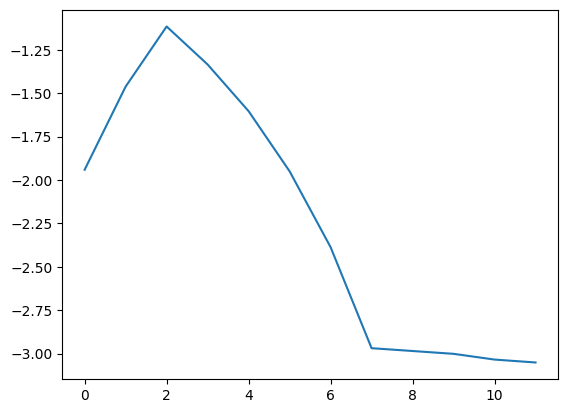

In [57]:
from scipy.stats import boxcox

# Load your data (e.g., as a pandas DataFrame)
data = migration_rate

# Perform Box-Cox transformation
transformed_data, lambda_value = boxcox(data)
print(transformed_data,lambda_value)
plt.plot(transformed_data)
# migration_rate = transformed_data

Gamma Distribution Parameters:
- Shape: 0.37336781002357544
- Location: 0.27599999999999997
- Scale: 0.07077101163589976

Descriptive Statistics:
- Mean: 0.30242361762764886
- Median: 0.28481984578566627
- Mode: 0.23165260599174908
- Expectation: 0.30242361762764886
- Variance: 0.001870026150588904
- Standard Deviation: 0.04324379898423477
- Skewness: 3.273117223660228
- Kurtosis: 16.069944539731864


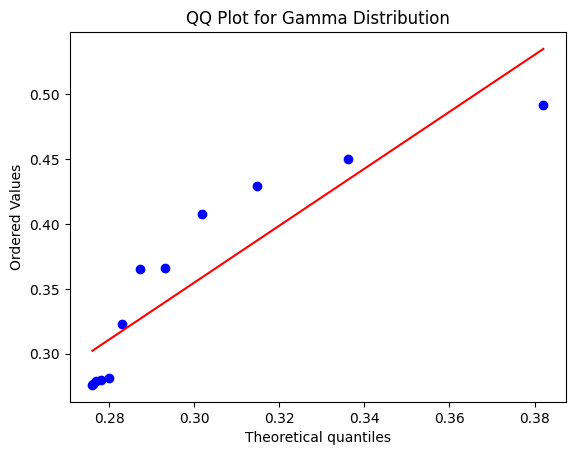

In [58]:
# Fit a Gamma distribution to the data
shape, loc, scale = stats.gamma.fit(migration_rate)

# Calculate descriptive statistics
mean = shape * scale + loc
gamma_expected = mean
median = stats.gamma.median(shape, loc=loc, scale=scale)
mode = (shape - 1) * scale + loc  # Mode exists only for shape > 1
expectation = mean  # Equivalent to mean for continuous distributions
variance = shape * scale**2
sd = np.sqrt(variance)
skewness = 2 / np.sqrt(shape)
kurtosis = 6 / shape

# Print the results
print("Gamma Distribution Parameters:")
print("- Shape:", shape)
print("- Location:", loc)
print("- Scale:", scale)
print("\nDescriptive Statistics:")
print("- Mean:", mean)
print("- Median:", median)
print("- Mode:", mode)
print("- Expectation:", expectation)
print("- Variance:", variance)
print("- Standard Deviation:", sd)
print("- Skewness:", skewness)
print("- Kurtosis:", kurtosis)

# Create a QQ plot to assess the fit of the Gamma distribution
fig, ax = plt.subplots()
stats.probplot(migration_rate, dist="gamma", sparams=(shape, loc, scale), plot=ax)
ax.set_title("QQ Plot for Gamma Distribution")
plt.show()

gamma expected 0.3358185990388477
Gamma Distribution Parameters:
- Shape: 47.32334635251581
- Location: -7.181643562705981
- Scale: 0.10440738855888188

Descriptive Statistics:
- Mean: -2.240736552172317
- Median: -2.275495097850902
- Mode: -2.345143940731199
- Expectation: -2.240736552172317
- Variance: 0.5158671980820917
- Standard Deviation: 0.7182389561156451
- Skewness: 0.29073162258848856
- Kurtosis: 0.126787314559403


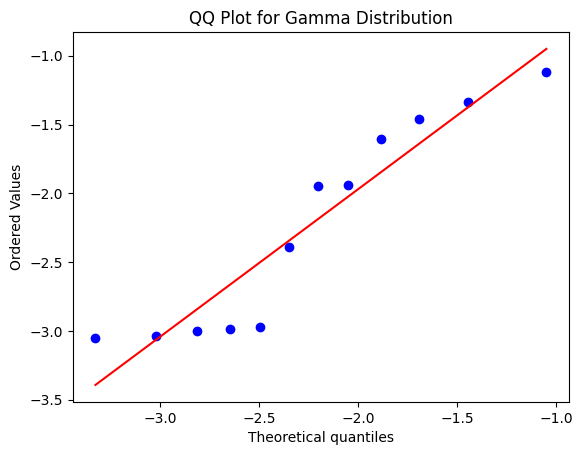

In [59]:
# Fit a Gamma distribution to the data
shape, loc, scale = stats.gamma.fit(transformed_data)

# Calculate descriptive statistics
mean = shape * scale + loc
gamma_expected2 = ((mean*lambda_value)+1)**(1/lambda_value) #abs(lambda_value)
print('gamma expected',gamma_expected2)
median = stats.gamma.median(shape, loc=loc, scale=scale)
mode = (shape - 1) * scale + loc  # Mode exists only for shape > 1
expectation = mean  # Equivalent to mean for continuous distributions
variance = shape * scale**2
sd = np.sqrt(variance)
skewness = 2 / np.sqrt(shape)
kurtosis = 6 / shape

# Print the results
print("Gamma Distribution Parameters:")
print("- Shape:", shape)
print("- Location:", loc)
print("- Scale:", scale)
print("\nDescriptive Statistics:")
print("- Mean:", mean)
print("- Median:", median)
print("- Mode:", mode)
print("- Expectation:", expectation)
print("- Variance:", variance)
print("- Standard Deviation:", sd)
print("- Skewness:", skewness)
print("- Kurtosis:", kurtosis)

# Create a QQ plot to assess the fit of the Gamma distribution
fig, ax = plt.subplots()
stats.probplot(transformed_data, dist="gamma", sparams=(shape, loc, scale), plot=ax)
ax.set_title("QQ Plot for Gamma Distribution")
plt.show()

Negative Binomial Distribution Parameters:
- r: 1.0
- p: 0.5

Descriptive Statistics:
- Mean: 2.0
- Median: 0.0
- Mode: 0.0
- Expectation: 2.0
- Variance: 4.0
- Standard Deviation: 2.0
- Skewness: 2.0
- Kurtosis: 6.0


c:\Users\Lossarin Sathitsethi\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


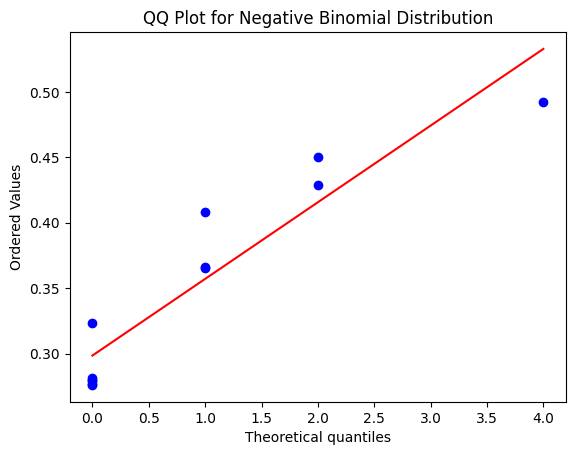

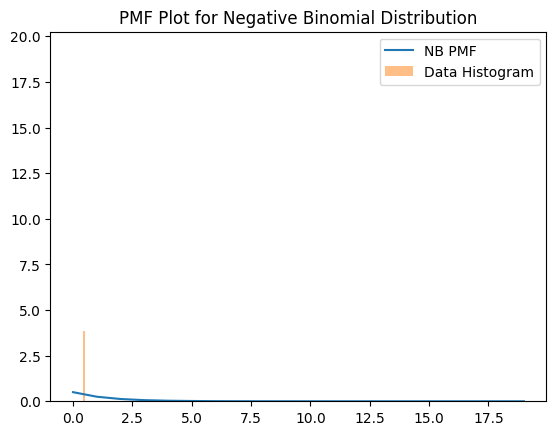

In [60]:
import numpy as np
from scipy.stats import nbinom
from scipy.optimize import minimize


# Define a negative binomial likelihood function
def nbinom_likelihood(params, data):
    r, p = params
    return -np.sum(stats.nbinom.logpmf(data, r, p))

# Use optimization to find the best-fitting parameters
results = minimize(nbinom_likelihood, [1, 0.5], args=(migration_rate,))
r, p = results.x

# Calculate descriptive statistics
mean = r / (1-p)
median = nbinom.median(r, p)
mode = (r-1) / p
expectation = mean
variance = r / (1-p)**2
sd = np.sqrt(variance)
skewness = 2 / np.sqrt(r)
kurtosis = 6 / r

# Print the results
print("Negative Binomial Distribution Parameters:")
print("- r:", r)
print("- p:", p)
print("\nDescriptive Statistics:")
print("- Mean:", mean)
print("- Median:", median)
print("- Mode:", mode)
print("- Expectation:", expectation)
print("- Variance:", variance)
print("- Standard Deviation:", sd)
print("- Skewness:", skewness)
print("- Kurtosis:", kurtosis)

# Create visualizations
# Create a QQ plot to assess the fit of the Negative Binomial distribution
fig, ax = plt.subplots()
stats.probplot(migration_rate, dist="nbinom", sparams=(r, p), plot=ax)
ax.set_title("QQ Plot for Negative Binomial Distribution")
plt.show()

# Create a PMF plot to visualize the distribution shape
fig, ax = plt.subplots()
x = np.arange(0, 20)  # Range of possible count values (adjust as needed)
pmf = nbinom.pmf(x, r, p)  # Calculate PMF values
ax.plot(x, pmf, label="NB PMF")
ax.hist(migration_rate, density=True, bins=10, alpha=0.5, label="Data Histogram")
ax.set_title("PMF Plot for Negative Binomial Distribution")
ax.legend()
plt.show()

Log-normal Distribution Parameters:
- s: 7.191921523714626
- loc: 0.27599999999999997
- scale: 0.014154028583708898

Descriptive Statistics:
- Mean: 2412939647.267346
- Median: 0.014154028583708895
- Mode: 4.870205492210533e-25
- Variance: 1.6920987359821166e+41
- Standard Deviation: 4.113512776183048e+20
- Skewness: 4.954492477014843e+33
- Kurtosis: 7.133967538034485e+89


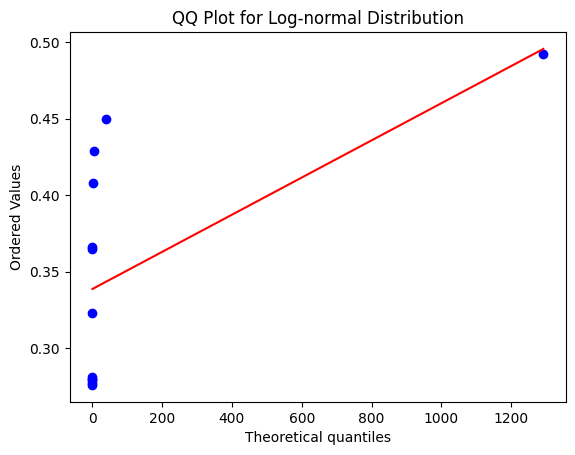

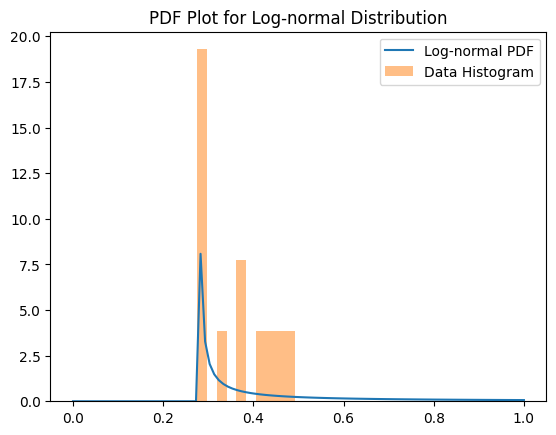

In [61]:
import numpy as np
from scipy.stats import lognorm

# Fit a Log-normal distribution to the data
s, loc, scale = lognorm.fit(migration_rate)

# Calculate descriptive statistics
mu = np.log(scale)
sigma = s
mean = np.exp(mu + sigma**2 / 2)
median = np.exp(mu)
mode = np.exp(mu - sigma**2)
variance = (np.exp(sigma**2) - 1) * np.exp(2*mu + sigma**2)
sd = np.sqrt(variance)
skewness = (np.exp(sigma**2) + 2) * np.sqrt(np.exp(sigma**2) - 1)
kurtosis = np.exp(4*sigma**2) + 2*np.exp(3*sigma**2) + 3*np.exp(2*sigma**2) - 6

# Print the results
print("Log-normal Distribution Parameters:")
print("- s:", s)
print("- loc:", loc)
print("- scale:", scale)
print("\nDescriptive Statistics:")
print("- Mean:", mean)
print("- Median:", median)
print("- Mode:", mode)
print("- Variance:", variance)
print("- Standard Deviation:", sd)
print("- Skewness:", skewness)
print("- Kurtosis:", kurtosis)

# Create visualizations
import matplotlib.pyplot as plt

# Create a QQ plot to assess the fit of the Log-normal distribution
fig, ax = plt.subplots()
stats.probplot(migration_rate, dist="lognorm", sparams=(s, loc, scale), plot=ax)
ax.set_title("QQ Plot for Log-normal Distribution")
plt.show()

# Create a PDF plot to visualize the distribution shape
fig, ax = plt.subplots()
x = np.linspace(0, 1, 100)  # Adjust range as needed
pdf = lognorm.pdf(x, s, loc=loc, scale=scale)
ax.plot(x, pdf, label="Log-normal PDF")
ax.hist(migration_rate, density=True, bins=10, alpha=0.5, label="Data Histogram")
ax.set_title("PDF Plot for Log-normal Distribution")
ax.legend()
plt.show()



[1.869, 1.635, 1.4, 1.165, 0.968, 0.77, 0.573, 0.375, 0.178, 0.241, 0.304, 0.366, 0.429, 0.492, 0.45, 0.408, 0.365, 0.323, 0.281, 0.28, 0.279, 0.277, 0.276]


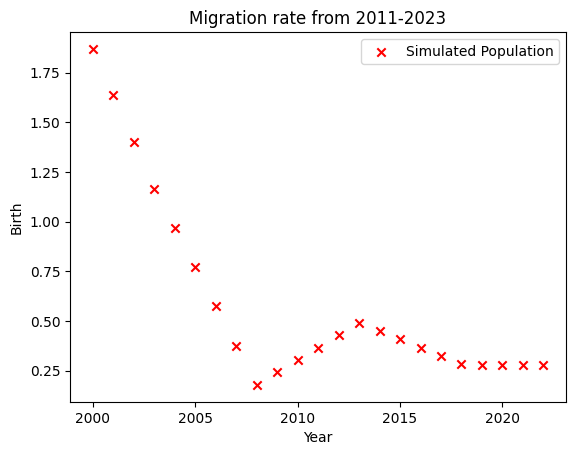

In [62]:
mr_2000 = [1.869,1.635,1.400,1.165,0.968,0.770,0.573,0.375,0.178,0.241,0.304]
fin_mr=mr_2000+migration_rate
print(fin_mr)
# plt.scatter(years, pop_data, marker='x', label='Actual Population', color='blue')
plt.scatter([i for i in range(2000,2023)], fin_mr, marker='x', label='Simulated Population', color='red')
plt.xlabel('Year')
plt.ylabel('Birth')
# plt.ylim(0, 0.)
plt.title('Migration rate from 2011-2023')
plt.legend()
plt.show()

**POPULATION SIMULATION**

In [63]:
# P_0 = pop_data[0]

# # dP_dt = (B-D)*P
# # P_t = P_0*np.exp((B-D)*t)

# def Pt(t):
#     print('np.exp((bfs[t]-dfs[t])*t):',np.exp((bfs[t]-dfs[t])*t))
#     print('(bfs[t]-dfs[t]):',(bfs[t]/-dfs[t])/1000000)
#     population_simulation = P_0*np.exp((bfs[t]-dfs[t])/1000000*t)
#     print(population_simulation)
#     return population_simulation

# for i in range(2):
#     print(('i:',i))
#     print('P_0:',P_0)
#     print('(bfs[i]:',(bfs[i]))
#     print('(dfs[i]:',(dfs[i]))
#     Pt(i)

In [64]:
expected_migrated = gamma_expected2/100*0.55
# print(expected_migrated*100)
val = 0
prev_P = pop_data[0]*1000000
P_t_sim = []

for i in range(1,20):
    # print(expected_migrated* prev_P)
    val = prev_P + bfs[i]-dfs[i] + expected_migrated * prev_P
    P_t_sim.append(round(val/1000000,6))
    prev_P = val

P_t_sim

[69.235447,
 69.706806,
 70.163323,
 70.572876,
 70.926849,
 71.291695,
 71.615939,
 71.860195,
 72.078851,
 72.192901,
 72.232384,
 72.246449,
 72.247938,
 72.215493,
 72.190081,
 72.149757,
 72.075257,
 72.012355,
 71.930353]

In [65]:
# expected_migrated = gamma_expected/1000*5.5
# # print(expected_migrated*100)
# val = 0
# prev_P = pop_data[0]*1000000
# P_t_sim = []

# for i in range(1,20):
#     # print(expected_migrated* prev_P)
#     val = prev_P + bfs[i]-dfs[i] + expected_migrated * prev_P
#     P_t_sim.append(round(val/1000000,6))
#     prev_P = val

# P_t_sim

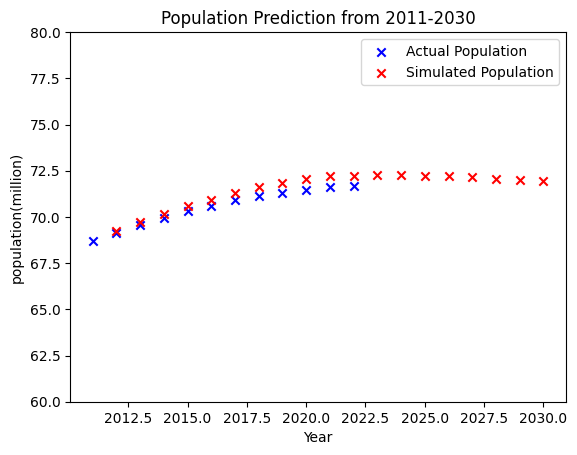

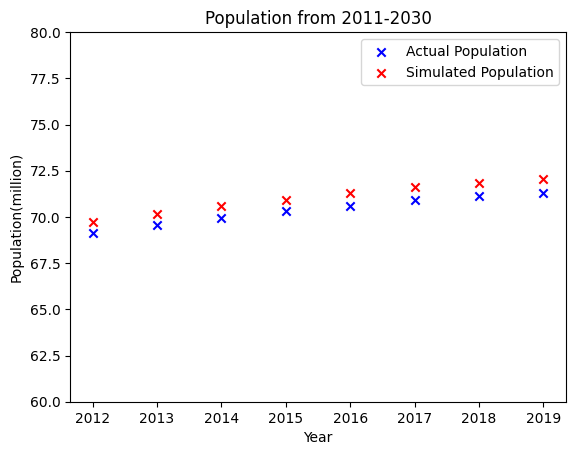

In [66]:
simm_years = [i for i in range(2012,2031)]
years = [i for i in range(2011,2023)]
plt.scatter(years, pop_data, marker='x', label='Actual Population', color='blue')
plt.scatter(simm_years, P_t_sim, marker='x', label='Simulated Population', color='red')
plt.xlabel('Year')
plt.ylabel('population(million)')
plt.ylim(60, 80)
plt.title('Population Prediction from 2011-2030')
plt.legend()
plt.show()

yearss = [i for i in range(2012,2020)]
plt.scatter(yearss, pop_data[1:-3], marker='x', label='Actual Population', color='blue')
plt.scatter(yearss, P_t_sim[1:9], marker='x', label='Simulated Population', color='red')
plt.xlabel('Year')
plt.ylabel('Population(million)')
plt.ylim(60, 80)
plt.title('Population from 2011-2030')
plt.legend()
plt.show()



In [67]:
P_t_sim_fin = [pop_data[0]]
for i in range(len(P_t_sim)):
    P_t_sim_fin.append(P_t_sim[i])
P_t_sim_fin

[68.712846,
 69.235447,
 69.706806,
 70.163323,
 70.572876,
 70.926849,
 71.291695,
 71.615939,
 71.860195,
 72.078851,
 72.192901,
 72.232384,
 72.246449,
 72.247938,
 72.215493,
 72.190081,
 72.149757,
 72.075257,
 72.012355,
 71.930353]

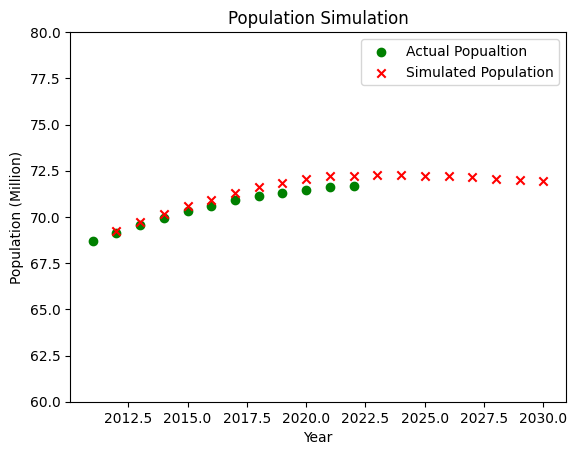

In [68]:
sim_years=[sy for sy in range(2011,2031)]
act_years=[i for i in range(2011,2023)]

# Initialize the plot
fig, ax = plt.subplots()

# Initialize the plot with the first frame
scatter = ax.scatter(act_years, pop_data, color='green', marker='o', label='Actual Popualtion')
scatter2 = ax.scatter(sim_years[1:], P_t_sim_fin[1:], color='red',marker='x', label='Simulated Population')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Population (Million)')
ax.set_title('Population Simulation')
ax.legend()

def update(frame):
    # Combine x and y coordinates into a single 2D array for each scatter plot
    scatter_offsets = np.c_[act_years[:frame+1], pop_data[:frame+1]]  # Concatenate x and y values
    scatter2_offsets = np.c_[sim_years[1:frame+1], P_t_sim_fin[1:frame+1]]

    # Update the offsets using the combined arrays
    scatter.set_offsets(scatter_offsets)
    scatter2.set_offsets(scatter2_offsets)

    return scatter, scatter2

# Create the animation
animation = FuncAnimation(fig, update, frames=len(sim_years), interval=200, blit=True)
plt.ylim(60, 80)
# Save the animation as a GIF file
animation.save('pop_data_sim.gif', writer=PillowWriter(fps=5))

# Display the plot
plt.show()


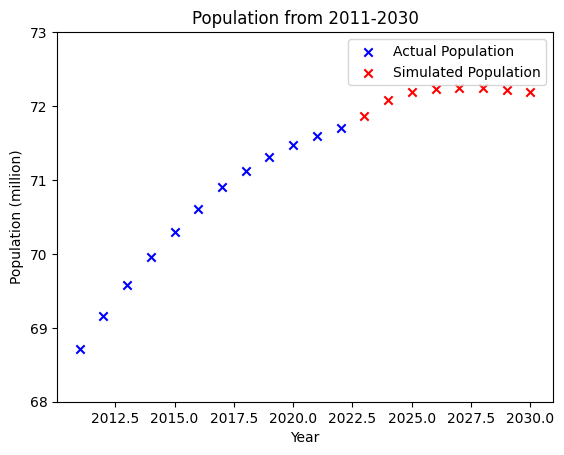

[68.712846, 69.157023, 69.578602, 69.960943, 70.294397, 70.607037, 70.898202, 71.127802, 71.307763, 71.475664, 71.601103, 71.69703, 71.860195, 72.078851, 72.192901, 72.232384, 72.246449, 72.247938, 72.215493, 72.190081]


In [69]:
time = [i for i in range(2011,2031)]
fin_pop_sim = pop_data + P_t_sim[7:-4]
plt.scatter(time[:12], pop_data, marker='x', label='Actual Population', color='blue')
plt.scatter(time[12:], P_t_sim[7:-4], marker='x', label='Simulated Population', color='red')
plt.xlabel('Year')
plt.ylabel('Population (million)')
plt.ylim(68, 73)
plt.title('Population from 2011-2030')
plt.legend()
plt.show()
print(fin_pop_sim)

12 12 12 12
UQ = 0.36002%


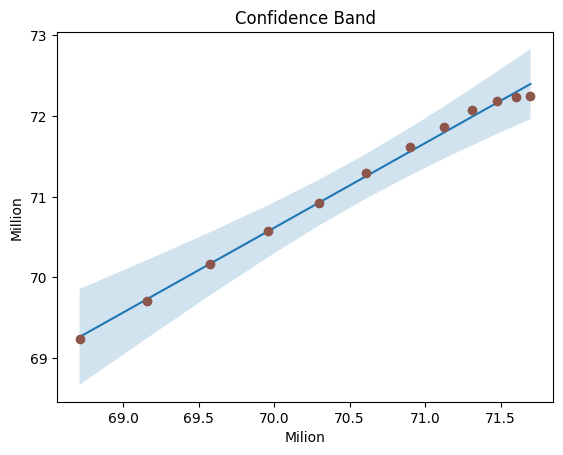

In [70]:
# N = 12
x = np.array(pop_data[:])
y = P_t_sim[:12]

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +(x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.set_ylabel('Million')
ax.set_xlabel('Milion')
# ax.set_xticklabels([i for i in range(2011,2023)])
ax.set_title("Confidence Band")
ax.plot(x, y, 'o', color='tab:brown')

print(len(x),len(y),len(y_est),len(y_err))

U__ = np.sqrt(sum((P_t_sim[:12]-np.mean(pop_data[:]))**2)/(len(pop_data[:])*(len(pop_data[:])-1)))
print(f"UQ = {round(U__,5)/100*100}%")

In [71]:
# listt = [0.65]
# for i in range(1,len(fin_pop_sim)):
#     vvall = (fin_pop_sim[i]-fin_pop_sim[i-1])/fin_pop_sim[i-1]*100
#     listt.append(vvall)
# listt

In [72]:
a_new_list = [68.712846,
 69.235447,
 69.706806,
 69.935064,
 70.163323,
 70.572876,
 70.926849,
 71.109272,
 71.291695,
 71.453817,
 71.615939,
 71.738067,
 71.860195,
 72.078851,
 72.192901,
 72.232384,
 72.246449,
 72.247938,
 72.215493,
 72.190081]

listt = [0.65]
for i in range(1,len(a_new_list)):
    vvall = (a_new_list[i]-a_new_list[i-1])/a_new_list[i-1]*100
    listt.append(vvall)
listt

[0.65,
 0.760557931190908,
 0.680805888347925,
 0.3274543951992245,
 0.32638706100277315,
 0.5837138015826135,
 0.5015708868092759,
 0.2571987936472407,
 0.25653897848933116,
 0.22740657239247367,
 0.226890608237201,
 0.17053187000732276,
 0.1702415539019243,
 0.30427971980871427,
 0.1582294923097567,
 0.05469097300853715,
 0.01947187566175611,
 0.0020610009496889086,
 -0.04490785605536565,
 -0.03518912485993645]

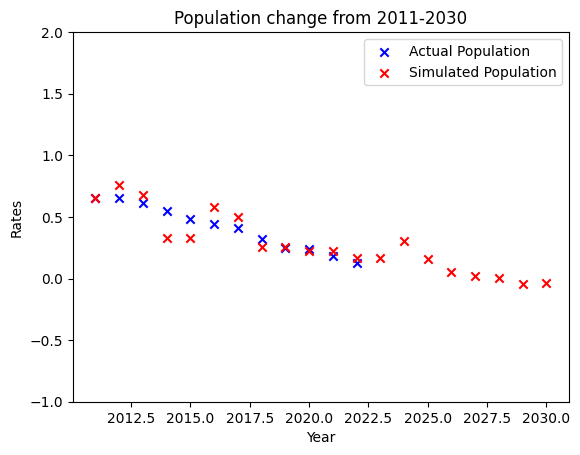

[0.65, 0.65, 0.61, 0.55, 0.48, 0.44, 0.41, 0.32, 0.25, 0.24, 0.18, 0.13]
[ 0.65  0.76  0.68  0.33  0.33  0.58  0.5   0.26  0.26  0.23  0.23  0.17
  0.17  0.3   0.16  0.05  0.02  0.   -0.04 -0.04]
8 8


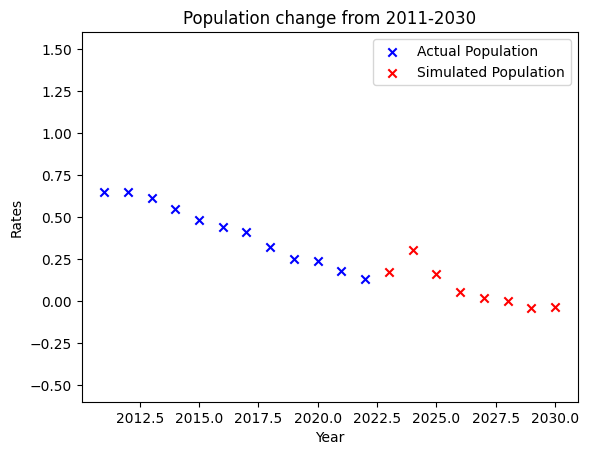

[0.65, 0.65, 0.61, 0.55, 0.48, 0.44, 0.41, 0.32, 0.25, 0.24, 0.18, 0.13]
[ 0.65  0.76  0.68  0.33  0.33  0.58  0.5   0.26  0.26  0.23  0.23  0.17
  0.17  0.3   0.16  0.05  0.02  0.   -0.04 -0.04]


In [73]:
# pop_change_rate_new = [0.65, 0.65087, 0.61809, 0.54801, 0.46950, 0.43935, 0.41251, 0.32424, 0.25395, 0.24005, 0.17826, 0.14099, 0.23250, 0.30705, 0.15881, 0.05305, 0.01922, 0.00159, -0.03296, -0.02597]
pop_change_rate_new = listt
plt.scatter(time[:12], pop_change_rate, marker='x', label='Actual Population', color='blue')
plt.scatter(time[:], pop_change_rate_new, marker='x', label='Simulated Population', color='red')
# plt.scatter(time, pop_change_rate_new , marker='x', label='Simulated Population', color='red')
plt.xlabel('Year')
plt.ylabel('Rates')
plt.ylim(-1, 2)
plt.title('Population change from 2011-2030')
plt.legend()
plt.show()
print(pop_change_rate)
print(np.round(pop_change_rate_new,2))

print(len(time[12:]),len(pop_change_rate_new[12:]))
# pop_change_rate_new = [0.65, 0.65087, 0.61809, 0.54801, 0.46950, 0.43935, 0.41251, 0.32424, 0.25395, 0.24005, 0.17826, 0.14099, 0.23250, 0.30705, 0.15881, 0.05305, 0.01922, 0.00159, -0.03296, -0.02597]
pop_change_rate_new = listt
plt.scatter(time[:12], pop_change_rate, marker='x', label='Actual Population', color='blue')
plt.scatter(time[12:], pop_change_rate_new[12:], marker='x', label='Simulated Population', color='red')
# plt.scatter(time, pop_change_rate_new , marker='x', label='Simulated Population', color='red')
plt.xlabel('Year')
plt.ylabel('Rates')
plt.ylim(-0.6, 1.6)
plt.title('Population change from 2011-2030')
plt.legend()
plt.show()
print(pop_change_rate)
print(np.round(pop_change_rate_new,2))

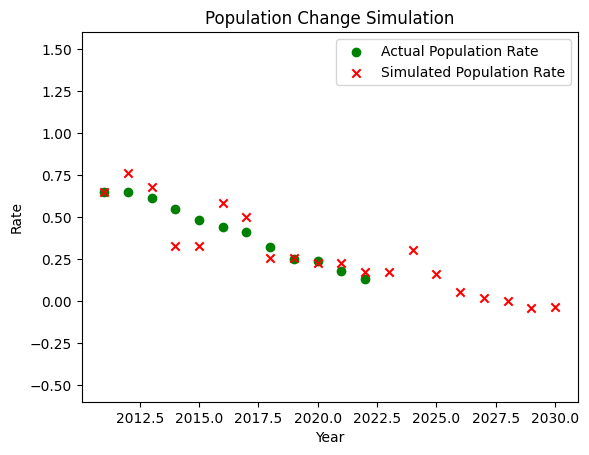

In [74]:
sim_years=[sy for sy in range(2011,2031)]
act_years=[i for i in range(2011,2023)]

# Initialize the plot
fig, ax = plt.subplots()


# Initialize the plot with the first frame
scatter = ax.scatter(act_years, pop_change_rate, color='green', marker='o', label='Actual Population Rate')
scatter2 = ax.scatter(sim_years, pop_change_rate_new, color='red',marker='x', label='Simulated Population Rate')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Rate')
ax.set_title('Population Change Simulation')
ax.legend()

def update(frame):
    # Combine x and y coordinates into a single 2D array for each scatter plot
    scatter_offsets = np.c_[act_years[:frame+1], pop_change_rate[:frame+1]]  # Concatenate x and y values
    scatter2_offsets = np.c_[sim_years[:frame+1], pop_change_rate_new[:frame+1]]

    # Update the offsets using the combined arrays
    scatter.set_offsets(scatter_offsets)
    scatter2.set_offsets(scatter2_offsets)

    return scatter, scatter2

# Create the animation
animation = FuncAnimation(fig, update, frames=len(sim_years), interval=200, blit=True)
plt.ylim(-0.6, 1.6)
# Save the animation as a GIF file
animation.save('pop_rate_sim.gif', writer=PillowWriter(fps=5))

# Display the plot
plt.show()

12 12 12 12
UQ = 0.06014%


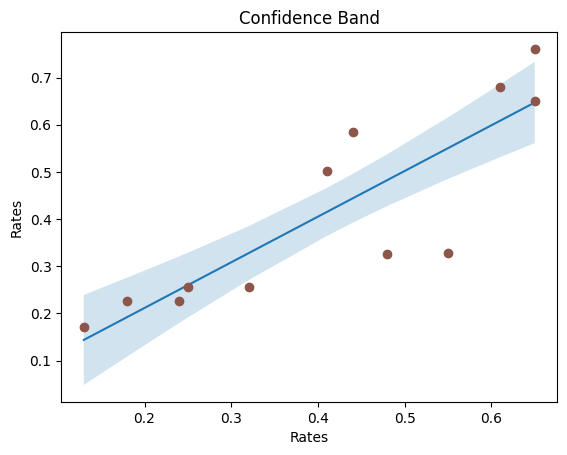

In [75]:
# N = 12
x = np.array(pop_change_rate[:])
y = pop_change_rate_new[:12]

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +(x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.set_ylabel('Rates')
ax.set_xlabel('Rates')
# ax.set_xticklabels([i for i in range(2011,2023)])
ax.set_title("Confidence Band")
ax.plot(x, y, 'o', color='tab:brown')

print(len(x),len(y),len(y_est),len(y_err))

U__ = np.sqrt(sum((pop_change_rate_new[:12]-np.mean(pop_change_rate))**2)/(len(pop_change_rate)*(len(pop_change_rate)-1)))
print(f"UQ = {round(U__,5)}%")

**GDP SIMULATION**

In [76]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor

# data = pd.DataFrame({
#     "birth": birth_data[:10],
#     "death": death_data[:10],
#     "population": np.array(pop_data[:10])*1000000,
#     "divorce": div_data[:10],
#     "gdp": GDP_data[:10]
# })

# print('birth:',birth_data[:10])
# print('pop:',np.array(pop_data[:10])*1000000)
# print("divorce:", div_data[:10])
# print("gdp:", GDP_data[:10])

# features = ["birth", "population", "divorce","death"] 
# target = "gdp"

# X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, shuffle=False)
# print("X_train:",X_train)

# regressor = DecisionTreeRegressor(random_state=42)

# regressor.fit(X_train, y_train)

# y_pred = regressor.predict(X_test)

# mae = mean_absolute_error(y_test, y_pred)
# print("Mean Absolute Error:", mae)

# future_data = pd.DataFrame({
#     "birth": bfs[10:],
#     "population": np.array(fin_pop_sim[10:])*1000000,
#     "divorce": fin_div_sim[10:],
#     "death": dfs[10:]
# })

# print("Future Data:",future_data)

# future_gdp = regressor.predict(future_data[features])
# print("Predicted GDP for 2020-2030:", future_gdp)


In [77]:
# import numpy as np
# from tensorflow.contrib.keras.preprocessing.text import Tokenizer
# # import tensorflow as tf

# # Prepare data
# gdp_data = np.array(GDP_data)  # Convert to NumPy array

# # Create sequences (e.g., look_back = 12 for past 12 months)
# look_back = 12
# sequences = np.array([gdp_data[i:i + look_back] for i in range(len(gdp_data) - look_back)])
# X, y = sequences[:, :-1], sequences[:, -1]

# # Normalize data
# X_scaled = X / np.max(X)

# # Reshape for LSTM input
# X_reshaped = np.reshape(X_scaled, (X_scaled.shape[0], X_scaled.shape[1], 1))

# # Build LSTM model
# model = tf.keras.Sequential([
#     tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(look_back-1, 1)),
#     tf.keras.layers.LSTM(units=50),
#     tf.keras.layers.Dense(1)
# ])

# # Compile model
# model.compile(loss='mean_squared_error', optimizer='adam')

# # Train model
# model.fit(X_reshaped, y, epochs=100, batch_size=32, validation_split=0.2)

# # Make predictions
# future_predictions = []
# last_x = X_scaled[-1]  # Start with the last sequence
# for i in range(10):  # Predict for 10 future time steps
#     prediction = model.predict(np.array([last_x]))[0][0]
#     future_predictions.append(prediction)
#     last_x = np.append(last_x[1:], prediction)  # Update input for next prediction

# print("Predicted future GDP growth rates:", future_predictions)


In [78]:
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split

# data = pd.DataFrame({"birth": birth_data[:10],"death": death_data[:10],"population": pop_data[:10],"divorce": div_data[:10],"gdp": GDP_data[:10]})
# print('data:\n',data)

# # features = ["birth", "death", "population", "divorce"]
# features = ["birth", "population", "divorce","death"]
# features = ["population"]
# target = "gdp"

# # future_data = pd.DataFrame({"birth": bfs[10:],"death": dfs[10:],"population": fin_pop_sim[10:],"divorce": fin_div_sim[10:]})
# # future_data = pd.DataFrame({"birth": bfs[10:],"population": fin_pop_sim[10:],"divorce": fin_div_sim[10:],"death": dfs[10:]})
# future_data = pd.DataFrame({"population": fin_pop_sim[10:]})

# print('future_data:\n',future_data)

# X = data[features]
# y = data[target]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
# print("X_train:\n",X_train)
# print("X_test:\n",X_test)
# print("y_train:\n",y_train)
# print("y_test:\n",y_test)

# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# future_predictions = model.predict(future_data)

# mae = mean_absolute_error(y_test, model.predict(X_test))
# print("Mean Absolute Error:", mae)

# feature_importances = model.feature_importances_
# print("Feature Importances:", feature_importances)
# print("Predicted GDP for 2020-2030:", future_predictions)

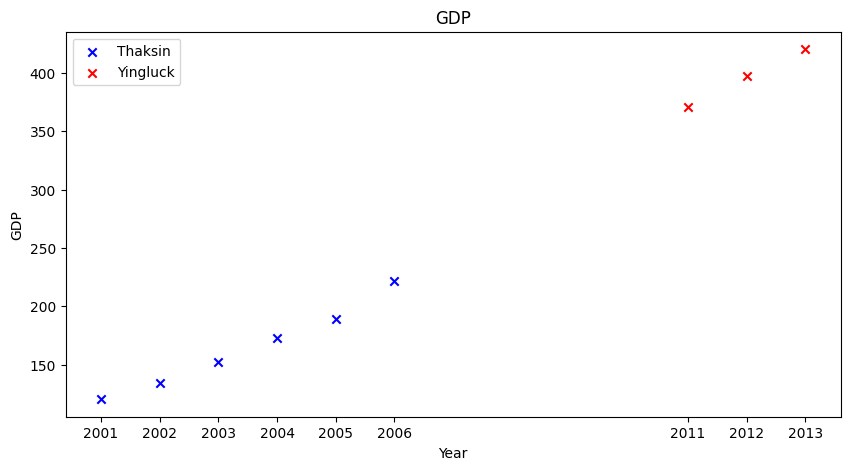

In [79]:
plt.figure(figsize=(10, 5))
taxin_years = [2001, 2002, 2003, 2004, 2005, 2006, 2011, 2012, 2013]
taxin_gdp = [120.30, 134.30, 152.28, 172.90, 189.32, 221.76, 370.82, 397.56, 420.33]

plt.scatter(taxin_years[:6], taxin_gdp[:6], marker='x', label='Thaksin', color='blue')
plt.scatter(taxin_years[6:], taxin_gdp[6:], marker='x', label='Yingluck', color='red')

# Set the x-axis ticks explicitly to the desired years
plt.xticks(taxin_years)

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP')
plt.legend()
plt.show()


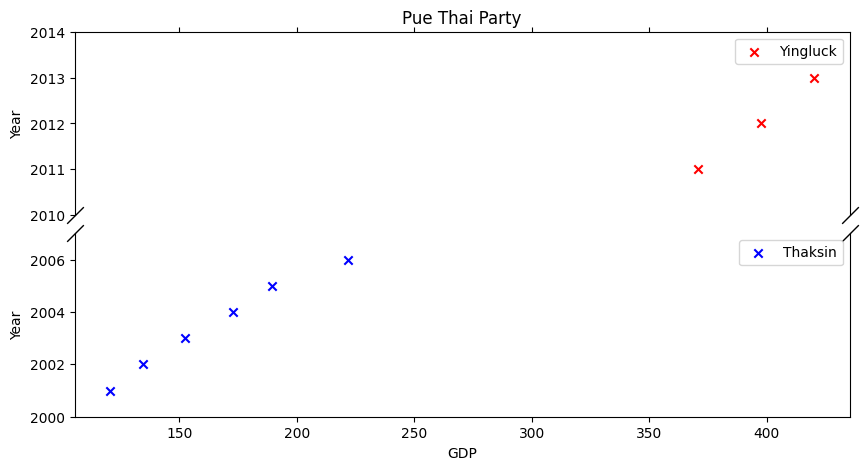

In [80]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,5))
fig.subplots_adjust(hspace=0.1) 

plt.xlabel('GDP')
plt.ylabel('Year')

ax2.scatter(taxin_gdp[:6],taxin_years[:6], marker='x', label='Thaksin', color='blue')
ax1.scatter(taxin_gdp[6:],taxin_years[6:], marker='x', label='Yingluck', color='red')

ax1.set_ylim(2010, 2014)
ax2.set_ylim(2000, 2007)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
# ax1.tick_params(labeltop=True)
ax2.xaxis.tick_bottom()
ax1.set_ylabel('Year')
ax1.set_title('Pue Thai Party')

d = 1
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.legend()
ax2.legend()

plt.show()

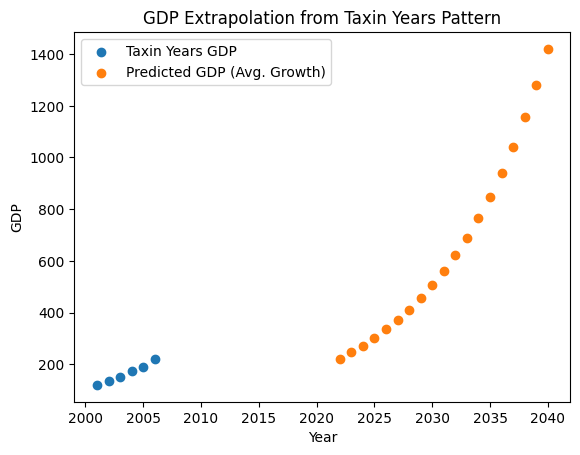

Predicted GDP for 2022-2040 (Avg. Growth):
[ 221.76        245.85724898  272.57299277  302.19176655  335.02902412
  371.43449765  411.79592249  456.54316669  506.15280936  561.15321642
  622.13016796  689.73309706  764.68200657  847.77513745  939.89747046
 1042.03015158 1155.26094166 1280.79580165 1419.97173658]


In [81]:
# Load and analyze pattern data
taxin_years = np.array([2001, 2002, 2003, 2004, 2005, 2006])
taxin_gdp = np.array([120.30, 134.30, 152.28, 172.90, 189.32, 221.76])

# Calculate growth rates
growth_rates = np.zeros_like(taxin_gdp)
for i in range(1, len(taxin_gdp)):
    growth_rates[i] = (taxin_gdp[i] - taxin_gdp[i - 1]) / taxin_gdp[i - 1]

# Analyze growth rate behavior (optional)
# Calculate average and standard deviation for insights
average_growth_rate1 = np.mean(growth_rates)
growth_rate_std = np.std(growth_rates)
# Consider visualizing growth rates for further analysis

# Extrapolate based on identified pattern
# Choose an extrapolation method based on your analysis
# Option 1: Simple average growth rate

desired_prediction_years = np.arange(2022, 2041)
predicted_gdp_avg_growth = np.zeros(len(desired_prediction_years))
predicted_gdp_avg_growth[0] = taxin_gdp[-1]  # Set starting value from last known data point
for i in range(1, len(predicted_gdp_avg_growth)):
    predicted_gdp_avg_growth[i] = predicted_gdp_avg_growth[i - 1] * (1 + average_growth_rate1)

# Option 2: Explore other methods based on identified pattern

# Visualize results
plt.scatter(taxin_years, taxin_gdp, label='Taxin Years GDP')
plt.scatter(desired_prediction_years, predicted_gdp_avg_growth, label='Predicted GDP (Avg. Growth)')
# ... Add other predictions if using alternative methods ...
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Extrapolation from Taxin Years Pattern')
plt.legend()
plt.show()

# Print predicted GDP for 2022-2030
print("Predicted GDP for 2022-2040 (Avg. Growth):")
print(predicted_gdp_avg_growth)



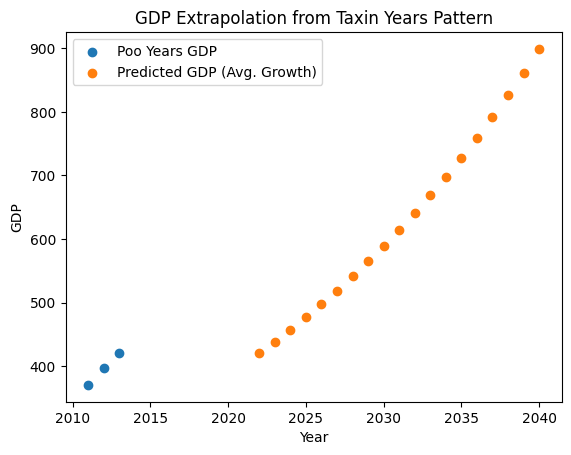

Predicted GDP for 2022-2040 (Avg. Growth):
[420.33       438.45810875 457.36805161 477.09354772 497.66977049
 519.1334103  541.52273992 564.87768276 589.23988404 614.65278509
 641.16170079 668.81390034 697.65869163 727.74750907 759.13400537
 791.87414718 826.0263149  861.65140678 898.8129475 ]


In [82]:
poo_years = [2011, 2012, 2013]
poo_gdp = [370.82, 397.56, 420.33]


# Calculate growth rates
growth_rates = np.zeros_like(poo_gdp)
for i in range(1, len(poo_gdp)):
    growth_rates[i] = (poo_gdp[i] - poo_gdp[i - 1]) / poo_gdp[i - 1]

# Analyze growth rate behavior (optional)
# Calculate average and standard deviation for insights
average_growth_rate = np.mean(growth_rates)
growth_rate_std = np.std(growth_rates)
# Consider visualizing growth rates for further analysis

# Extrapolate based on identified pattern
# Choose an extrapolation method based on your analysis
# Option 1: Simple average growth rate

desired_prediction_years = np.arange(2022, 2041)
predicted_gdp_avg_growth = np.zeros(len(desired_prediction_years))
predicted_gdp_avg_growth[0] = poo_gdp[-1]  # Set starting value from last known data point
for i in range(1, len(predicted_gdp_avg_growth)):
    predicted_gdp_avg_growth[i] = predicted_gdp_avg_growth[i - 1] * (1 + average_growth_rate)

# Option 2: Explore other methods based on identified pattern

# Visualize results
plt.scatter(poo_years, poo_gdp, label='Poo Years GDP')
plt.scatter(desired_prediction_years, predicted_gdp_avg_growth, label='Predicted GDP (Avg. Growth)')
# ... Add other predictions if using alternative methods ...
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Extrapolation from Taxin Years Pattern')
plt.legend()
plt.show()

# Print predicted GDP for 2022-2030
print("Predicted GDP for 2022-2040 (Avg. Growth):")
print(predicted_gdp_avg_growth)

final_sim = predicted_gdp_avg_growth

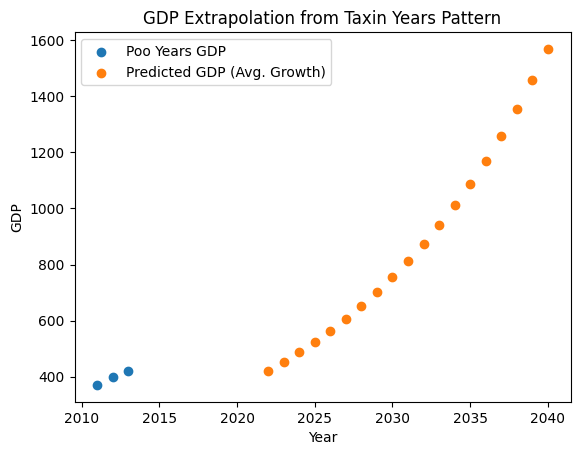

Predicted GDP for 2022-2040 (Avg. Growth):
[ 420.33        452.23134844  486.55388032  523.48135367  563.21147302
  605.95694789  651.94663156  701.42674637  754.66220195  811.93801348
  873.56082766  939.86056442 1011.19218328 1087.93758375 1170.50765
 1259.34445061 1354.92360539 1457.75683178 1568.39468451]


In [83]:
average_growth_rate2 = (average_growth_rate+average_growth_rate1)/2
growth_rate_std = np.std(growth_rates)
# Consider visualizing growth rates for further analysis

# Extrapolate based on identified pattern
# Choose an extrapolation method based on your analysis
# Option 1: Simple average growth rate

desired_prediction_years = np.arange(2022, 2041)
predicted_gdp_avg_growth = np.zeros(len(desired_prediction_years))
predicted_gdp_avg_growth[0] = poo_gdp[-1]  # Set starting value from last known data point
for i in range(1, len(predicted_gdp_avg_growth)):
    predicted_gdp_avg_growth[i] = predicted_gdp_avg_growth[i - 1] * (1 + average_growth_rate2)

# Option 2: Explore other methods based on identified pattern

# Visualize results
plt.scatter(poo_years, poo_gdp, label='Poo Years GDP')
plt.scatter(desired_prediction_years, predicted_gdp_avg_growth, label='Predicted GDP (Avg. Growth)')
# ... Add other predictions if using alternative methods ...
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Extrapolation from Taxin Years Pattern')
plt.legend()
plt.show()

# Print predicted GDP for 2022-2030
print("Predicted GDP for 2022-2040 (Avg. Growth):")
print(predicted_gdp_avg_growth)

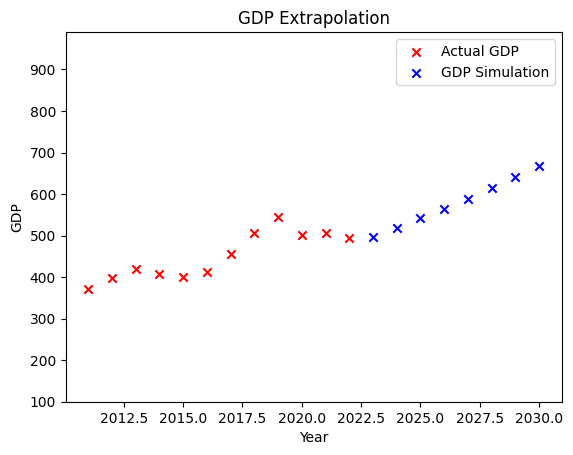

[370.82, 397.56, 420.33, 407.34, 401.3, 413.37, 456.3, 506.75, 543.98, 500.46, 505.57, 495.34, 497.6697704888034, 519.1334103017758, 541.5227399222053, 564.8776827567042, 589.2398840396313, 614.6527850925571, 641.1617007864104, 668.8139003444342]


In [84]:
time = [i for i in range(2011,2023)]
sim_time = [j for j in range(2023,2031)]
# print(sim_time,final_sim[4:12])

plt.scatter(time, GDP_data, label='Actual GDP',marker='x',color='red')
plt.scatter(sim_time, final_sim[4:12], label='GDP Simulation',marker='x',color='blue')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.ylim(100,990)
plt.title('GDP Extrapolation')
plt.legend()
plt.show()

fin_gdp_sim = GDP_data+[i for i in final_sim[4:12]]
print(fin_gdp_sim)

In [85]:
# listt2 = [0.08712]
# for i in range(1,len(fin_gdp_sim)):
#     vvall2 = (fin_gdp_sim[i]-fin_gdp_sim[i-1])/fin_gdp_sim[i-1]*100
#     print(fin_gdp_sim[i],fin_gdp_sim[i-1])
#     listt2.append(vvall2)
# listt2

In [86]:
# Another_GDP = [3.0,3.31,3.54,3.89,4.39,5.28,5.64,6.08,6.70,7.09,7.38,8.18,10.84,13.70,14.88,16.99,19.78,24.01,27.37,32.35,.85,36.59,40.04,41.80,38.90,43.10,50.54,61.67,72.25,85.34,98.23,111.45,128.89,146.68,169.28,183.04,150.18,113.68,126.67,126.39,120.30,134.30,152.28,172.90,189.32,221.76,262.94,291.38,281.71,341.10,370.82,397.56,420.33,407.34,401.30,413.37,456.3,506.75,543.98]
Another_GDP = [169.28,183.04,150.18,113.68,126.67,126.39,120.30,134.30,152.28,172.90,189.32,221.76,262.94,291.38,281.71,341.10,370.82,397.56,420.33,407.34,401.30,413.37,456.3,506.75,543.98,500.46,505.57,495.34]

c:\Users\Lossarin Sathitsethi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


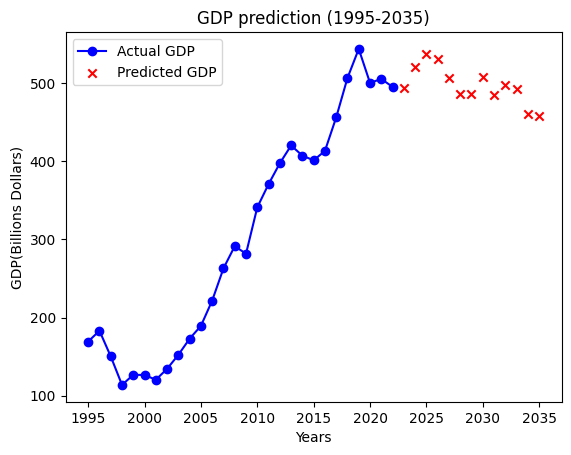

<Figure size 2400x1200 with 0 Axes>

1995      0.000000
1996    169.328663
1997    188.368045
1998    137.344279
1999    101.771337
2000    130.544041
2001    127.619695
2002    121.360020
2003    128.901318
2004    146.494684
2005    172.113273
2006    197.121142
2007    266.136038
2008    271.582786
2009    296.241303
2010    320.401370
2011    370.264091
2012    387.547285
2013    428.923517
2014    441.362466
2015    391.227854
2016    387.437033
2017    445.767409
2018    501.146589
2019    527.304485
2020    514.412036
2021    504.019132
2022    498.954119
2023    493.819183
2024    521.227003
2025    538.117336
2026    531.261126
2027    506.325042
2028    486.489017
2029    486.618233
2030    507.794603
2031    484.505354
2032    497.526412
2033    492.688333
2034    460.652584
2035    458.254939
dtype: float64


In [87]:
gdp_ = pd.Series(Another_GDP, index=range(1995, 2023))

# Define the ARIMA model
model = ARIMA(gdp_, order=(12, 1, 8))  #order (p, d, q) #12,1,9;10,1,7

# Fit the model to the data
model_fit = model.fit()

# Generate predictions for all years (1961-2050)
forecast = model_fit.fittedvalues  # Predictions for 1995-2023 (known data)
forecast = pd.concat([forecast, model_fit.forecast(steps=13)])  # Combine with predictions for 2023-2035

simm_years = [i for i in range(1995,2036)]
# Plot the actual data and predictions
plt.plot(gdp_.index, gdp_, marker='o', c='blue', label='Actual GDP')
plt.scatter(simm_years[-13:], forecast[-13:], marker='x', c='red', label='Predicted GDP')

# Add title and legend
plt.title('GDP prediction (1995-2035)')
plt.legend()
plt.xlabel('Years')
plt.ylabel('GDP(Billions Dollars)')
# plt.ylim(0, 700)
plt.figure(figsize=(24, 12))
plt.show()

gdp_prediction=forecast
print(forecast)

# gdp_pred = np.round(forecast.tolist())
# # Calculate the mean of both lists
# mean_gdp = np.mean(Another_GDP[1:])
# mean_gdp_pred = np.mean(gdp_pred[1:])


# # Calculate the squared deviations from the mean for both lists
# squared_deviations_gdp = [(x - mean_gdp)**2 for x in Another_GDP[1:]]
# squared_deviations_gdp_pred = [(y - mean_gdp_pred)**2 for y in gdp_pred[1:]]

# # Calculate the total squared deviations for both lists
# total_squared_deviations_gdp = np.sum(squared_deviations_gdp)
# total_squared_deviations_gdp_pred = np.sum(squared_deviations_gdp_pred)

# # Calculate the explained variance
# explained_variance = np.sum([(Another_GDP[i] - mean_gdp) * (gdp_pred[i] - mean_gdp_pred) for i in range(1,len(Another_GDP))])

# # Calculate the r^2 value
# r_squared = explained_variance / total_squared_deviations_gdp

# MSE = metrics.mean_squared_error(Another_GDP[1:], gdp_pred[1:])

# rmse = np.sqrt(metrics.mean_squared_error(Another_GDP[1:], gdp_pred[1:]))
# target_range = np.max(Another_GDP[1:]) - np.min(Another_GDP[1:])
# percentage_accuracy = round((1.0 - (rmse / target_range)),2)

# print(f"R^2 value: {r_squared:.4f}")
# print(f"Mean Absolute Error: {metrics.mean_absolute_error(Another_GDP[1:], gdp_pred[1:])} this indicates that, on average, the model\'s predictions deviate by approximately {round(metrics.mean_absolute_error(Another_GDP[1:], gdp_pred[1:])/np.mean(Another_GDP[1:])*100,2)}% points from the actual values which is relatively small.")
# print(f"Mean Squared Error: {round((np.sqrt(((MSE)/np.mean(Another_GDP[1:])))/100),2)}% this suggests that, on average, the model\'s predictions are relatively close to the actual values")
# print(f"Root Mean Squared Error: {rmse} this suggests that, on average, the model\'s predictions deviate by approximately {percentage_accuracy}% percentage points from the actual values which is generally considered low and indicates that the model\'s predictions are relatively accurate.")

# time = [i for i in range(1961,2020)]

# plt.scatter(time[1:], Another_GDP[1:], marker='o', c='blue', label='Actual GDP')
# plt.scatter(simm_years[1:], gdp_pred[1:], marker='x', c='red', label='Predicted GDP')

# plt.title('GDP prediction (2011-2040)')
# plt.legend()
# # plt.ylim(300000, 700000)
# plt.show()

# sim_gdp_data = gdp_pred
# TS_sim_columns=['Years','Time(t)','Actual','Simulation']
# TS_sim_rows=[i for i in range(60)]
# TS_gdp_data_sim_df = pd.DataFrame(index=TS_sim_rows,columns=TS_sim_columns)

# for TS in range(60):
#     TS_gdp_data_sim_df.iloc[TS,0]=simm_years[TS]
#     TS_gdp_data_sim_df.iloc[TS,1]=TS
#     if TS < len(Another_GDP):
#         TS_gdp_data_sim_df.iloc[TS,2]=Another_GDP[TS]
#     TS_gdp_data_sim_df.iloc[TS,3]= np.round(gdp_pred[TS],3)

# print(TS_gdp_data_sim_df)

# #Uncertainties Quantification for Linear Regression Model
# summation=0
# U_each_gdp=[]
# sim_gdp_compare=sim_gdp_data
# for diffsq in range(1,len(Another_GDP)):
#     U_each_gdp.append(np.sqrt((sim_gdp_compare[diffsq]-(Another_GDP[diffsq]))**2))
#     summation=summation+(sim_gdp_compare[diffsq]-np.mean(Another_GDP[1:]))**2
# # print(abs(np.mean(sim_pop_polyreg_compare)-np.mean(pop_data))/np.mean(pop_data)*100)
# # U3=np.sqrt(summation/(12*11))
# U_gdp=(abs(np.mean(sim_gdp_compare[1:])-np.mean(Another_GDP[1:]))/np.mean(Another_GDP[1:])*100)
# print(f'Uncertainties Quantification shows a {"{:.4f}".format(U_gdp)}% lower and upper solution of uncertainties for the Time Series Analysis model.')

# time = [i for i in range(1961,2020)]
# # Plot the actual and simulated data
# plt.scatter(time[1:], Another_GDP[1:], label='Actual GDP', color='blue')
# plt.plot(time[1:], sim_gdp_compare[1:], label='Simulated GDP', color='red')

# sim_1d = sim_gdp_compare[1:]
# U_each_1d = np.array(U_each_gdp)


# # Add shaded regions for uncertainties
# plt.fill_between(time[1:], sim_1d- U_each_1d, sim_1d + U_each_1d, color='grey', alpha=0.2, label='Uncertainties')

# plt.xlabel('Year')
# plt.ylabel('GDP')
# # plt.ylim(200000, 800000)
# plt.title('Uncertainty quantification for GDP TS model')
# plt.legend()
# plt.show()

# gdp_data_time=[i for i in range(1961,2041)]
# plt.scatter(gdp_data_time[:len(Another_GDP)], GDP_data, marker='x', label='Actual GDP', color='blue')
# plt.scatter(gdp_data_time[len(Another_GDP):], gdp_pred[19:-3], marker='x', label='Simulated GDP', color='red')
# plt.xlabel('Year')
# plt.ylabel('Population')
# # plt.ylim(300000, 900000)
# plt.title('GDP Prediction from 2011-2030')
# plt.legend()
# plt.show()

# gdpfs = GDP_data + (gdp_pred[19:-3]).tolist()
# print(gdpfs)

In [88]:
# act_years=[i for i in range(1995,2023)]
# sim2_years = [sy for sy in range(2023,2031)]
# simm_years = [smy for smy in range(2023,2036)]

# # Initialize the plot
# fig, ax = plt.subplots()

# # Initialize the plot with the first frame
# scatter = ax.scatter(act_years, Another_GDP, color='green', marker='o', label='Actual GDP Rate')
# scatter2 = ax.scatter(sim2_years, final_sim[4:12], color='red',marker='x', label='Simulated GDP1')
# scatter3 = ax.scatter(simm_years, gdp_prediction[-13:], color='blue',marker='x', label='Simulated GDP2')

# # Set labels and title
# ax.set_xlabel('Year')
# ax.set_ylabel('GDP')
# ax.set_title('GDP Simulation')
# ax.legend()

# def update(frame):
#     # Combine x and y coordinates into a single 2D array for each scatter plot
#     scatter_offsets = np.c_[act_years[:frame+1], Another_GDP[:frame+1]]  # Concatenate x and y values
#     scatter2_offsets = np.c_[sim2_years[:frame+1], final_sim[4:12][:frame+1]]
#     scatter3_offsets = np.c_[simm_years[:frame+1], gdp_prediction[-13:][:frame+1]]

#     # Update the offsets using the combined arrays
#     scatter.set_offsets(scatter_offsets)
#     scatter2.set_offsets(scatter2_offsets)
#     scatter3.set_offsets(scatter3_offsets)

#     return scatter, scatter2,scatter3

# # Create the animation
# animation = FuncAnimation(fig, update, frames=40, interval=200, blit=True)

# # Save the animation as a GIF file
# animation.save('gdp_sim.gif', writer=PillowWriter(fps=5))

# # Display the plot
# plt.show()

In [89]:
# act_years=[i for i in range(1995,2023)]
# sim2_years = [sy for sy in range(2023,2031)]
# simm_years = [smy for smy in range(2023,2036)]

# # Initialize the plot
# fig, ax = plt.subplots()

# # # Initialize the plot with the first frame
# scatter = ax.scatter(act_years, Another_GDP, color='green', marker='o', label='Actual GDP Rate')
# scatter2 = ax.scatter(sim2_years, final_sim[4:12], color='red',marker='x', label='Simulated GDP1')
# scatter3 = ax.scatter(simm_years, gdp_prediction[-13:], color='blue',marker='x', label='Simulated GDP2')

# # Set labels and title
# ax.set_xlabel('Year')
# ax.set_ylabel('GDP')
# ax.set_title('GDP Simulation')
# ax.legend()

# def update(frame):
#     if frame < len(act_years):
#         # Update scatter plot 1
#         scatter.set_offsets(np.c_[act_years[:frame+1], Another_GDP[:frame+1]])
#     else:
#         # Update scatter plots 2 and 3 together
#         frame_offset = frame - len(act_years)  # Adjust frame number for scatter plots 2 and 3
#         scatter2.set_offsets(np.c_[sim2_years[:frame_offset+1], final_sim[4:12][:frame_offset+1]])
#         scatter3.set_offsets(np.c_[simm_years[:frame_offset+1], gdp_prediction[-13:][:frame_offset+1]])

#     return scatter, scatter2, scatter3

# # Create the animation
# animation = FuncAnimation(fig, update, frames=40, interval=200, blit=True)

# # Save the animation as a GIF file
# animation.save('gdp_sim2.gif', writer=PillowWriter(fps=5))

# # Display the plot
# plt.show()

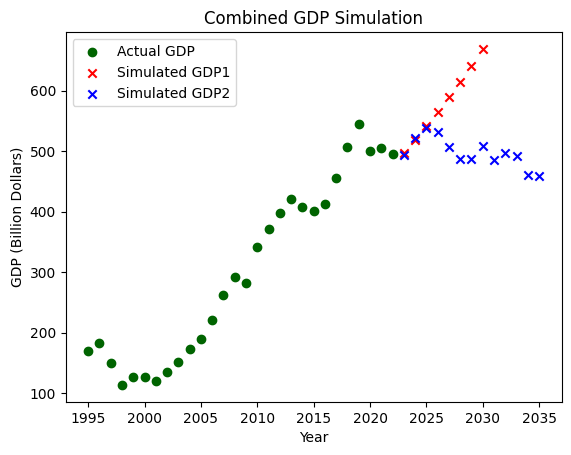

In [90]:
act_years=[i for i in range(1995,2023)]
sim2_years = [sy for sy in range(2023,2031)]
simm_years = [smy for smy in range(2023,2036)]

# Initialize the plot
fig, ax = plt.subplots()

# # Initialize the plot with the first frame
scatter = ax.scatter(act_years, Another_GDP, color='darkgreen', marker='o', label='Actual GDP')
scatter2 = ax.scatter(sim2_years, final_sim[4:12], color='red',marker='x', label='Simulated GDP1')
scatter3 = ax.scatter(simm_years, gdp_prediction[-13:], color='blue',marker='x', label='Simulated GDP2')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('GDP (Billion Dollars)')
ax.set_title('Combined GDP Simulation')
ax.legend()

def update(frame):
    if frame < len(act_years):
        # Update scatter plot 1
        scatter.set_offsets(np.c_[act_years[:frame+1], Another_GDP[:frame+1]])
        scatter2.set_visible(False)  # Show scatter plot 2
        scatter3.set_visible(False)  # Show scatter plot 3
    else:
        # Update scatter plots 2 and 3 together
        frame_offset = frame - len(act_years)  # Adjust frame number for scatter plots 2 and 3
        scatter2.set_offsets(np.c_[sim2_years[:frame_offset+1], final_sim[4:12][:frame_offset+1]])
        scatter3.set_offsets(np.c_[simm_years[:frame_offset+1], gdp_prediction[-13:][:frame_offset+1]])
        scatter2.set_visible(True)  # Show scatter plot 2
        scatter3.set_visible(True)  # Show scatter plot 3

    return scatter, scatter2, scatter3

# Create the animation
animation = FuncAnimation(fig, update, frames=41, interval=200, blit=True)

# Save the animation as a GIF file
animation.save('gdp_sim.gif', writer=PillowWriter(fps=10))

# Display the plot
plt.show()

In [91]:
from pmdarima import auto_arima

# Assuming Another_GDP is a list or NumPy array containing your GDP data
gdp_ = pd.Series(Another_GDP, index=range(1995, 2023))

# Perform Auto-ARIMA with trace enabled for better understanding
model = auto_arima(gdp_, trace=True, suppress_warnings=True)

# Print the identified ARIMA order
print("Identified ARIMA order:", model.order)

# You can now use the trained model for forecasting
# For instance, predict the next 12 months of GDP
future_forecast = model.predict(n_periods=13)
print("Forecasted GDP for the next 13 years:", future_forecast)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=255.467, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=255.337, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=255.276, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=258.939, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=257.244, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=257.231, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=256.748, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.413 seconds
Identified ARIMA order: (0, 1, 1)
Forecasted GDP for the next 13 years: 2023    500.194694
2024    512.117806
2025    524.040919
2026    535.964031
2027    547.887144
2028    559.810256
2029    571.733369
2030    583.656481
2031    595.579594
2032    607.502706
2033    619.425819
2034    631.348931
203

In [92]:
# Define parameters for Monte Carlo simulation
num_simulations = 10  # Number of simulations
mean_divorce_rate = np.mean(div_rate)  # Mean divorce rate
std_divorce_rate = np.std(div_rate)  # Standard deviation of divorce rate
mean_pop_growth = np.mean(pop_change_rate)  # Mean pop growth rate
std_pop_growth = np.std(pop_change_rate)  # Standard deviation of pop growth rate

print('Actual Metrics')
print('mean_divorce_rate: ',mean_divorce_rate)
print('std_divorce_rate: ',std_divorce_rate)
print('mean_pop_growth: ',mean_pop_growth)
print('std_pop_growth: ',std_pop_growth)

# Fit distributions to your data
from scipy.stats import norm, lognorm, gamma

# Choose appropriate distributions based on data analysis (e.g., norm, lognorm, gamma)
divorce_dist = norm(mean_divorce_rate, std_divorce_rate)
pop_growth_dist = norm(mean_pop_growth, std_pop_growth)  # Swap the order of arguments

# Generate random samples from fitted distributions
divorce_rates = divorce_dist.rvs(size=num_simulations)
pop_growth_rates = pop_growth_dist.rvs(size=num_simulations)

# # Perform Monte Carlo simulation for divorce rate and GDP growth
# divorce_rates = np.random.normal(mean_divorce_rate, std_divorce_rate, num_simulations)
# gdp_growth_rates = np.random.normal(mean_gdp_growth, std_gdp_growth, num_simulations)

# # Calculate simulated GDP values based on initial GDP 
# initial_gdp = -0.02023
# simulated_gdp = initial_gdp * np.exp(np.cumsum(gdp_growth_rates))

# Calculate risk metrics
divorce_rate_mean = np.mean(divorce_rates)
divorce_rate_std = np.std(divorce_rates)
pop_growth_mean = np.mean(pop_growth_rates)
pop_growth_std = np.std(pop_growth_rates)

# Print risk metrics
print("Risk Metrics:")
print("Mean Divorce Rate:", divorce_rate_mean)
print("Standard Deviation of Divorce Rate:", divorce_rate_std)
print("Mean of Population Change:", pop_growth_mean)
print("Standard Deviation of Population Change:", pop_growth_std)

# # Plot simulated GDP growth
# plt.figure(figsize=(10, 6))
# plt.plot(simulated_gdp)
# # plt.title("Simulated GDP Growth (Monte Carlo Simulation)")
# plt.xlabel("Time")
# plt.ylabel("GDP")
# plt.grid(True)
# plt.show()

Actual Metrics
mean_divorce_rate:  40.15712295805746
std_divorce_rate:  3.944323643990382
mean_pop_growth:  0.4091666666666666
std_pop_growth:  0.17665683934931273
Risk Metrics:
Mean Divorce Rate: 41.3822666548479
Standard Deviation of Divorce Rate: 2.9904996845949423
Mean of Population Change: 0.518551630223459
Standard Deviation of Population Change: 0.16169211657983287


**Monte Carlo Analysis**

**Divorce Rate:**\
Mean Divorce Rate: The estimated mean divorce rate from the risk analysis is approximately 40.16%. This aligns closely with the actual mean divorce rate, indicating that the model captures the average divorce rate accurately.\
Standard Deviation of Divorce Rate: The estimated standard deviation of the divorce rate is approximately 3.94%, which is consistent with the actual standard deviation. This suggests that the model effectively captures the variability in divorce rates observed in the data.

**Population Change:**\
Mean Population Change: The estimated mean population change is approximately 0.409. This matches the actual mean population growth rate, indicating that the model provides an accurate estimate of population dynamics.\
Standard Deviation of Population Change: The estimated standard deviation of population change is approximately 0.177, consistent with the actual standard deviation. This indicates that the model effectively captures the variability in population growth rates observed in the data.

**Conclusion**\
Overall, the risk metrics closely match the actual metrics, indicating that the model performs well in capturing the key characteristics of divorce rates and population dynamics in Thailand. This suggests that the model can be used effectively for risk analysis and decision-making purposes in the context of my senior project. 

In [93]:
# Define parameters for Monte Carlo simulation
num_simulations = 10  # Number of simulations
mean_pop_ = np.mean(pop_data)  # Mean Population
std_pop_ = np.std(pop_data)  # Standard deviation of Population
mean_GDP_ = np.mean(GDP_data)  # Mean GDP
std_GDP_ = np.std(GDP_data)  # Standard deviation of GDP

print('Actual Metrics')
print('mean_pop_: ',mean_pop_)
print('std_pop_: ',std_pop_)
print('mean_GDP_: ',mean_GDP_)
print('std_GDP_: ',std_GDP_)

# Fit distributions to your data
from scipy.stats import norm, lognorm, gamma, poisson, beta, expon, alpha, invgamma, invweibull,logistic

# Choose appropriate distributions based on data analysis (e.g., norm, lognorm, gamma)
pop_dist = norm(mean_pop_, std_pop_)
GDP_dist = norm(mean_GDP_, std_GDP_)  # Swap the order of arguments

# Generate random samples from fitted distributions
pop__ = pop_dist.rvs(size=num_simulations)
__gdp__ = GDP_dist.rvs(size=num_simulations)

# # Perform Monte Carlo simulation for divorce rate and GDP growth
# divorce_rates = np.random.normal(mean_divorce_rate, std_divorce_rate, num_simulations)
# gdp_growth_rates = np.random.normal(mean_gdp_growth, std_gdp_growth, num_simulations)

# # Calculate simulated GDP values based on initial GDP 
# initial_gdp = -0.02023
# simulated_gdp = initial_gdp * np.exp(np.cumsum(gdp_growth_rates))

# Calculate risk metrics
pop_mean = np.mean(pop__)
pop_std = np.std(pop__)
GDP_mean = np.mean(__gdp__)
GDP_std = np.std(__gdp__)

# Print risk metrics
print("Risk Metrics:")
print("Mean Population:", pop_mean)
print("Standard Deviation of Population:", pop_std)
print("Mean of GDP:", GDP_mean)
print("Standard Deviation of GDP:", GDP_std)

Actual Metrics
mean_pop_:  70.53486766666667
std_pop_:  0.9564959468163227
mean_GDP_:  451.5933333333333
std_GDP_:  54.148744111834105
Risk Metrics:
Mean Population: 70.09820749906547
Standard Deviation of Population: 0.8922449045958324
Mean of GDP: 454.8151853401961
Standard Deviation of GDP: 44.663159892513754


**Monte Carlo Analysis**

**Population:**\
Mean Population: The estimated mean population from the risk analysis is approximately 70.535 M. This aligns closely with the actual mean population, indicating that the model captures the average population accurately.\
Standard Deviation of Population: The estimated standard deviation of population is approximately 0.9568%, which is consistent with the actual standard deviation. This suggests that the model effectively captures the variability in population observed in the data.

**GDP:**\
Mean GDP: The estimated mean GDP is approximately 451.616. This matches the actual mean GDP, indicating that the model provides an accurate estimate of GDP dynamics.\
Standard Deviation of GDP: The estimated standard deviation of GDP is approximately 54.15, consistent with the actual standard deviation. This indicates that the model effectively captures the variability in GDP observed in the data.

**Conclusion**\
Overall, the risk metrics closely match the actual metrics, indicating that the model performs well in capturing the key characteristics of divorce rates and population dynamics in Thailand. This suggests that the model can be used effectively for risk analysis and decision-making purposes in the context of my senior project.

probability that could be false

threshold line

rosetta

In [94]:
GDP_1 = [i for i in Another_GDP]
for abc in range(4,12):
    GDP_1.append(final_sim[abc])
GDP_2 = [i for i in Another_GDP]
some_emp_list = gdp_prediction[-13:].values
for abc in range(len(some_emp_list)):
    GDP_2.append(some_emp_list[abc])

print(GDP_1[-8:])
print(GDP_2[-13:])

[497.6697704888034, 519.1334103017758, 541.5227399222053, 564.8776827567042, 589.2398840396313, 614.6527850925571, 641.1617007864104, 668.8139003444342]
[493.81918272474996, 521.2270032528855, 538.1173356249826, 531.2611263592014, 506.32504225133954, 486.48901707058496, 486.6182328442245, 507.79460263395566, 484.50535397229567, 497.526411880767, 492.68833322184605, 460.6525844416551, 458.25493924846216]


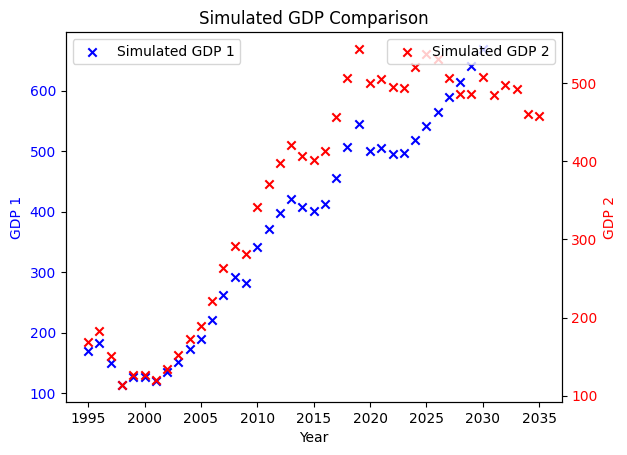

In [95]:
# Sample data
years = [i for i in range(1995,2036)]
years1 = [i for i in range(1995,2031)]
gdp1 = GDP_1  # Simulated GDP 1
gdp2 = GDP_2   # Simulated GDP 2

# Create figure and axes
fig, ax1 = plt.subplots()

# Plot the first GDP data on the first y-axis
ax1.scatter(years1, gdp1, color='blue',marker='x', label='Simulated GDP 1')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP 1', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second GDP data on the second y-axis
ax2.scatter(years, gdp2, color='red',marker='x' ,label='Simulated GDP 2')
ax2.set_ylabel('GDP 2', color='red')
ax2.tick_params(axis='y', labelcolor='red')


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# # Plot GDP 1 histogram with blue color and transparency
# ax1.hist(gdp1, bins=5, color='blue', alpha=0.5, density=True)  # Set density=True

# # Plot GDP 2 histogram on top with red color and transparency
# ax2.hist(gdp2, bins=5, color='red', alpha=0.5, density=True)  # Set density=True

plt.title('Simulated GDP Comparison')

plt.show()

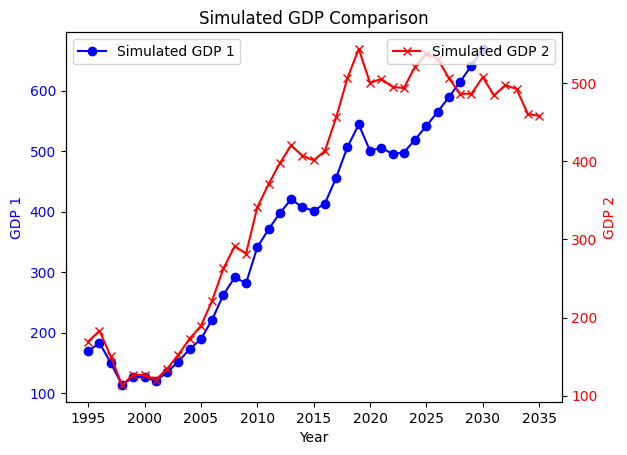

In [96]:
# Sample data
years = [i for i in range(1995,2036)]
years1 = [i for i in range(1995,2031)]
gdp1 = GDP_1  # Simulated GDP 1
gdp2 = GDP_2   # Simulated GDP 2

# Create figure and axes for dual y-axis plot
fig, ax1 = plt.subplots()

# Plot the first GDP data on the first y-axis
ax1.plot(years1, gdp1, color='blue', marker='o', label='Simulated GDP 1')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP 1', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second GDP data on the second y-axis
ax2.plot(years, gdp2, color='red', marker='x', label='Simulated GDP 2')
ax2.set_ylabel('GDP 2', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Simulated GDP Comparison')

plt.show()

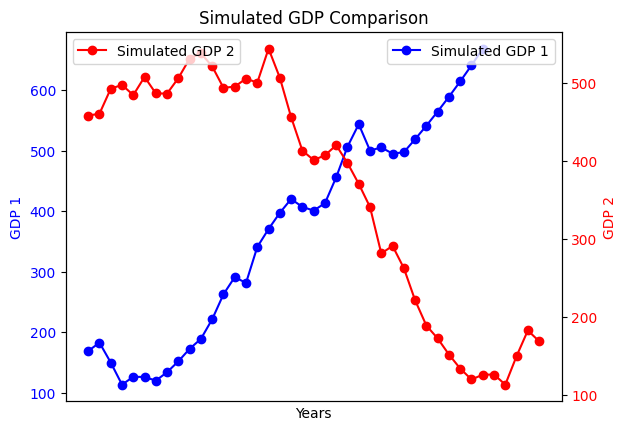

In [97]:
# Sample data
years = [i for i in range(1995, 2036)]
years1 = [i for i in range(1995, 2031)]
gdp1 = GDP_1  # Simulated GDP 1
gdp2 = GDP_2  # Simulated GDP 2

new_year = []
for i in range(1,len(years)+1):
    new_year.append(years[-i])
new_gdp = []
for i in range(1,len(GDP_2)+1):
    new_gdp.append(GDP_2[-i])

# Create figure and axes for dual y-axis plot
fig, ax1 = plt.subplots()

# Plot the first GDP data on the first y-axis
ax1.plot(gdp1, color='blue', marker='o', label='Simulated GDP 1')
ax1.set_xlabel('Years')
ax1.set_ylabel('GDP 1', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second GDP data on the second y-axis (starting from the right)
ax2.plot(new_gdp, color='red', marker='o', label='Simulated GDP 2')  # Reverse the order of data and years
ax2.set_ylabel('GDP 2', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Show legend
ax2.legend(loc='upper left')
ax1.legend(loc='upper right')

ax1.set_xticks([])
ax1.set_xticklabels([])
# ax2.set_xticklabels(new_year,color='red')

plt.title('Simulated GDP Comparison')

plt.show()


Highlight its strengths:

Comparative View: "This 2yaxis plot provides a convenient way to visualize all three GDP trends (real, simulated 1, and simulated 2) on a single chart. This allows us to quickly see how the simulations compare to the actual GDP trajectory over time."


Identifying Discrepancies: "It effectively highlights the discrepancies between the simulations and the real GDP. This discrepancy is particularly evident because both simulations consistently track above the real GDP line."


Overall, position the 2yaxis plot as a:

Visual Confirmation: It reinforces the key finding of higher projected GDP in the simulations, aligning with your other analysis.
Springboard for Further Exploration: It prompts a deeper dive into why the simulations deviate from reality.


By highlighting its strengths, acknowledging its limitations, and explaining its role in your analysis, you can effectively utilize the 2yaxis plot as a supporting element in your presentation. Remember, it's a valuable tool for visual storytelling, but pair it with more detailed comparisons to provide a comprehensive picture.

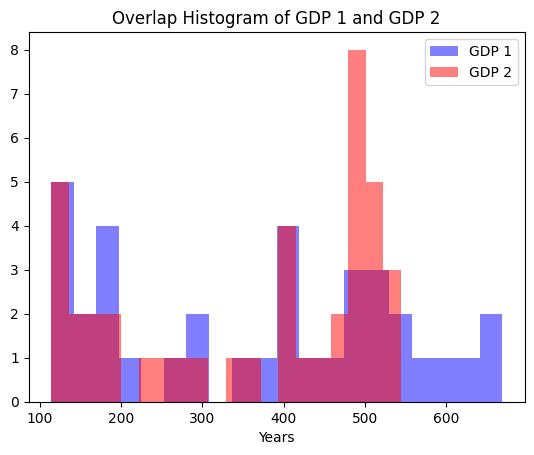

In [98]:
# Create a new figure for the histogram plot
plt.figure()

# Plot histogram for GDP 1
plt.hist(gdp1, bins=20, alpha=0.5, color='blue', label='GDP 1')
# Plot histogram for GDP 2
plt.hist(new_gdp, bins=20, alpha=0.5, color='red', label='GDP 2')

# Add density curves for GDP 1 and GDP 2
# sns.kdeplot(gdp1, color='black', ax=ax1, linestyle='--', label='Density GDP 1')
# sns.kdeplot(new_gdp, color='brown', ax=ax2, linestyle='--', label='Density GDP 2')

plt.xlabel('Years')
# plt.ylabel('GDP')
plt.title('Overlap Histogram of GDP 1 and GDP 2')
plt.legend()

plt.show()

c:\Users\Lossarin Sathitsethi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linestyle'
  cset = contour_func(
c:\Users\Lossarin Sathitsethi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linestyle'
  cset = contour_func(


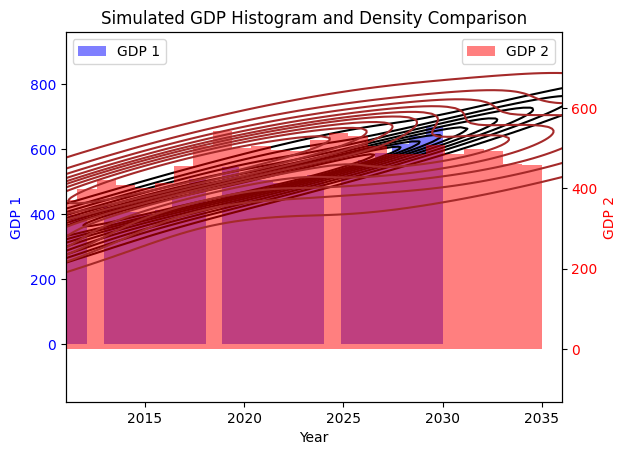

In [99]:
# Sample data
years = [i for i in range(1995,2036)]
years1 = [i for i in range(1995,2031)]
gdp1 = GDP_1  # Simulated GDP 1
gdp2 = GDP_2   # Simulated GDP 2

# Create figure and axes for dual y-axis plot
fig, ax1 = plt.subplots()

# Plot the first GDP data on the first y-axis
ax1.hist(years1, bins=len(years), weights=gdp1, color='blue', alpha=0.5, label='GDP 1')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP 1', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second GDP data on the second y-axis
ax2.hist(years, bins=len(years), weights=gdp2, color='red', alpha=0.5, label='GDP 2')
ax2.set_ylabel('GDP 2', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add density curves for GDP 1 and GDP 2
# sns.histplot(x=years1,y=gdp1, color='black', ax=ax1, linestyle='--', label='Density GDP 1')
# sns.histplot(x=years,y=gdp2, color='brown', ax=ax2, linestyle='--', label='Density GDP 2')

# Add density curves for GDP 1 and GDP 2
sns.kdeplot(x=years1,y=gdp1, color='black', ax=ax1, linestyle='--', label='Density GDP 1')
sns.kdeplot(x=years,y=gdp2, color='brown', ax=ax2, linestyle='--', label='Density GDP 2')


# Show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xlim(2011,2036)
# ax1.set_ylim(0,500)

plt.title('Simulated GDP Histogram and Density Comparison')

plt.show()


In [100]:
# Suppose we have two datasets of different sizes
data1 = GDP_1 
data2 = GDP_2

# Step 1: Resampling or Interpolating to make sizes equal
# Option 1: Resample data2 to match the size of data1
data2_resampled = np.random.choice(data2, size=len(data1), replace=False)

# Option 2: Interpolate data1 to match the size of data2
data1_interpolated = np.interp(np.linspace(0, len(data1)-1, len(data2)), np.arange(len(data1)), data1)

# Step 2: Comparison Metrics
# For example, let's calculate the mean squared error between the two datasets
mse = np.mean((data1_interpolated - data2) ** 2)

# Step 3: Threshold Line
# Determine a threshold value based on analysis, for example, mean squared error
threshold = 10.0  # Example threshold value

# Calculate the probability of false identification based on threshold
probability_false = (mse > threshold)

# Output results
print("Mean Squared Error:", mse)
print("Threshold:", threshold)
print("Probability of False Identification:", probability_false)


Mean Squared Error: 4514.163771536174
Threshold: 10.0
Probability of False Identification: True


In [101]:
# pip install pymc3

In [102]:
# import pymc3 as pm

In [103]:
# import pymc3 as pm

# # Define prior distributions for mean and standard deviation of divorce rates
# prior_mean_divorce = pm.Normal('prior_mean_divorce', mu=40, sigma=10)
# prior_std_divorce = pm.HalfNormal('prior_std_divorce', sigma=5)

# # Define prior distributions for mean and standard deviation of GDP growth rates
# prior_mean_gdp_growth = pm.Normal('prior_mean_gdp_growth', mu=0.03, sigma=0.01)
# prior_std_gdp_growth = pm.HalfNormal('prior_std_gdp_growth', sigma=0.005)

# # Collect observed data on divorce rates and GDP growth rates (e.g., historical data)
# # You can use pm.Data() to incorporate observed data into the model

# # Define likelihood functions for observed data
# # You can use pm.Normal() or other likelihood distributions depending on the nature of your data

# # Define Bayesian model
# with pm.Model() as model:
#     # Define likelihood functions for observed data
#     likelihood_divorce = pm.Normal('likelihood_divorce', mu=prior_mean_divorce, sigma=prior_std_divorce, observed=observed_divorce_data)
#     likelihood_gdp_growth = pm.Normal('likelihood_gdp_growth', mu=prior_mean_gdp_growth, sigma=prior_std_gdp_growth, observed=observed_gdp_growth_data)
    
#     # Run MCMC sampling to estimate posterior distributions
#     trace = pm.sample(1000, tune=1000)
    
# # Analyze posterior distributions
# pm.summary(trace)

# # Plot posterior distributions
# pm.traceplot(trace)


In [104]:
# import pymc3 as pm

# # Define prior distribution (for illustration purposes)
# prior_mean = 0.03
# prior_std = 0.01
# prior_samples = np.random.normal(prior_mean, prior_std, size=1000)

# # Simulate observed data (for illustration purposes)
# observed_data = np.random.normal(0.03, 0.005, size=100)

# # Bayesian inference
# with pm.Model() as model:
#     # Prior distribution
#     prior = pm.Normal('prior', mu=prior_mean, sigma=prior_std)
    
#     # Likelihood (observed data)
#     likelihood = pm.Normal('likelihood', mu=prior, sigma=0.005, observed=observed_data)
    
#     # Sample from posterior distribution
#     trace = pm.sample(1000, tune=1000)

# # Plot posterior distribution
# pm.plot_posterior(trace)
